In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans


Here is visualization of the graph.  We can ignore actions and only consider the Laplacian

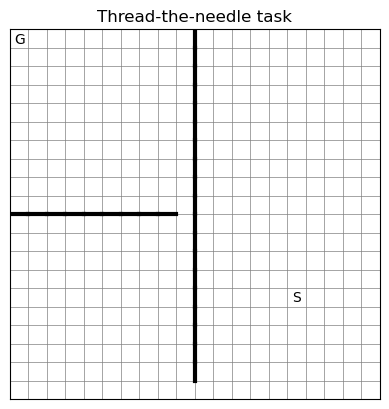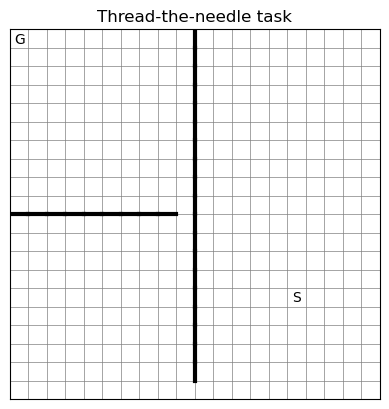

In [70]:
laplacian = np.loadtxt('grid_world_laplacian.csv', delimiter=',')
laplacian

array([[ 2., -1.,  0., ...,  0.,  0.,  0.],
       [-1.,  3., -1., ...,  0.,  0.,  0.],
       [ 0., -1.,  3., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  3., -1.,  0.],
       [ 0.,  0.,  0., ..., -1.,  3., -1.],
       [ 0.,  0.,  0., ...,  0., -1.,  2.]])

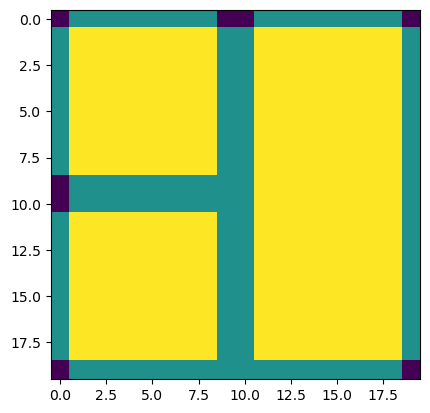

In [71]:
# plot the degree matrix, reshaped into the grid-world shape
plt.imshow(np.diag(laplacian).reshape(20, 20))

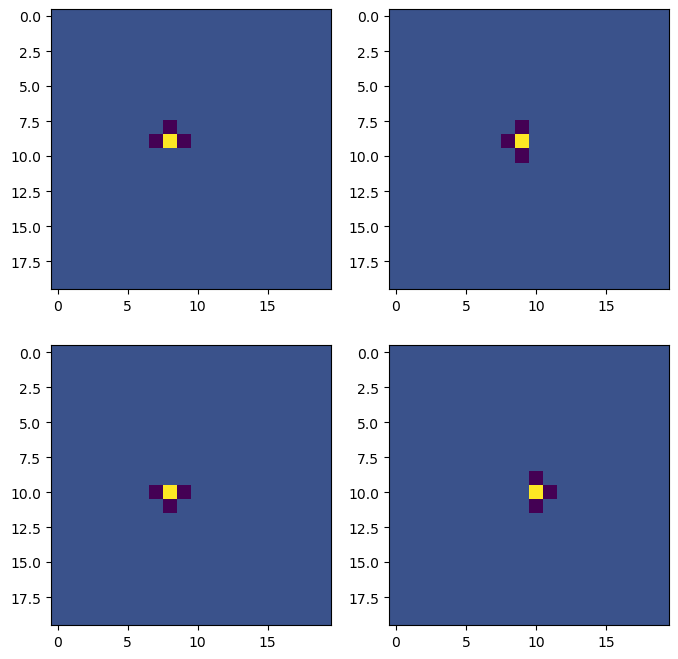

In [72]:
# the adjacency matrix looked wrong to me at first glance, but it's correct.  Bottleneck states
# don't necessarily have a different degree than their neighbors.  There is a bottle neck between
# the states at row 9 and row 10, column 9. Importantly, while the adjacency pattern changes, the 
# degree doesn't


fig, axes = plt.subplots(2,2,figsize=(8, 8) )

row = 9
col = 8
state = row * 20 + col
axes[0][0].imshow(laplacian[state].reshape(20, 20))

row = 10
col = 8
state = row * 20 + col
axes[1][0].imshow(laplacian[state].reshape(20, 20))

row = 9
col = 9
state = row * 20 + col
axes[0][1].imshow(laplacian[state].reshape(20, 20))

row = 10
col = 10
state = row * 20 + col
axes[1][1].imshow(laplacian[state].reshape(20, 20))


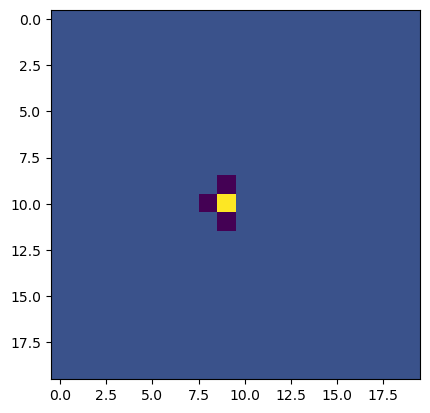

In [73]:

row = 10
col = 9

state = row * 20 + col
plt.imshow(laplacian[state].reshape(20, 20))

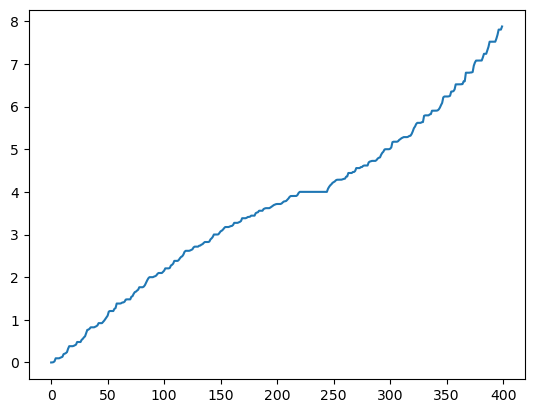

In [81]:
eigenvalues, eigenvectors = np.linalg.eigh(laplacian)
# idx = np.argsort(eigenvalues)[::-1]

# sort by the eigenvalues
# eigenvalues = eigenvalues[idx]
# eigenvectors = eigenvectors[idx]

plt.plot(eigenvalues)

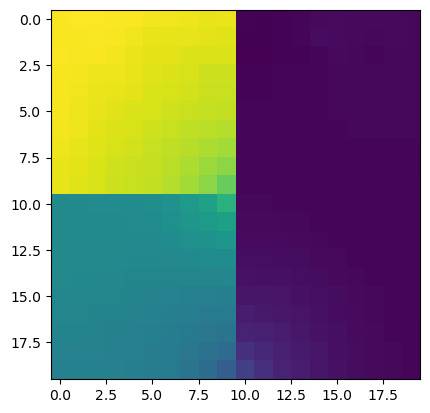

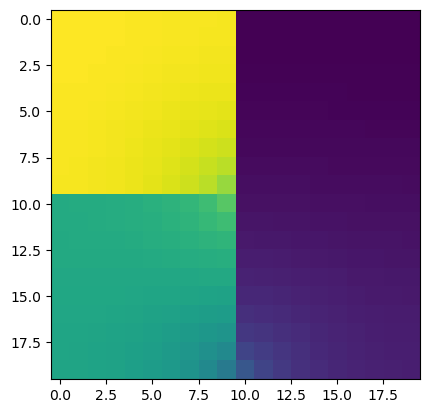

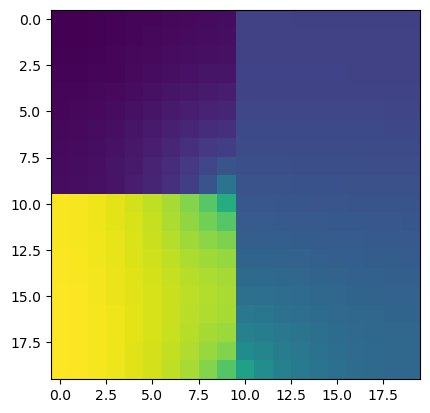

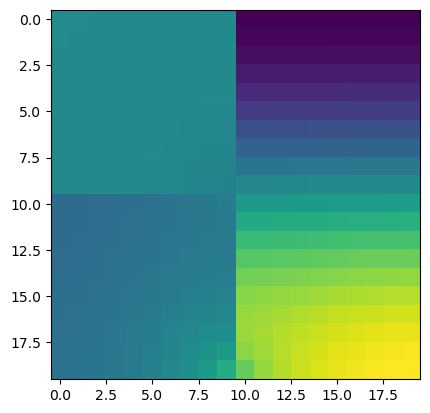

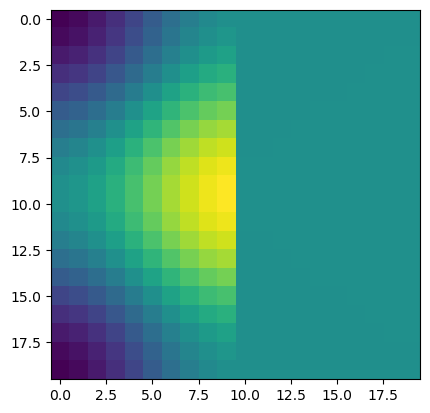

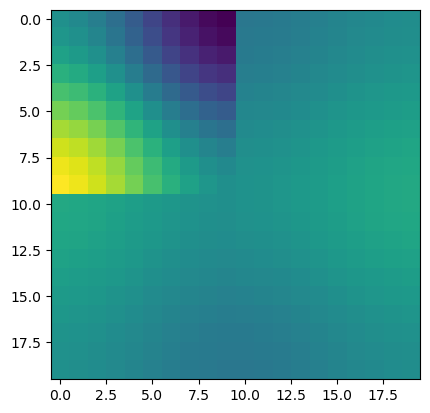

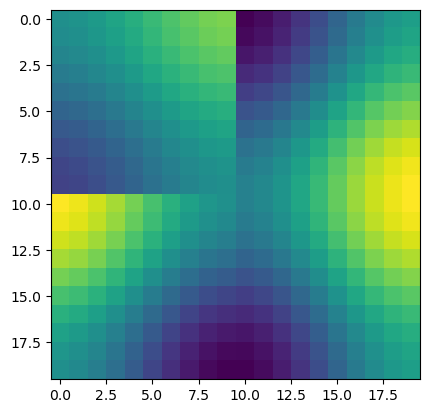

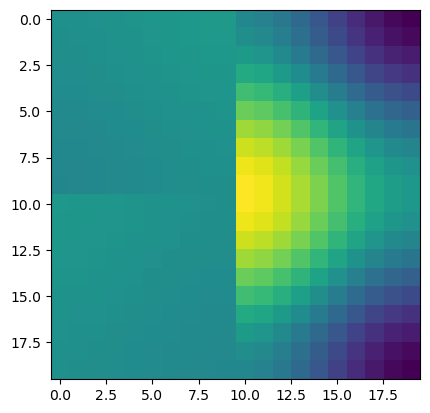

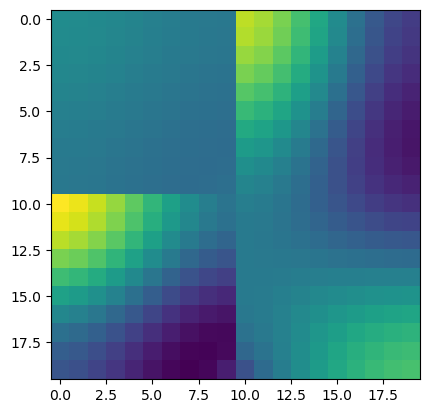

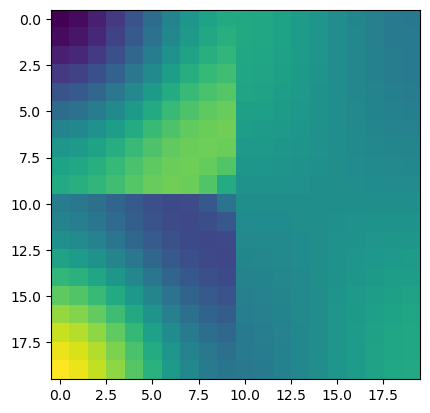

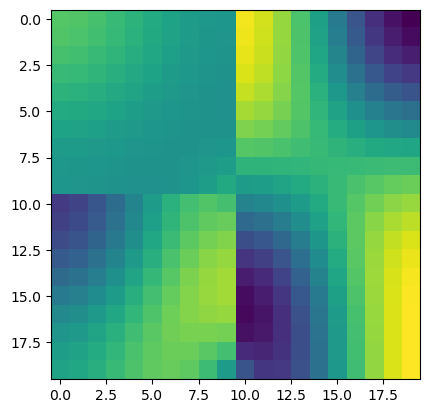

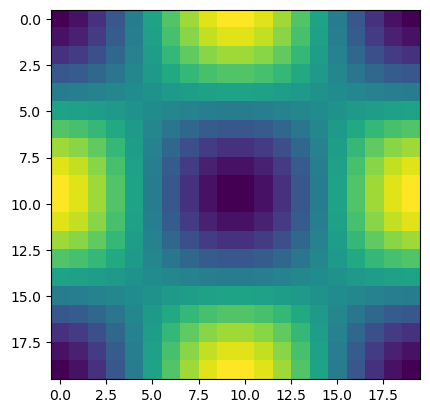

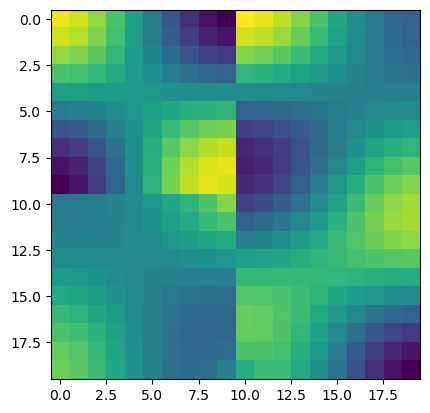

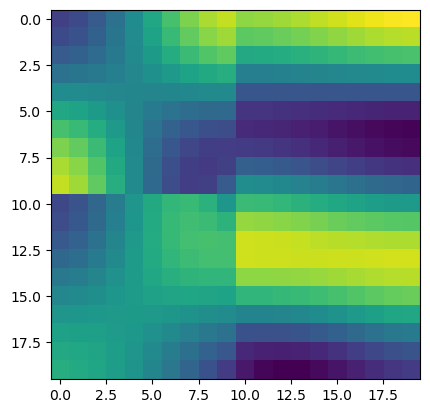

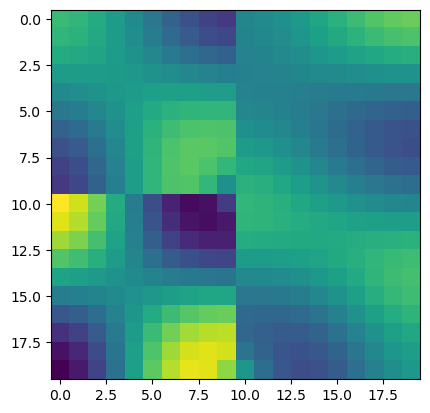

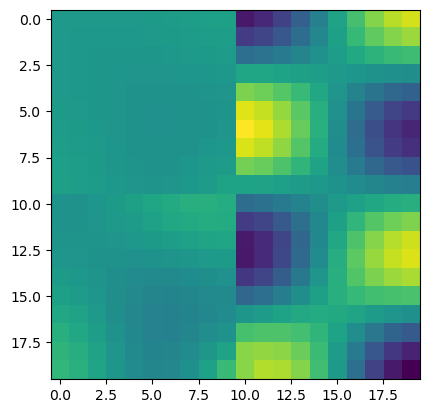

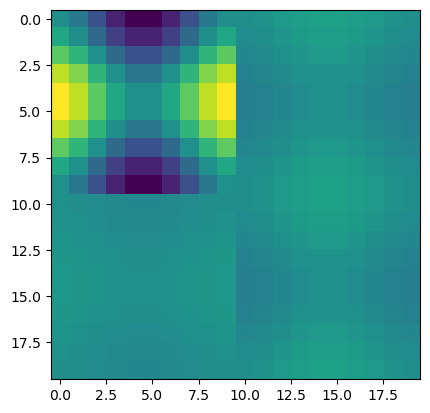

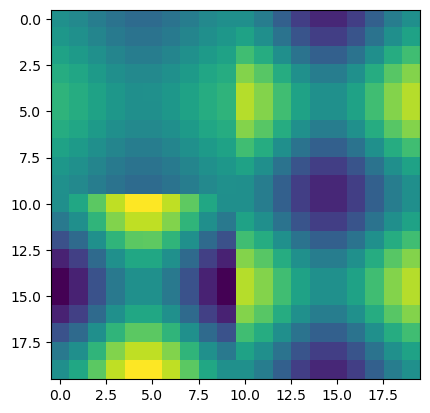

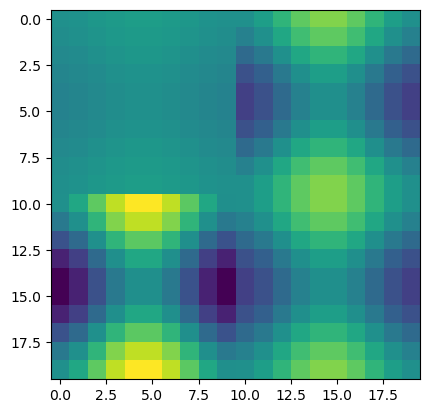

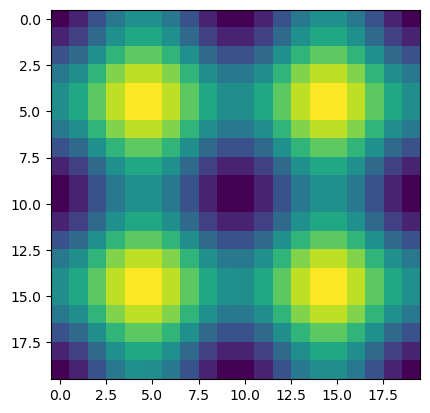

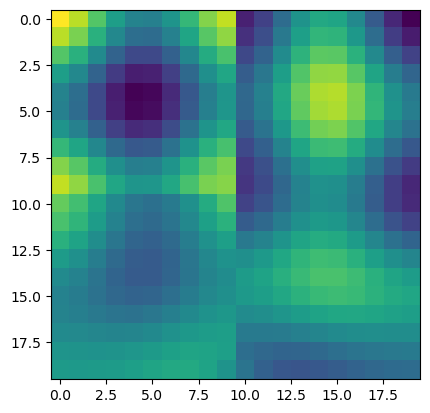

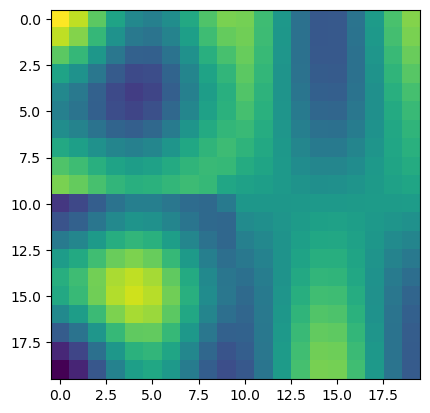

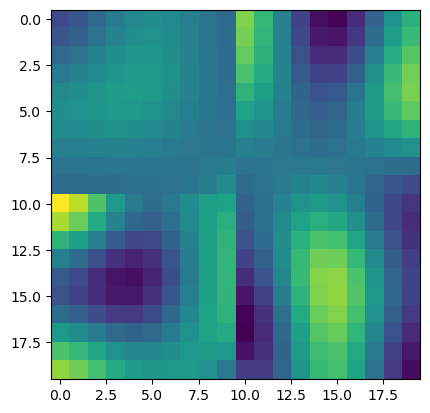

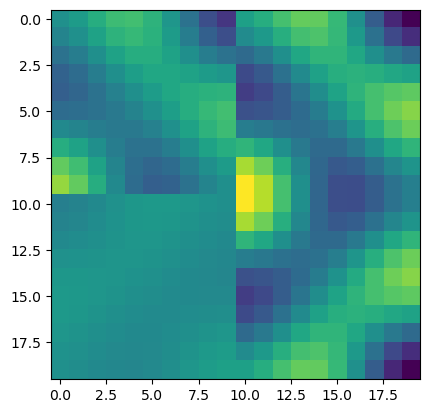

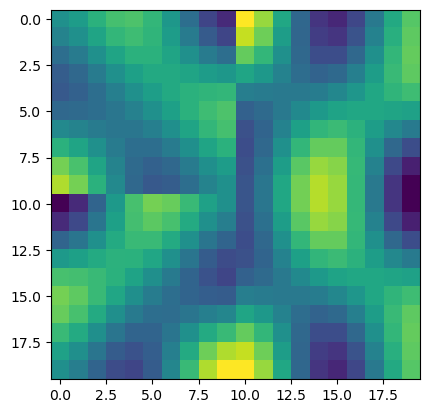

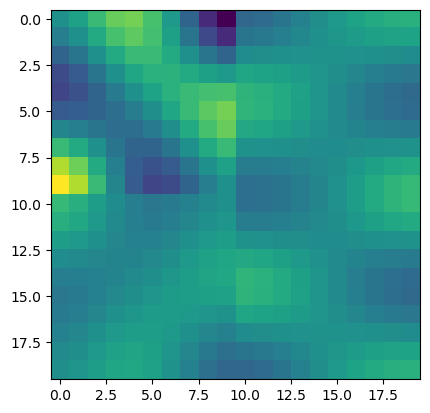

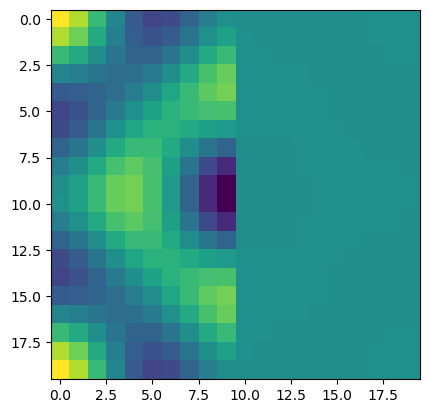

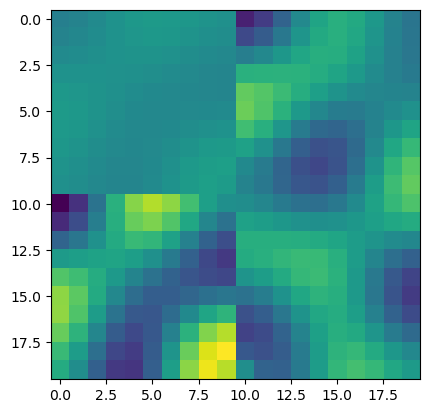

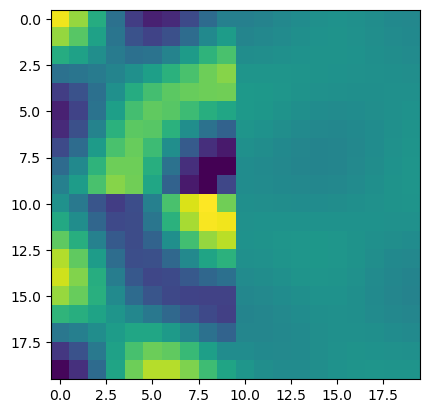

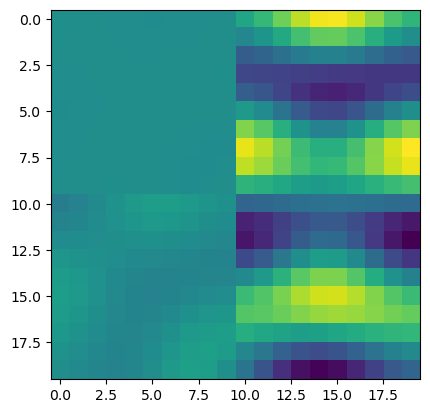

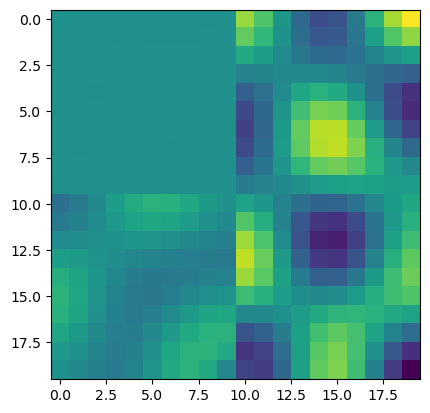

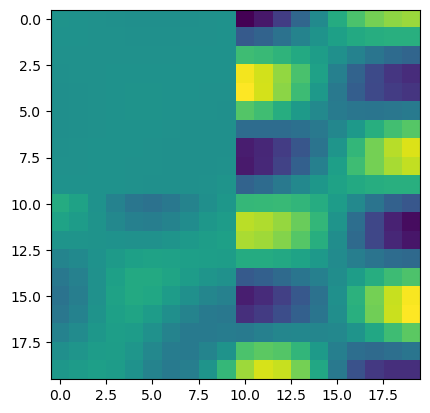

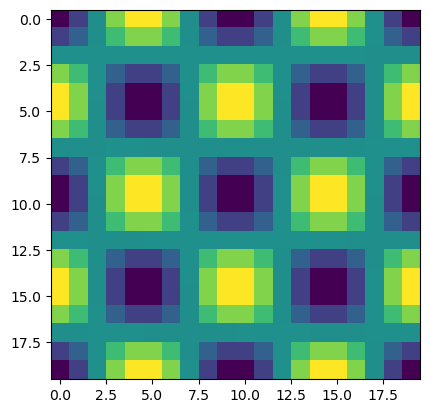

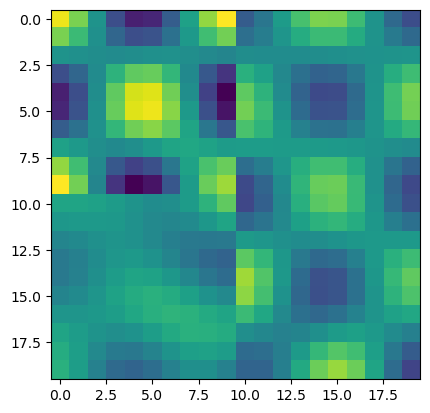

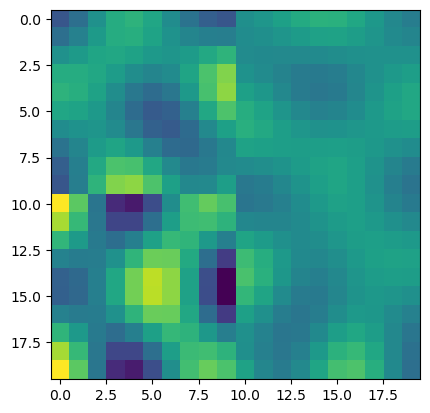

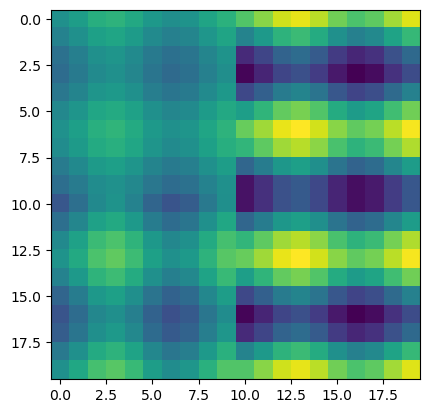

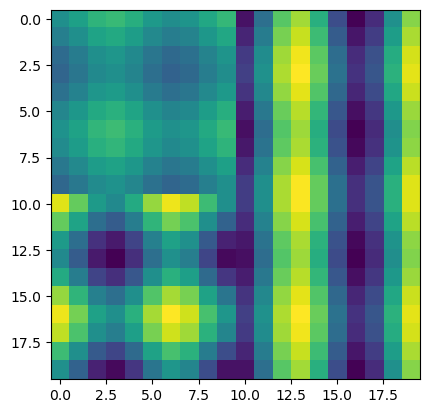

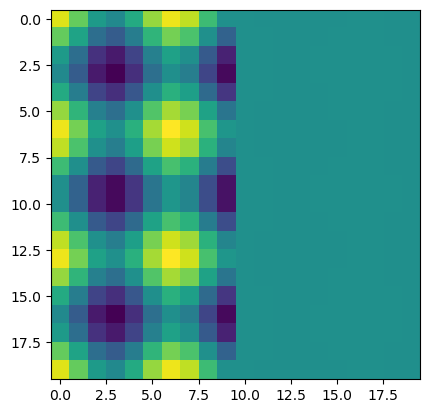

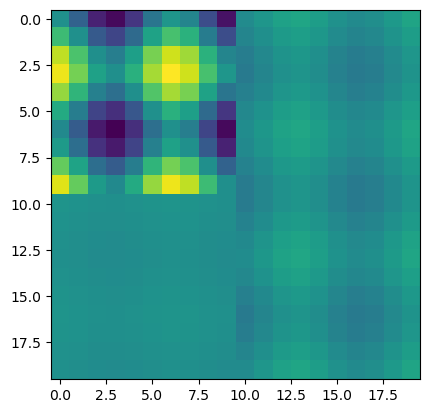

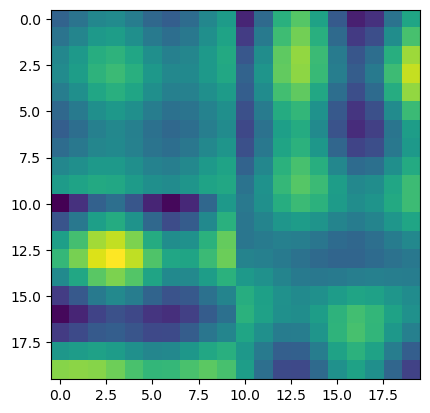

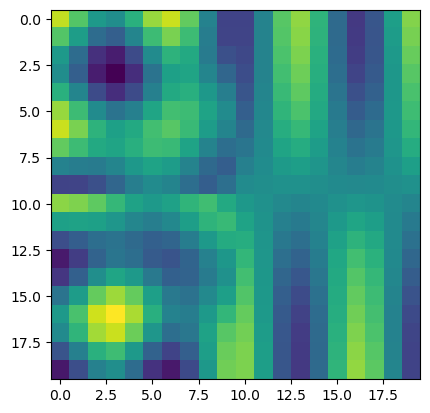

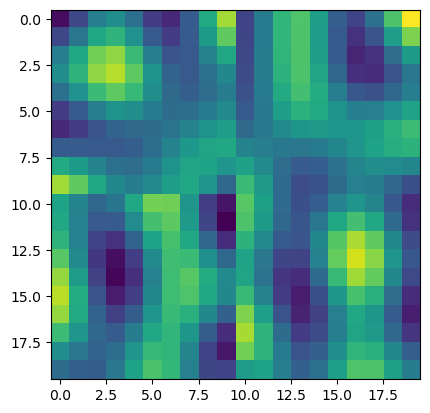

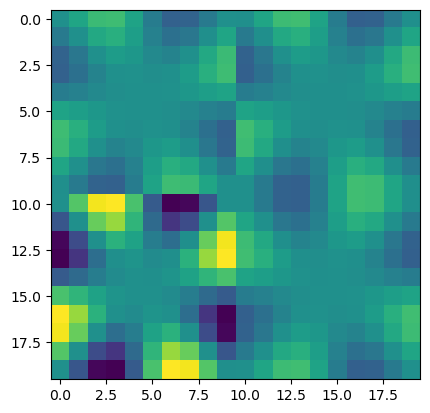

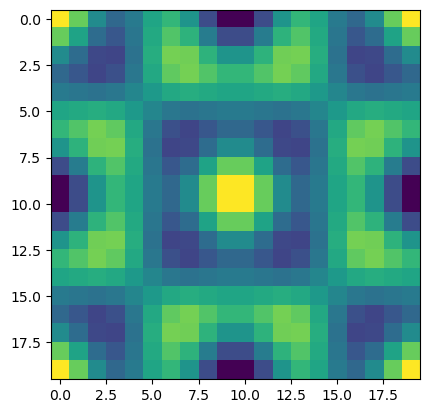

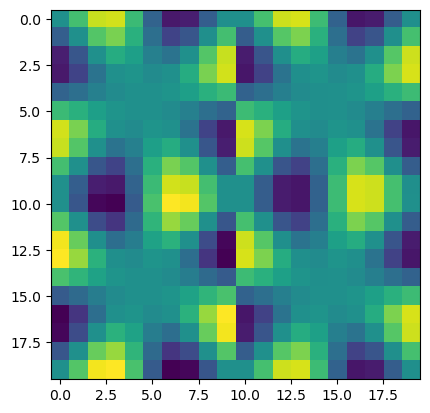

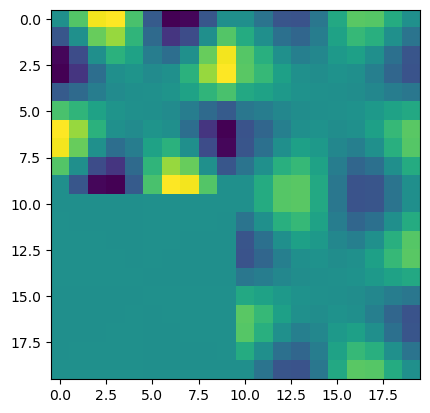

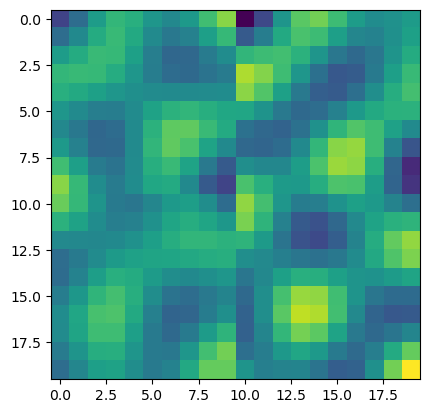

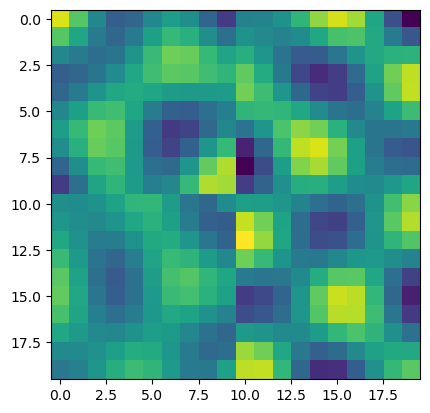

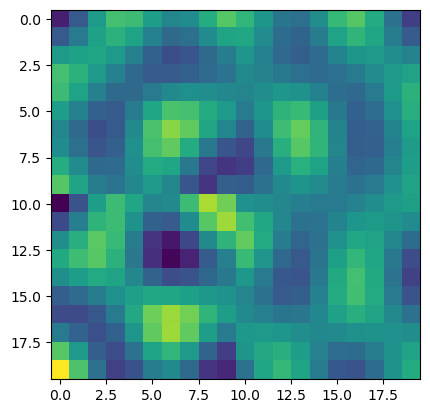

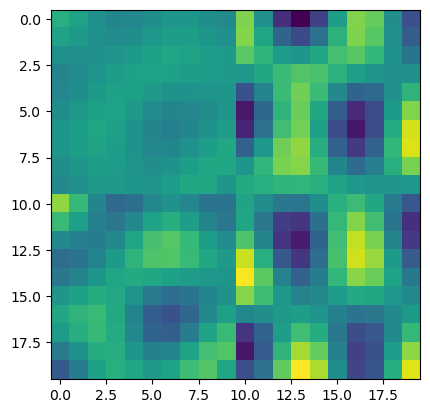

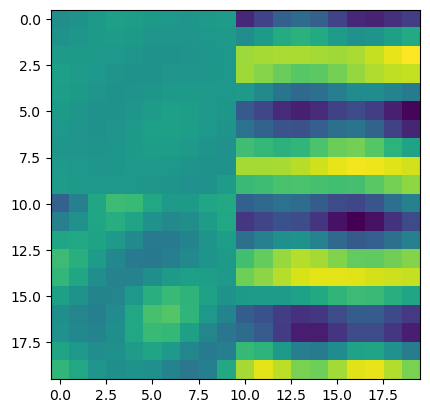

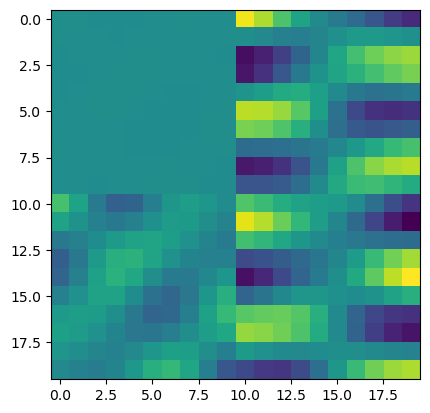

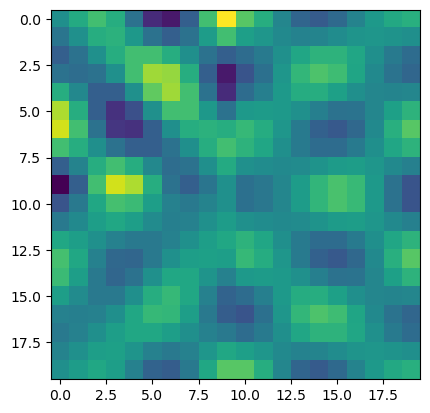

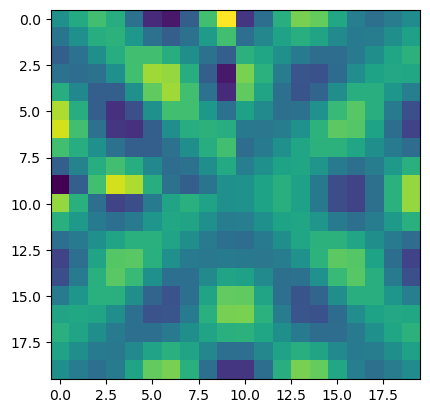

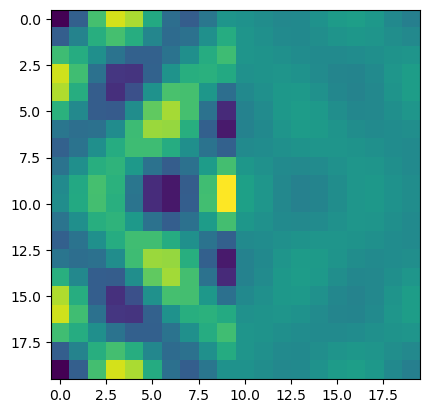

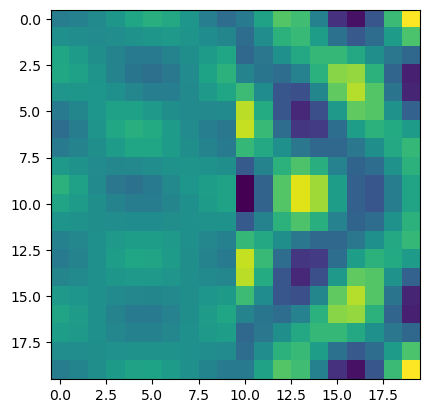

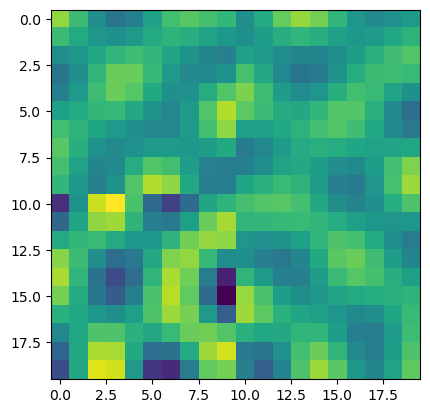

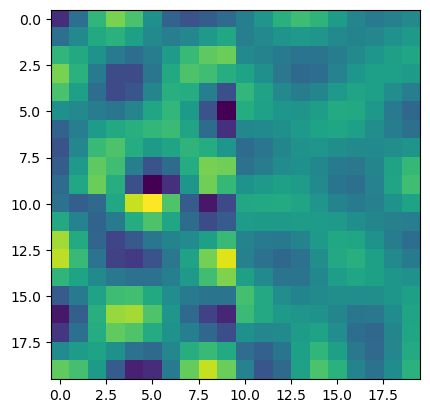

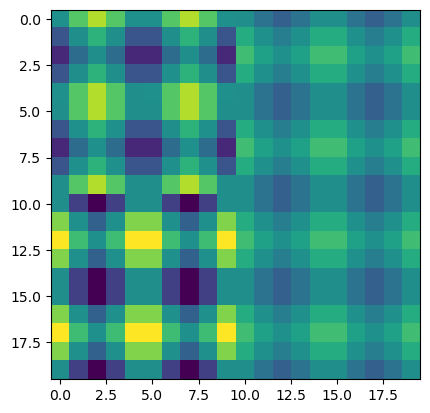

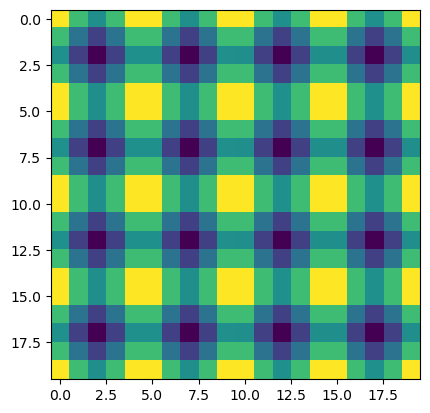

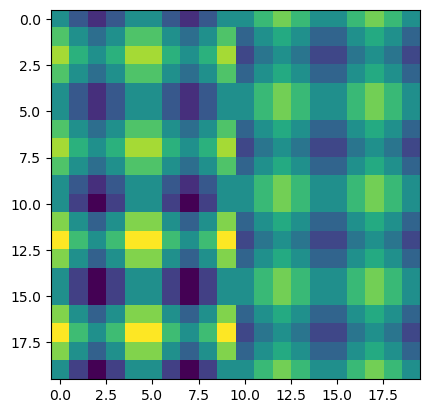

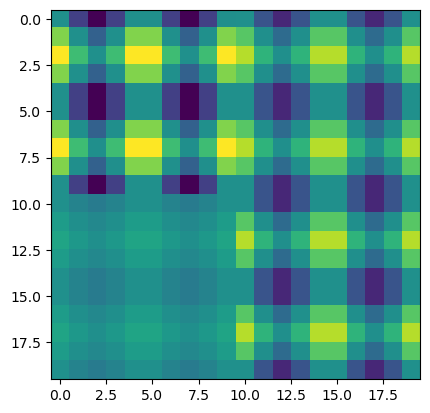

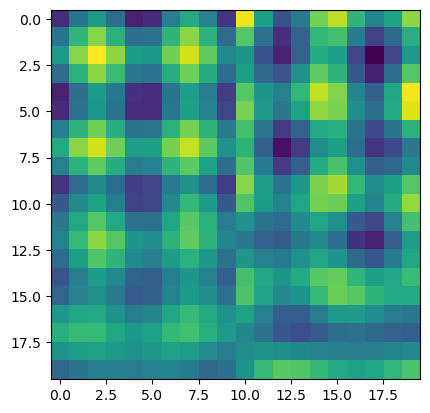

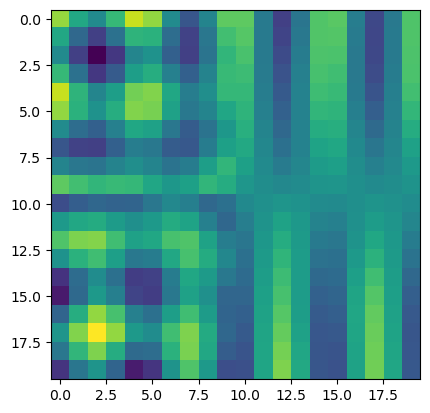

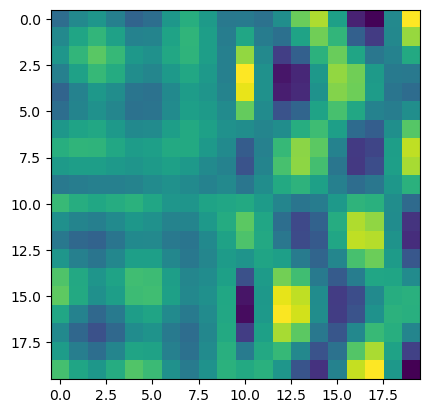

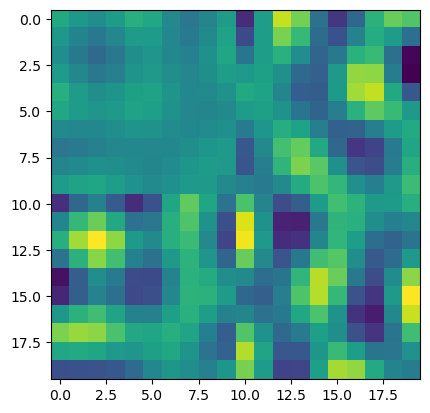

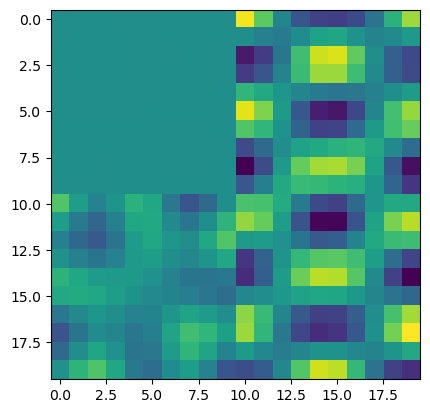

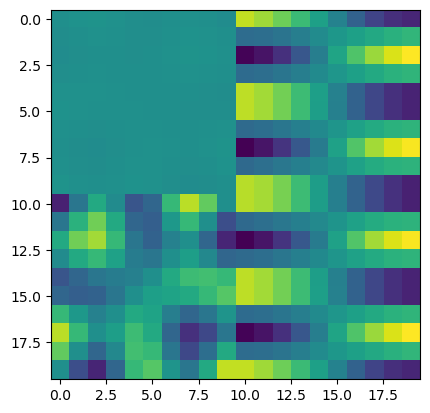

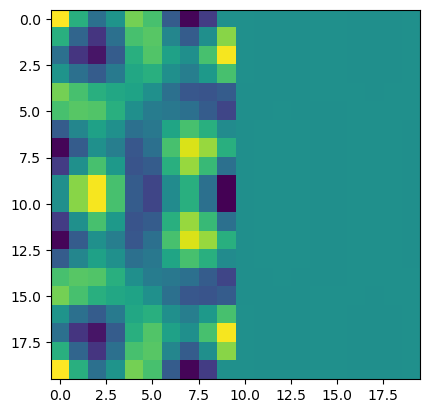

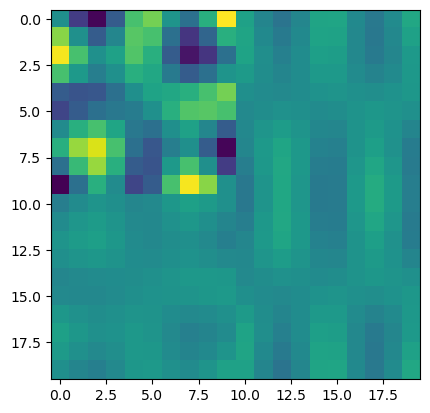

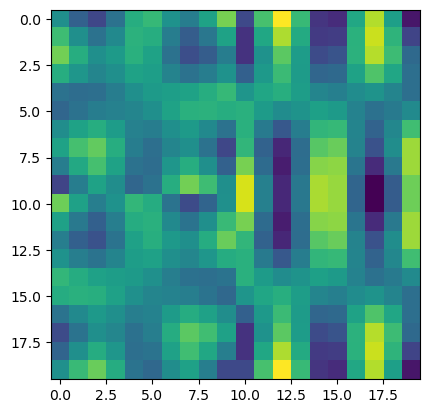

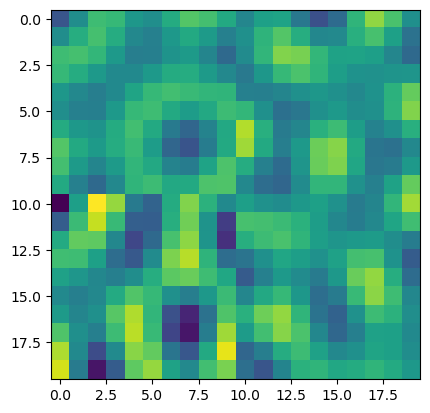

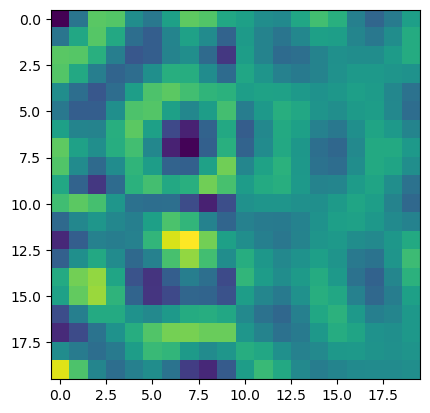

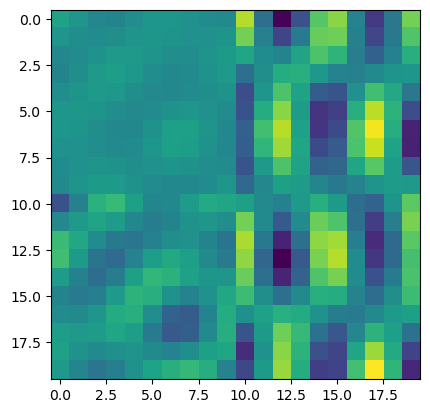

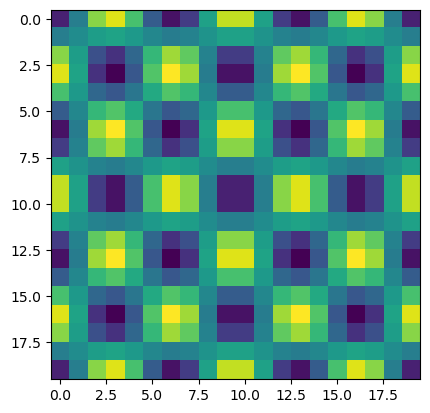

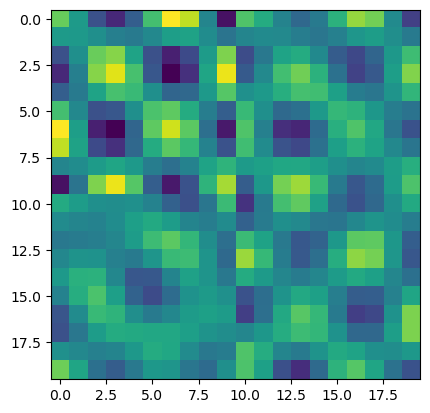

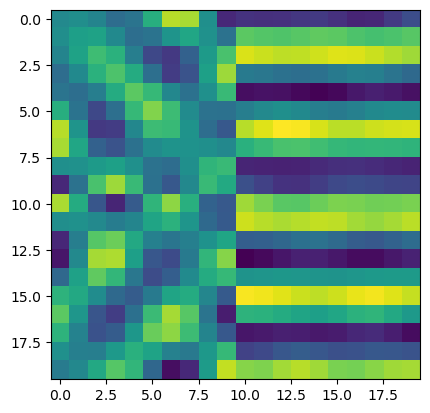

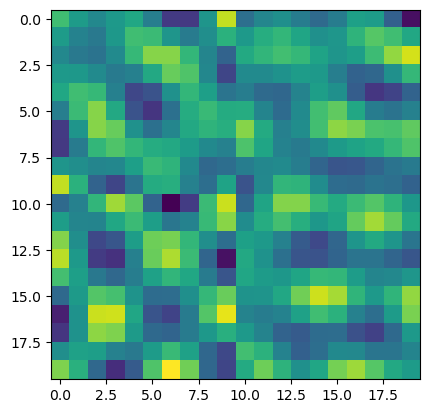

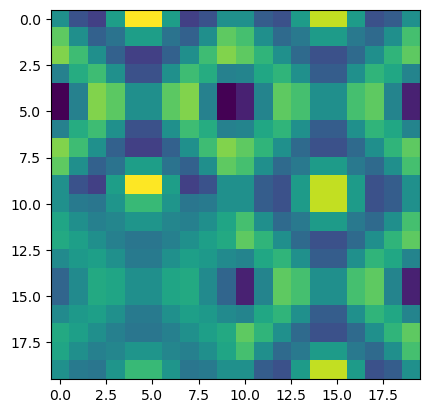

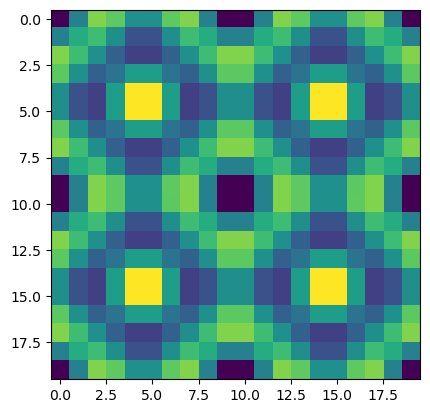

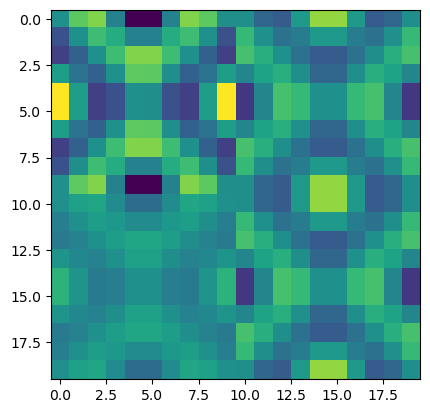

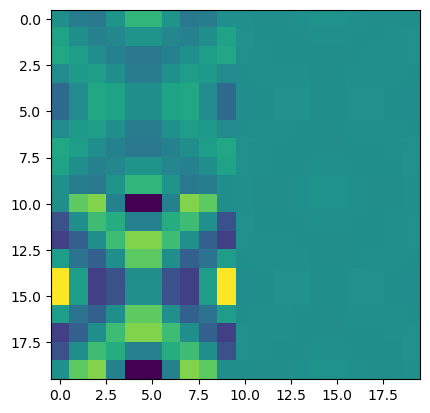

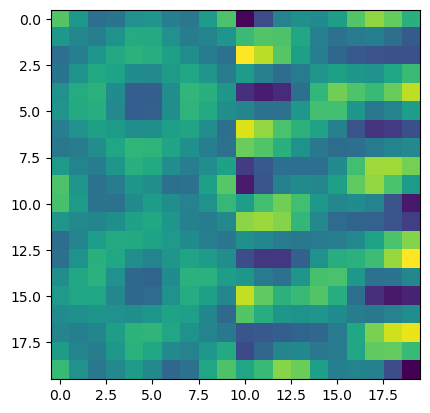

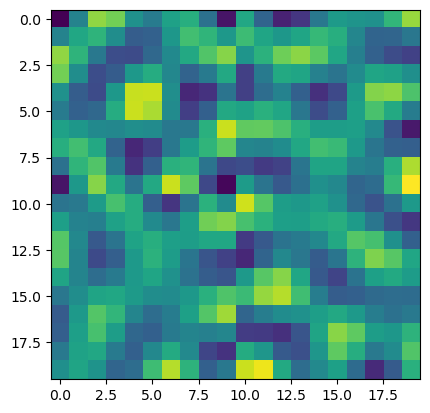

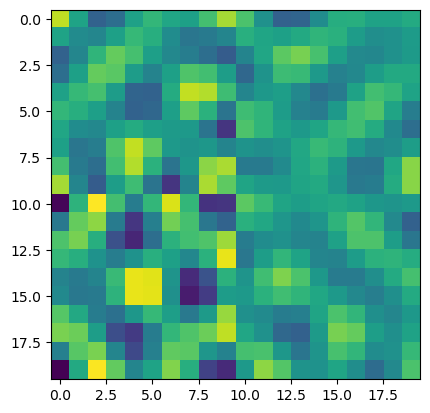

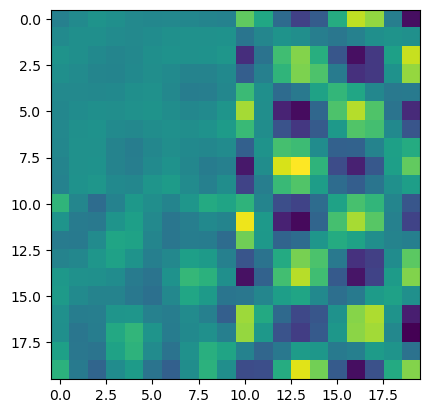

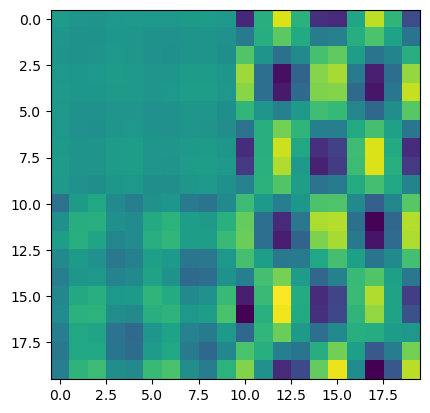

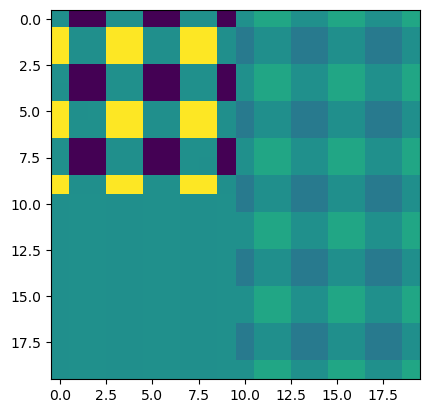

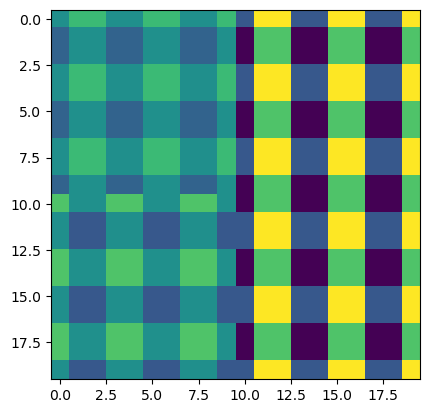

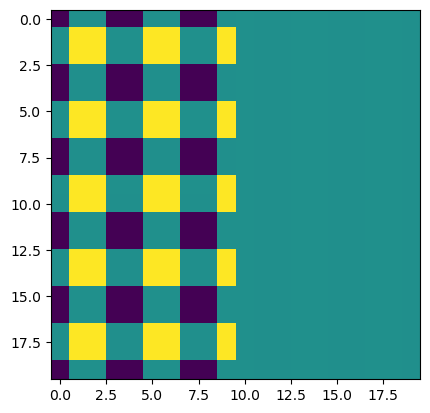

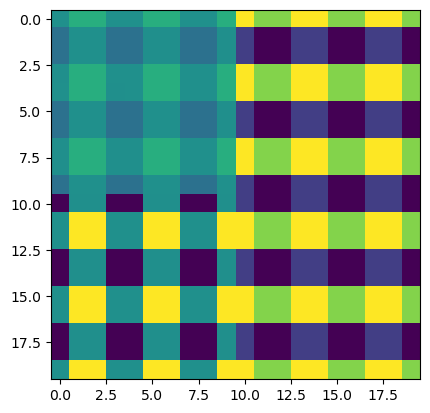

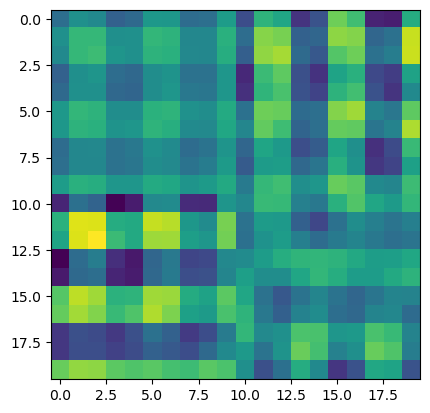

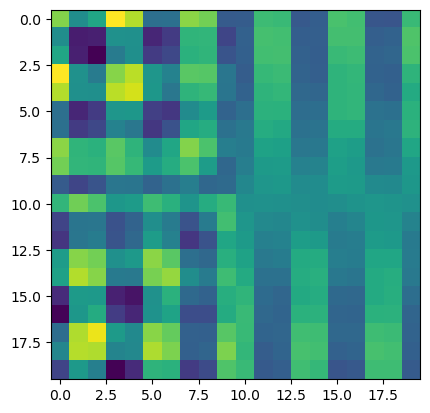

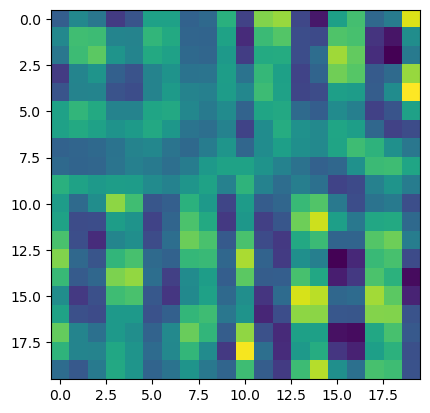

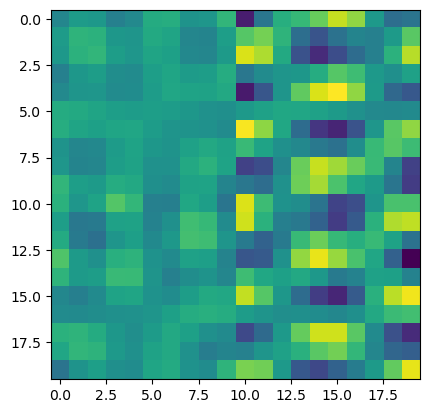

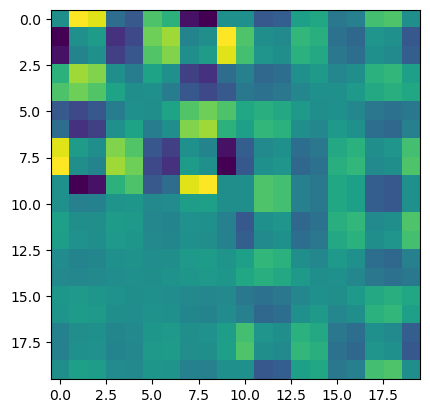

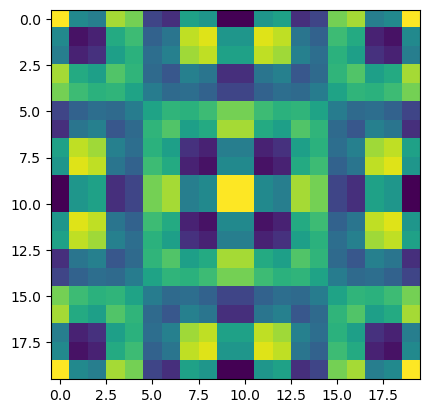

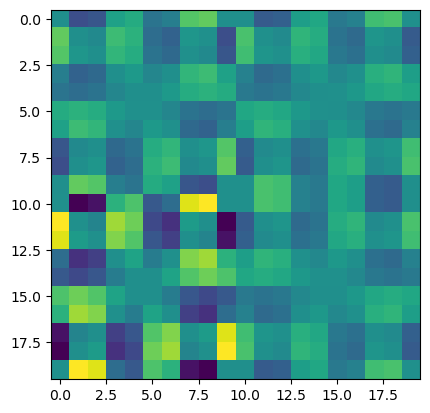

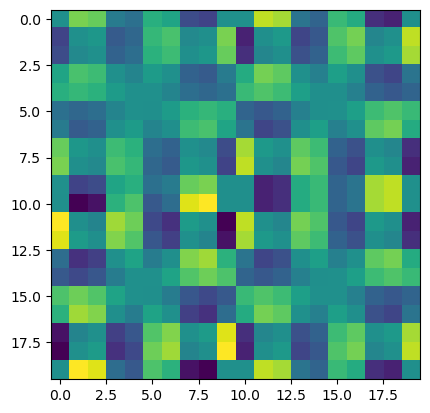

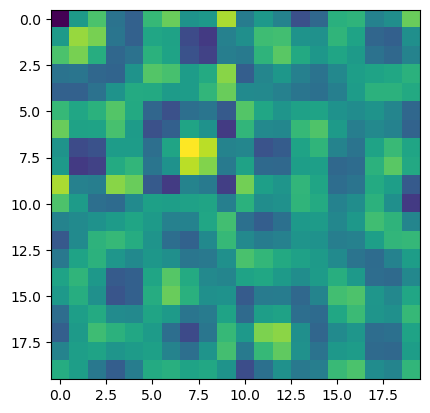

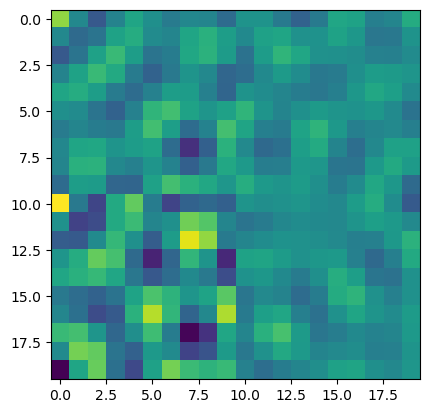

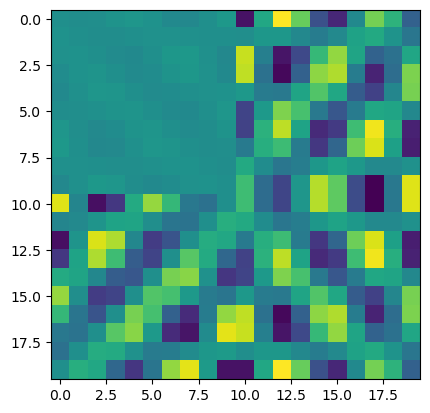

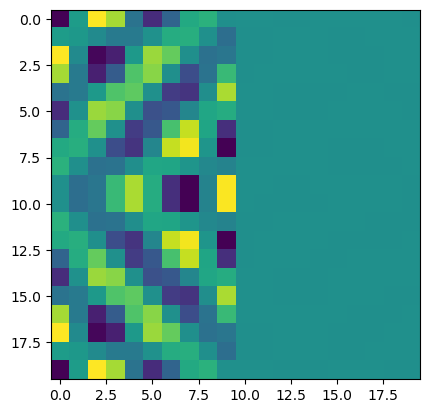

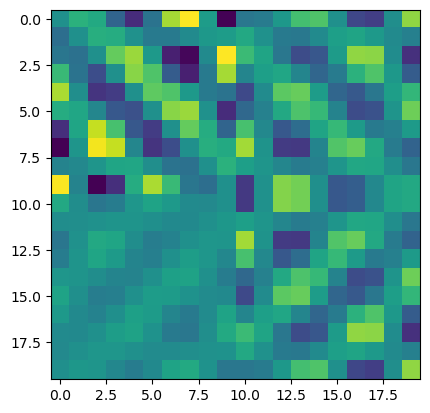

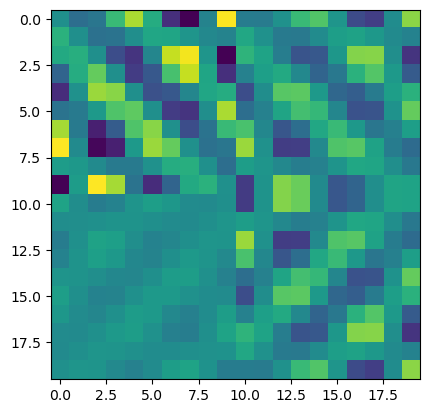

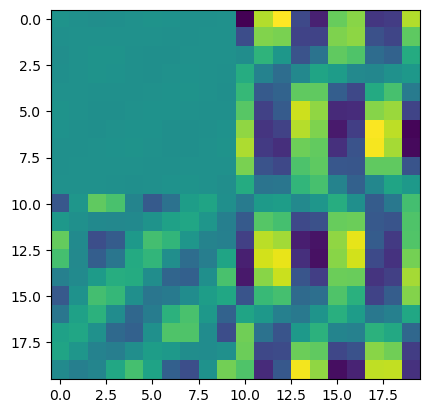

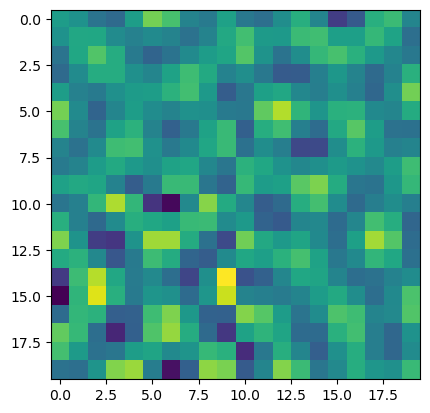

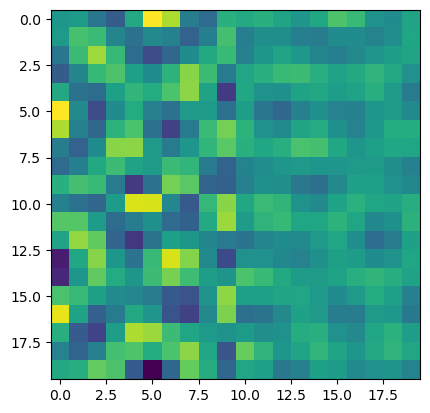

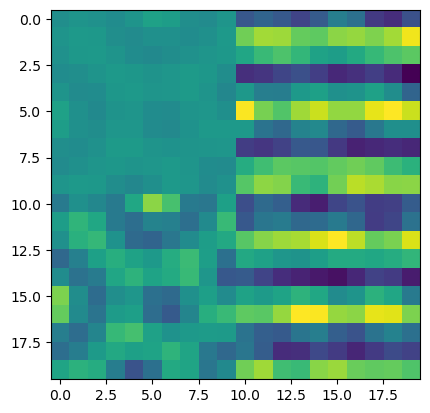

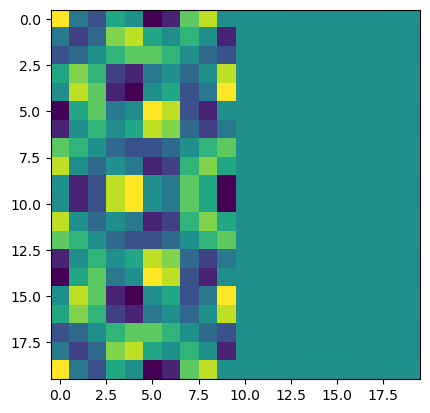

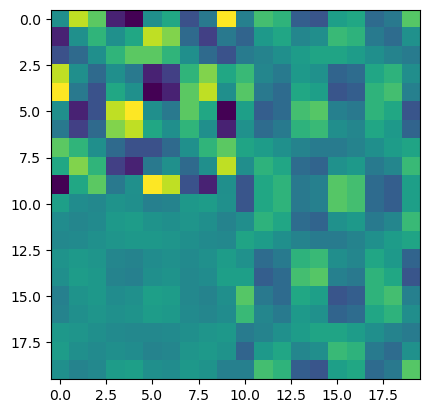

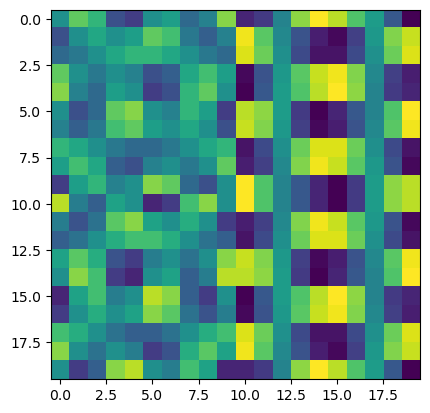

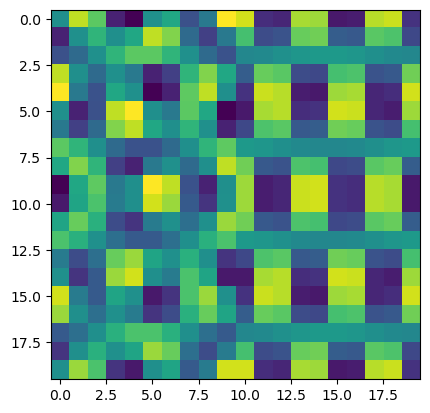

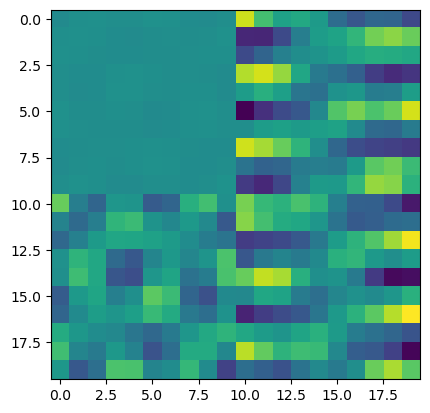

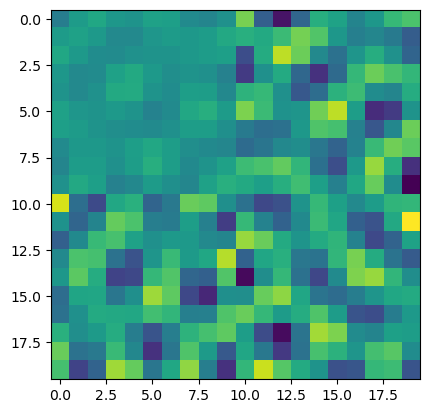

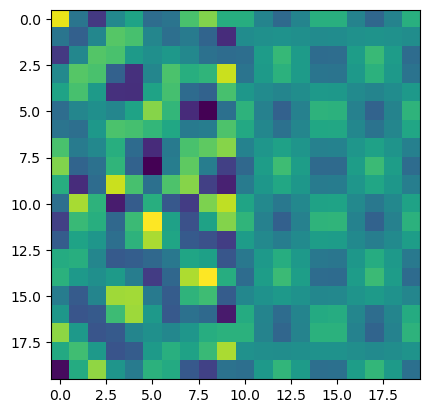

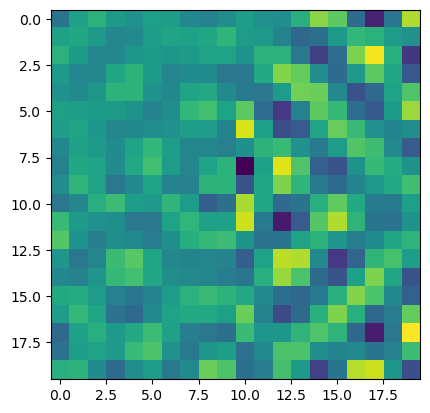

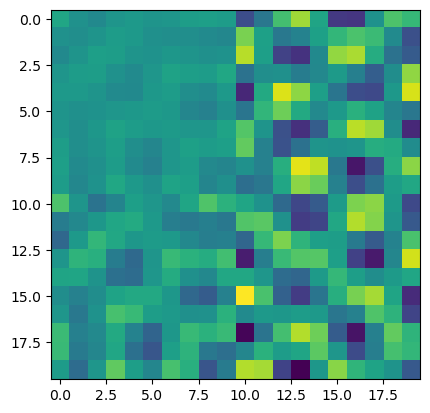

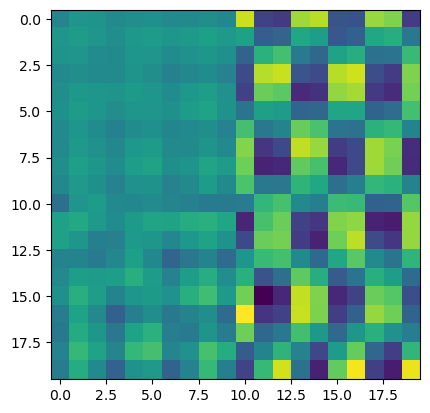

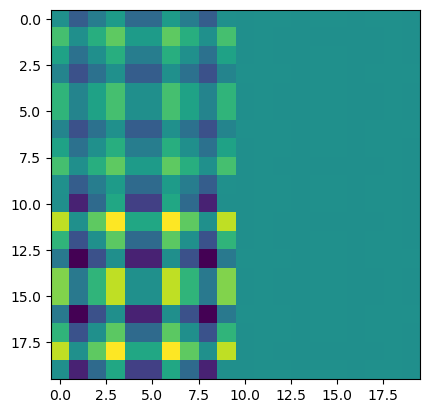

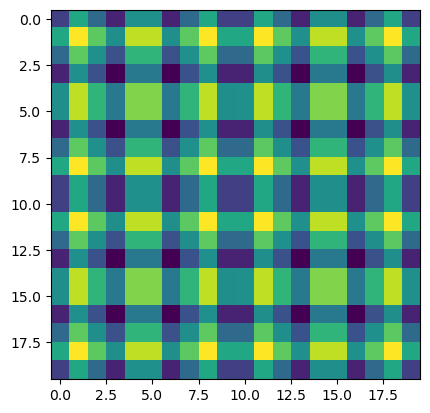

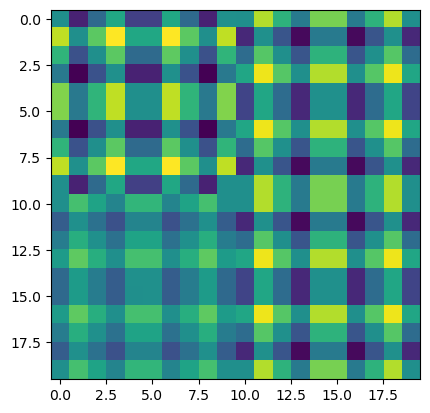

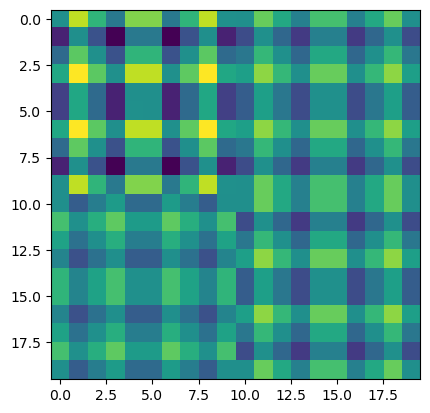

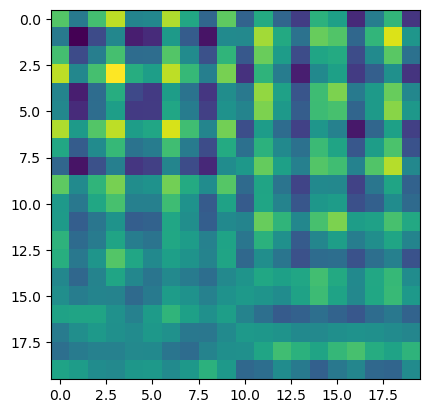

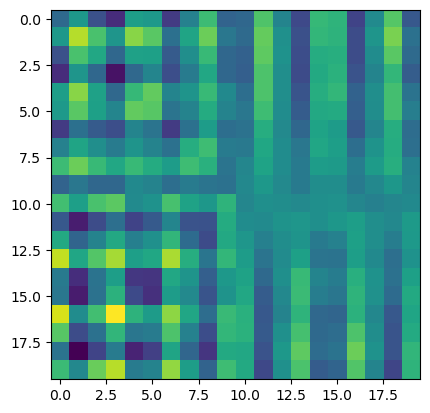

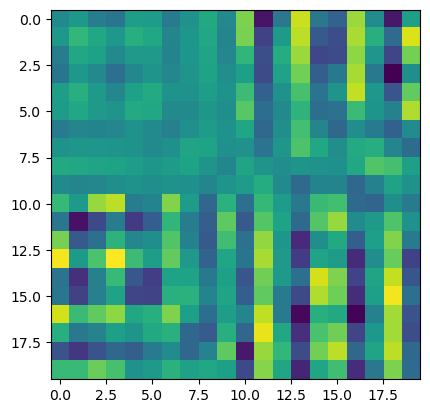

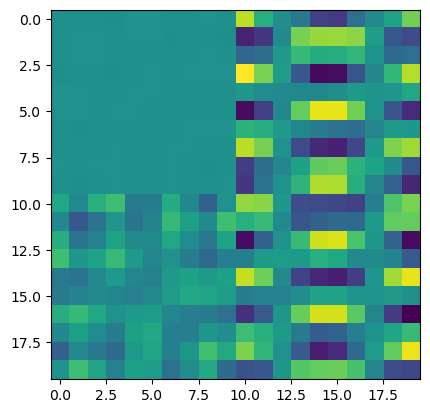

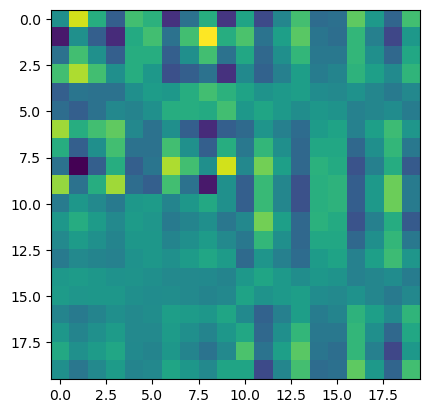

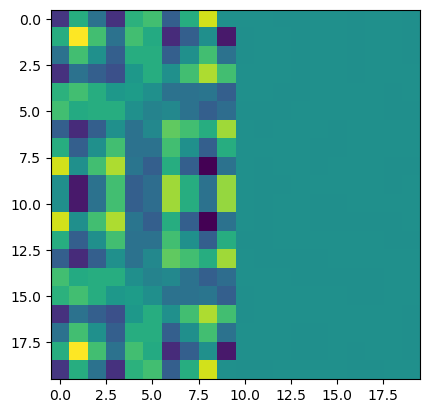

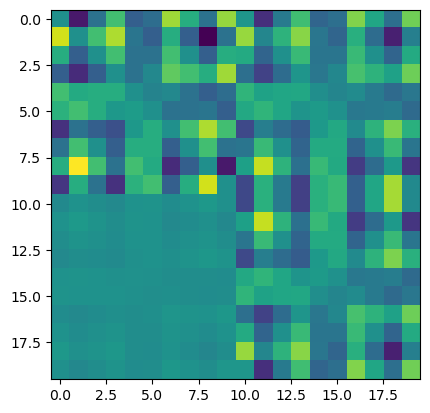

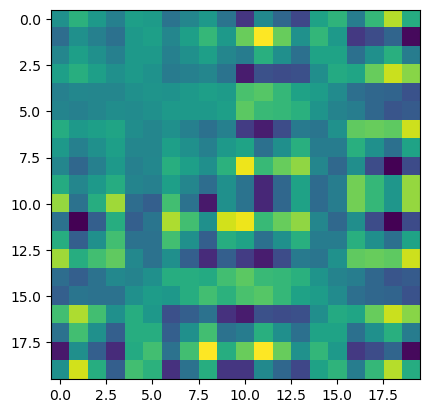

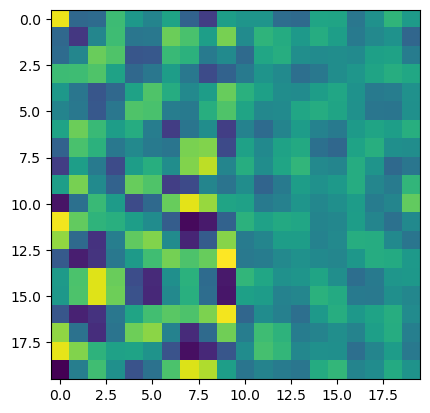

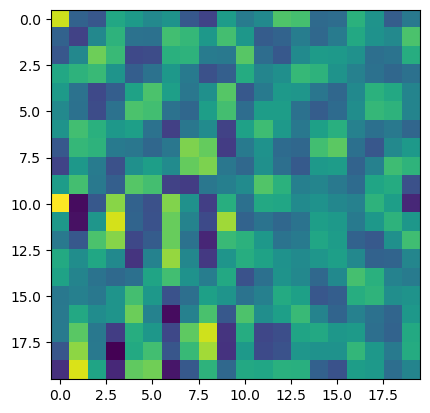

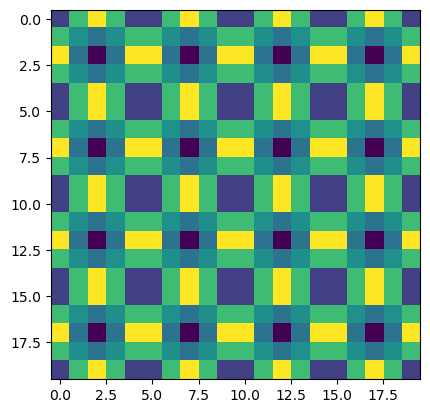

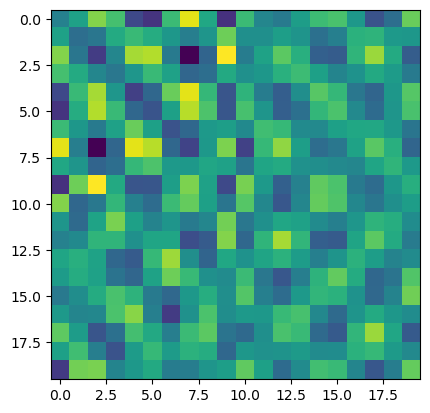

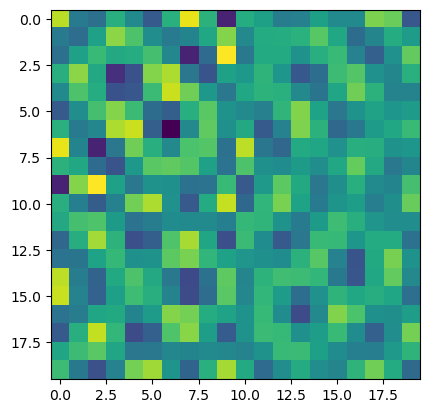

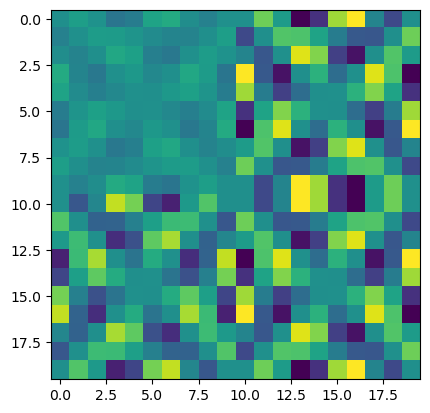

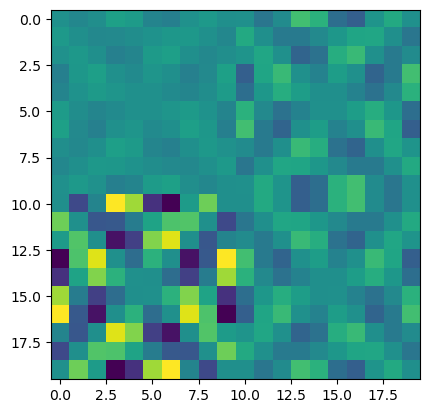

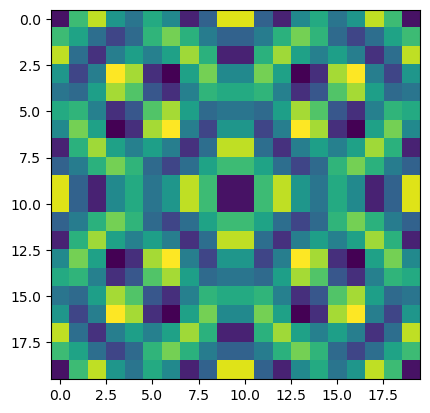

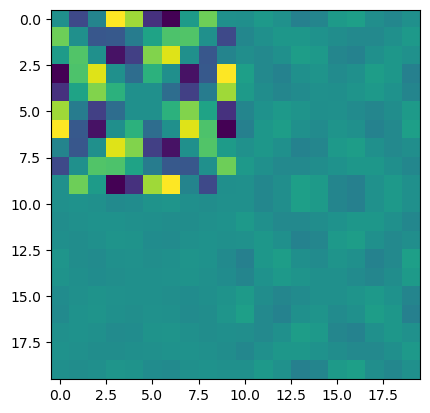

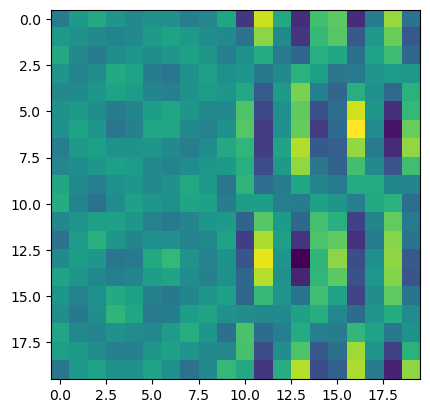

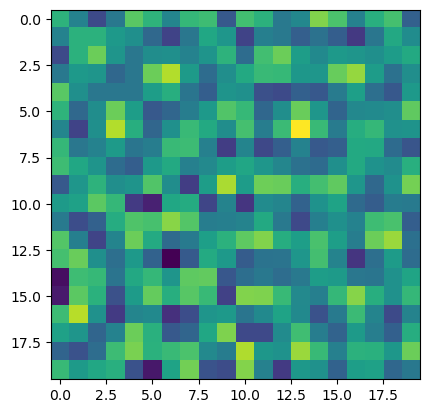

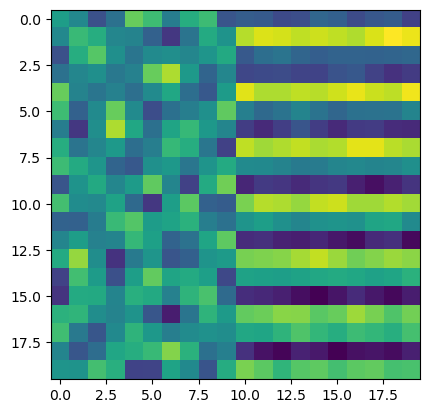

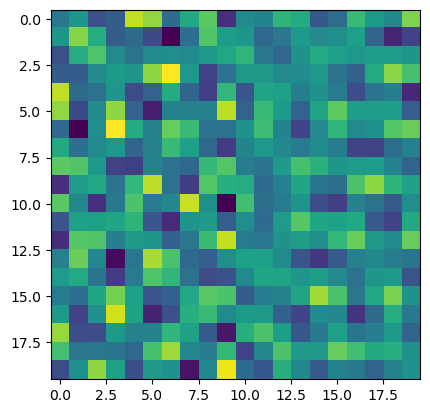

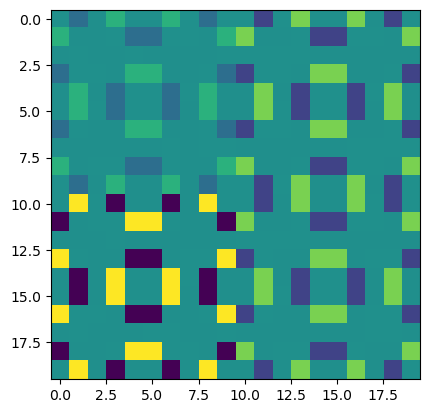

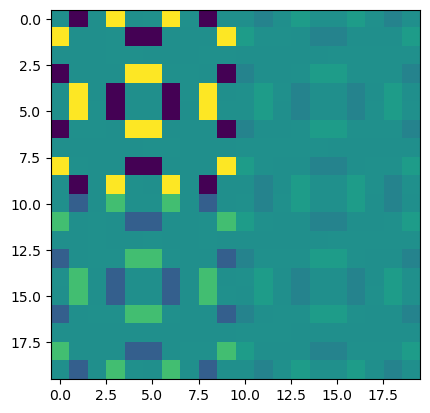

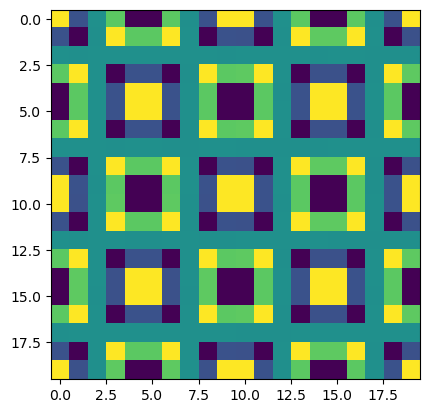

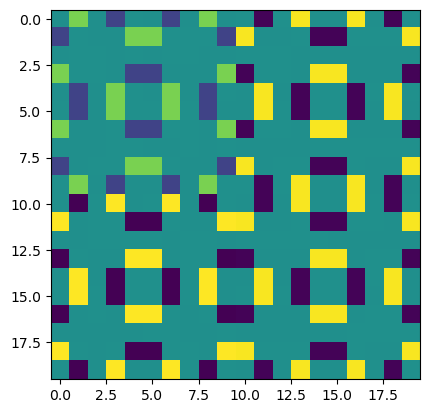

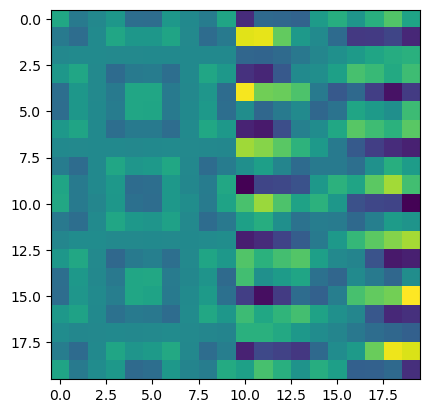

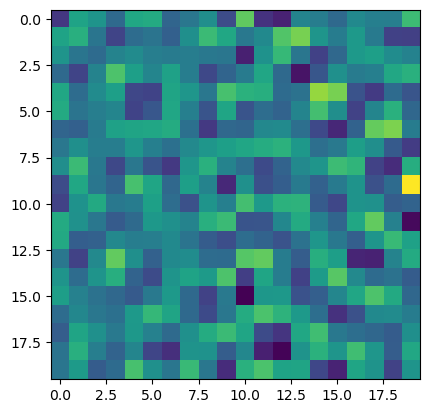

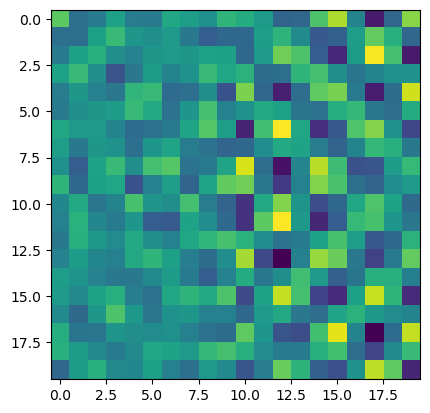

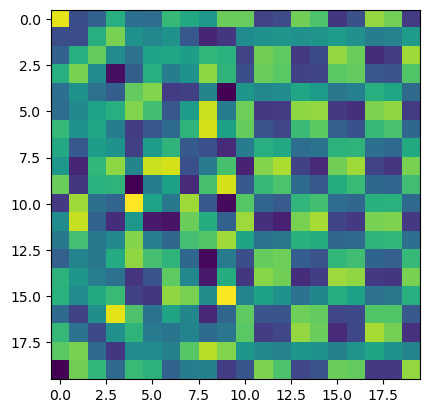

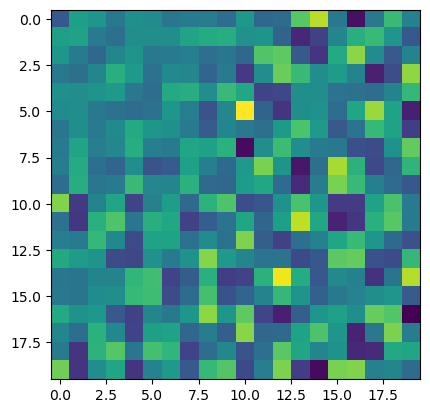

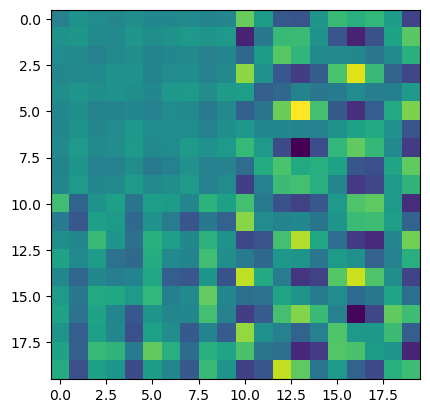

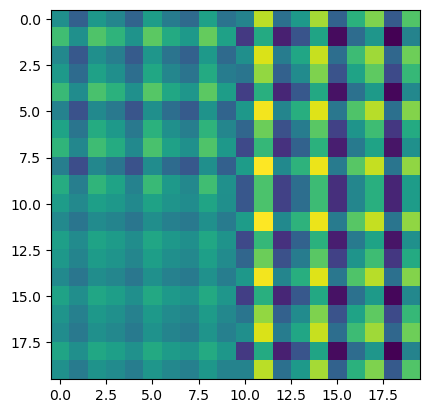

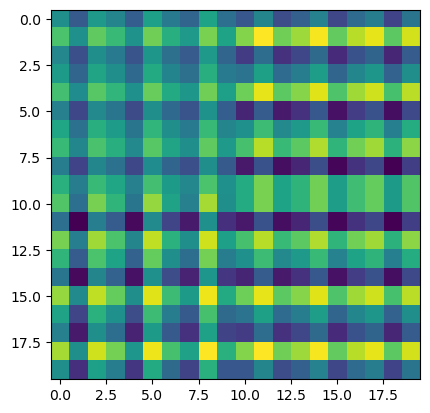

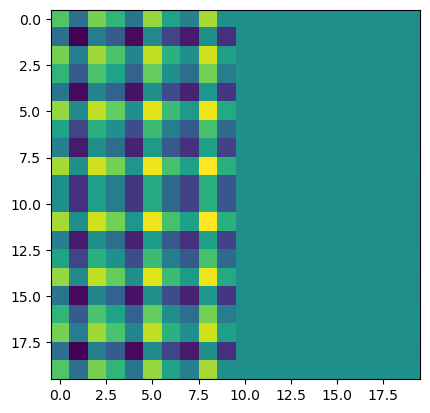

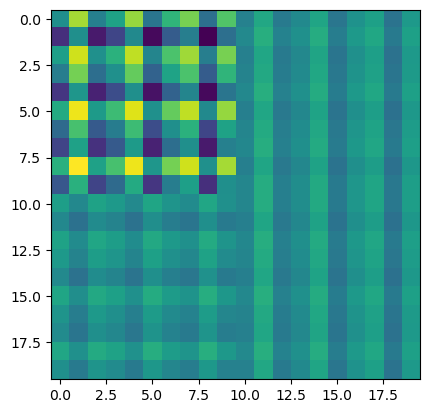

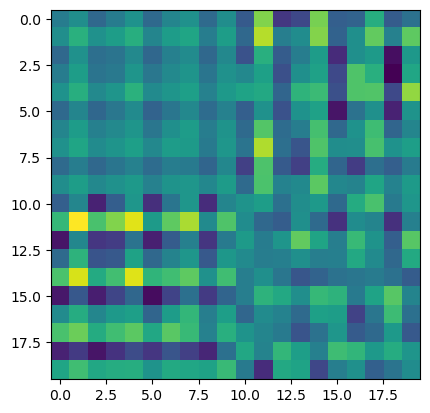

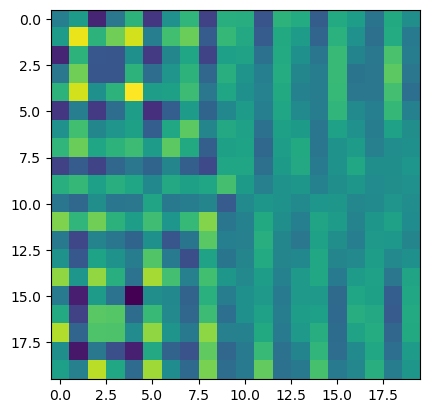

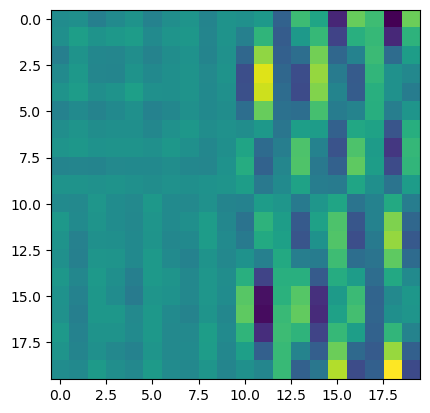

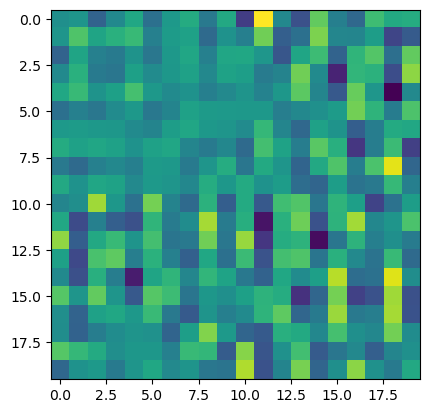

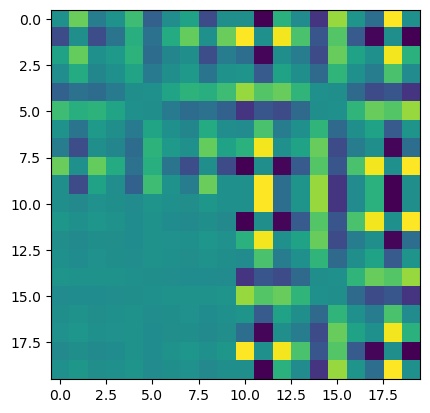

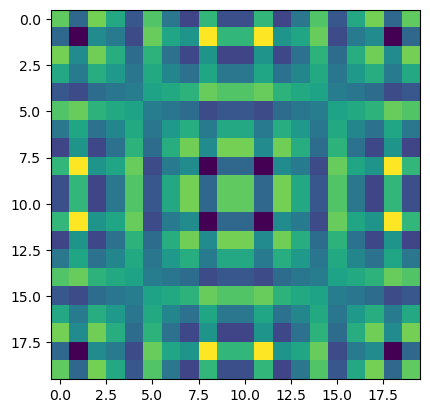

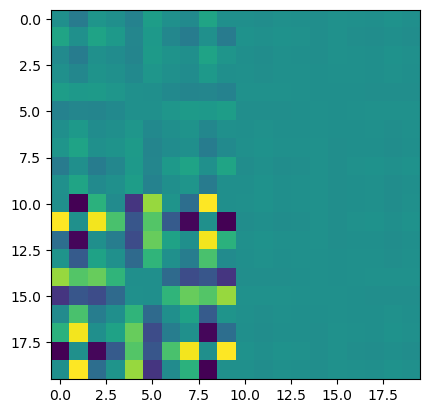

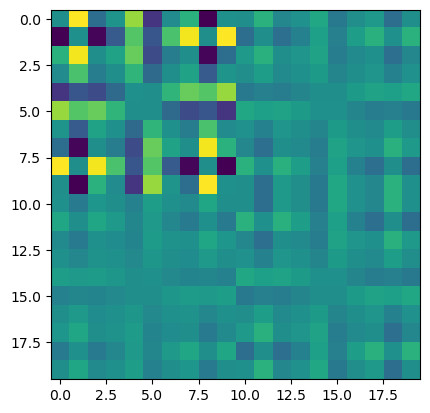

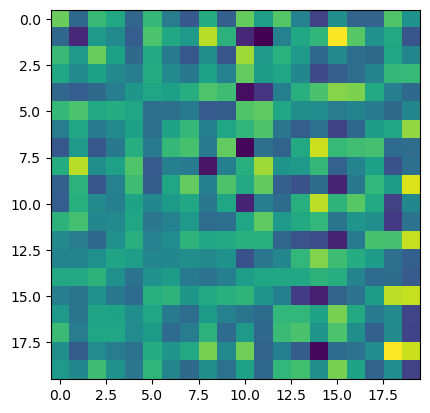

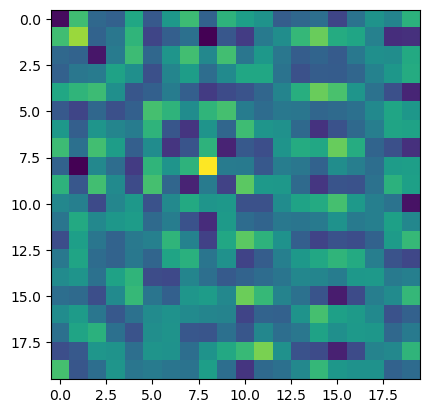

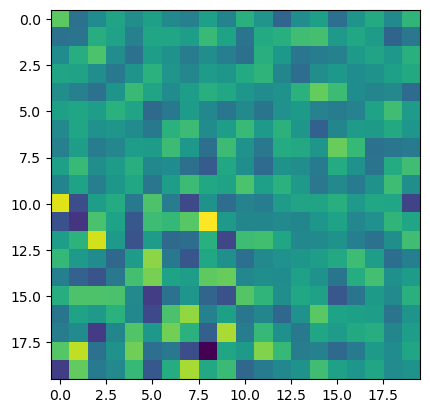

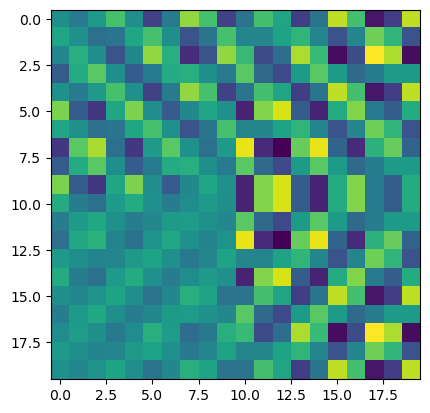

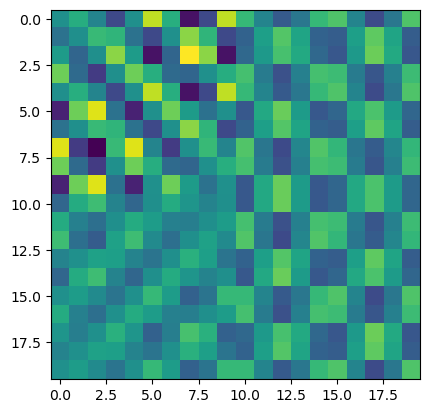

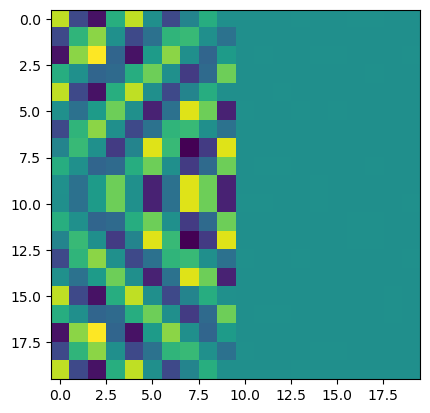

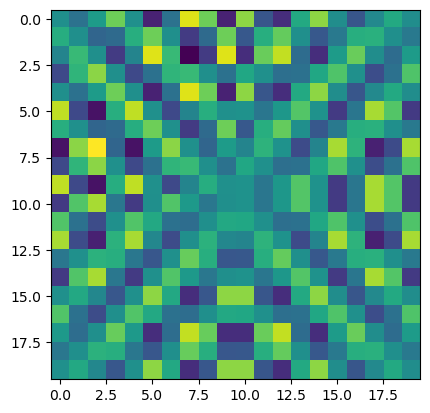

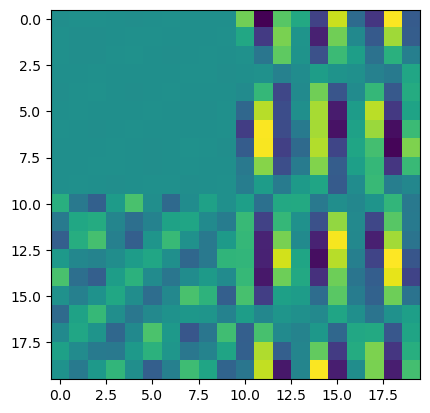

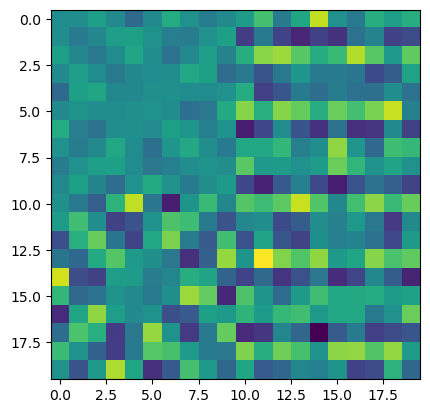

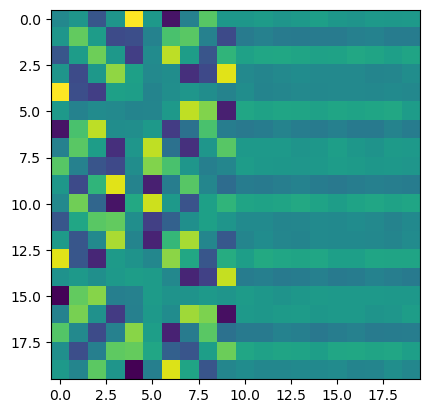

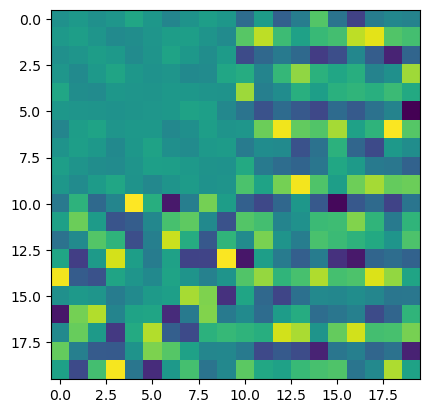

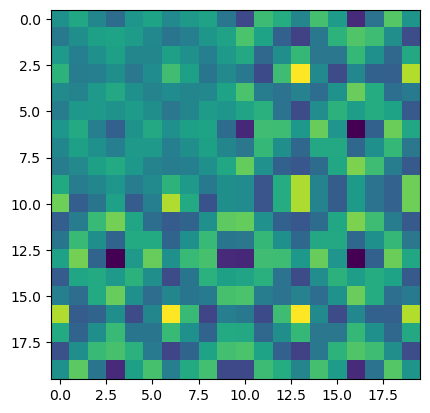

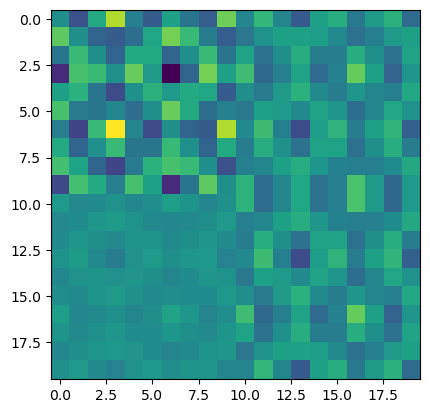

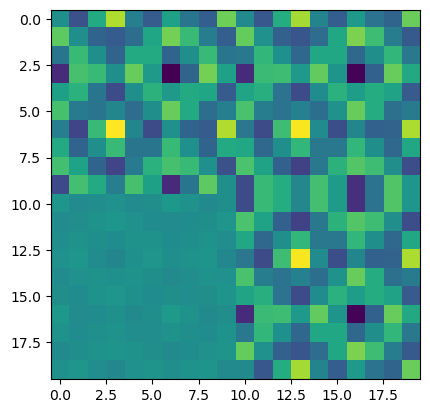

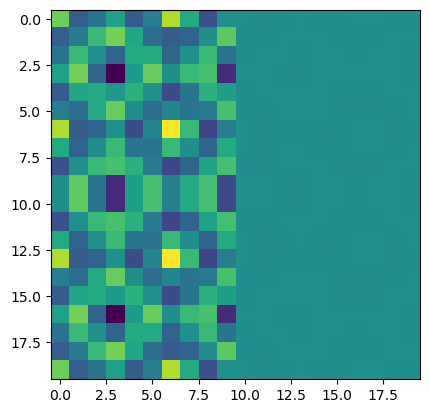

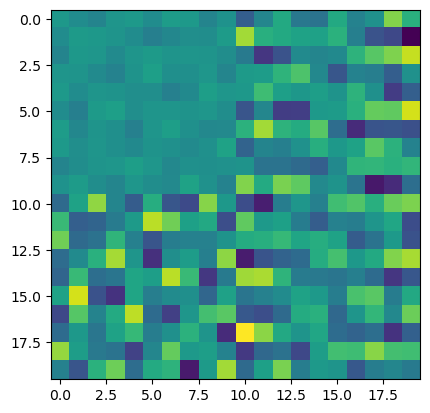

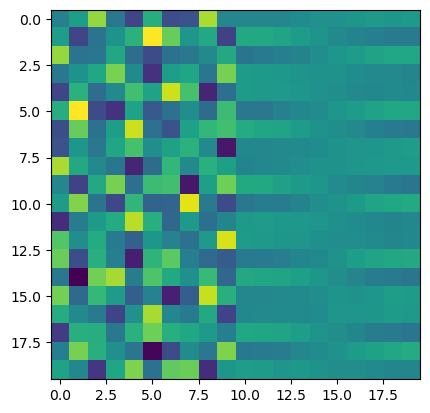

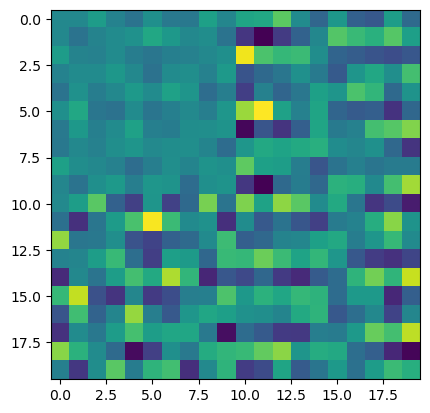

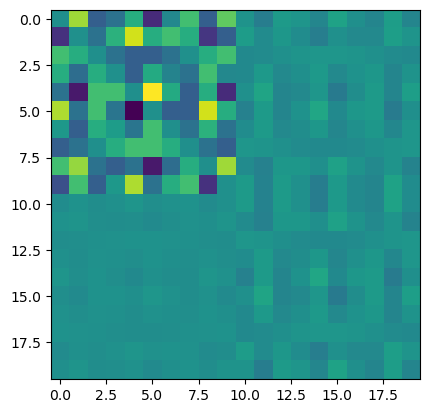

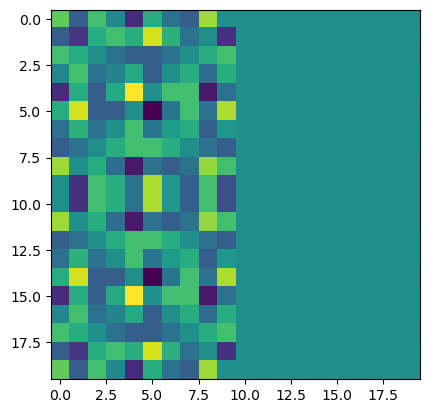

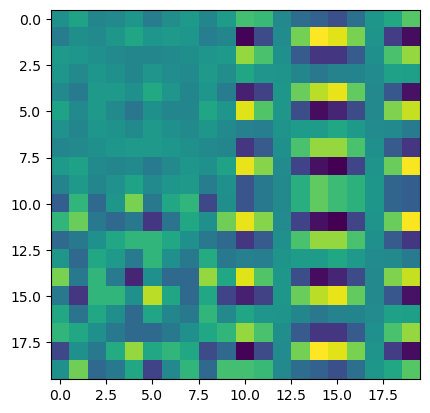

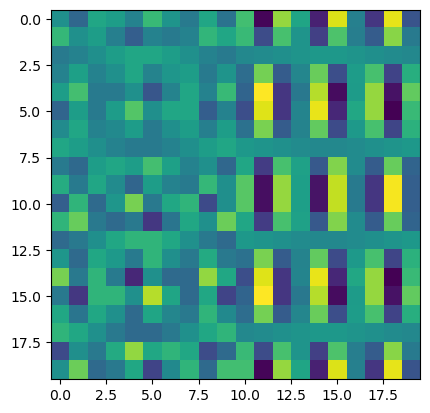

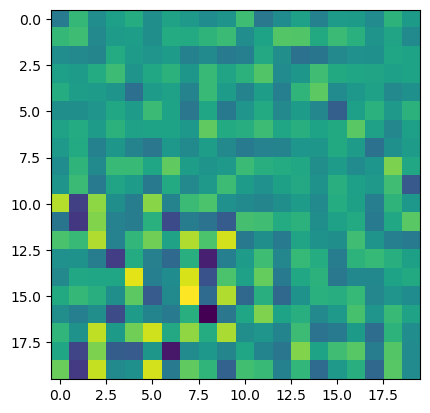

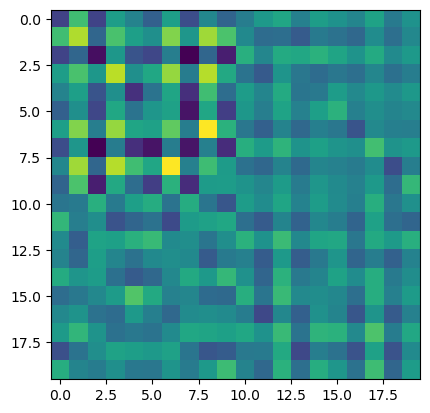

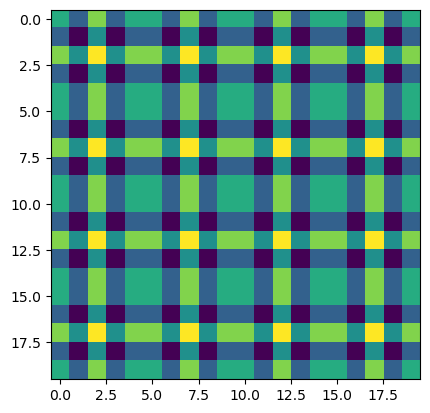

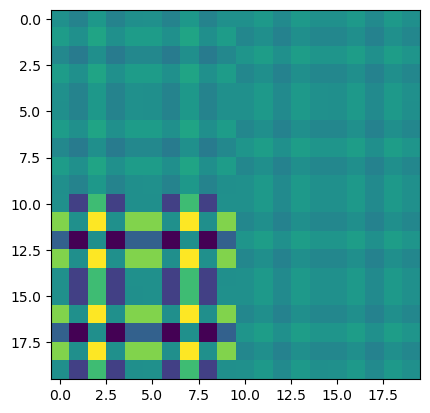

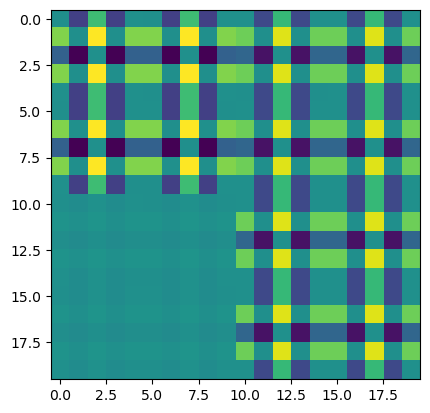

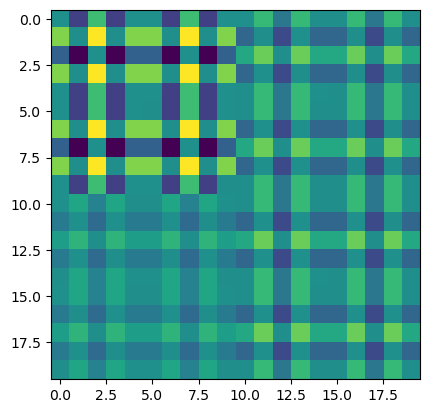

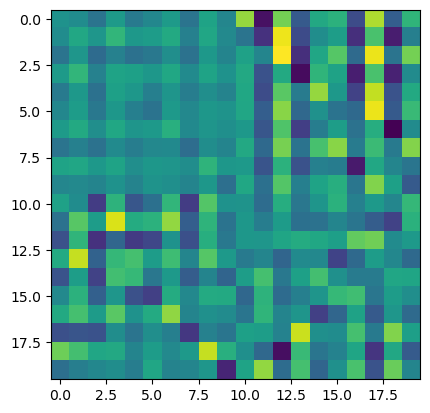

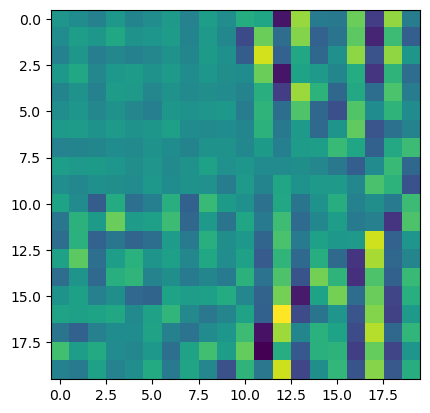

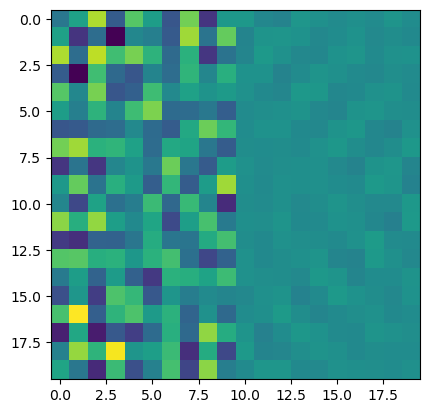

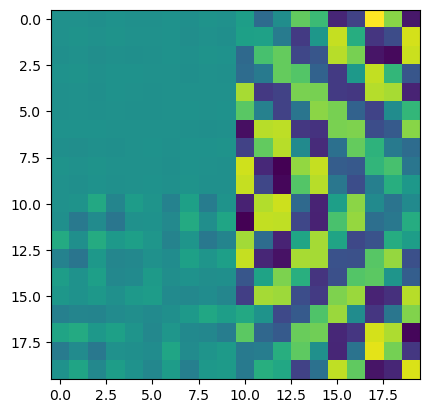

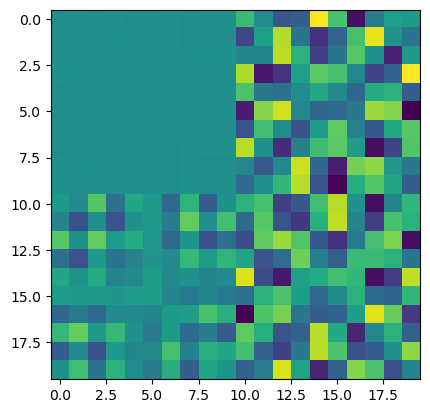

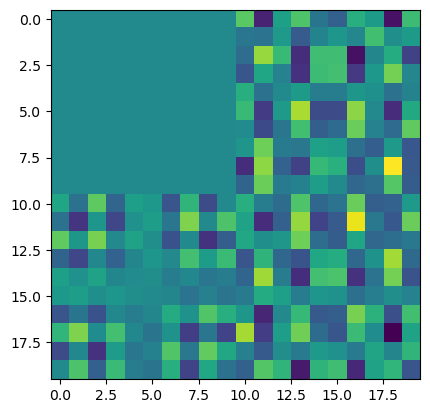

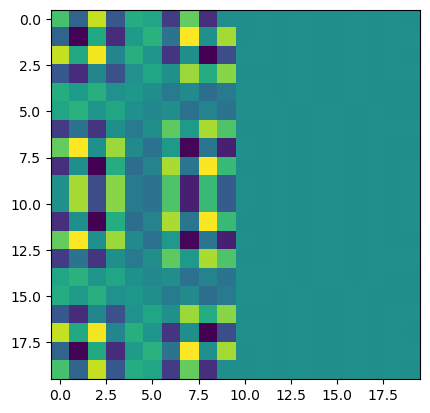

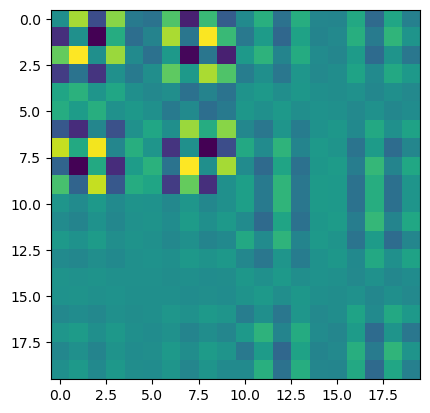

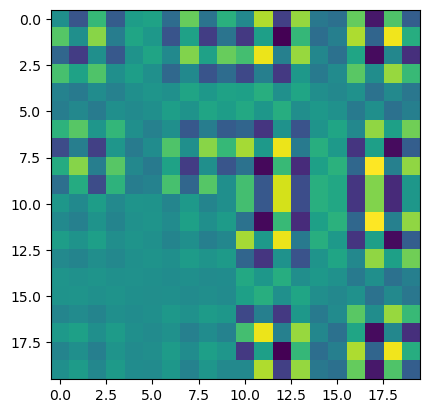

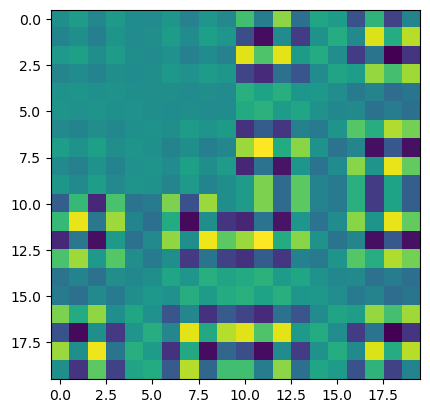

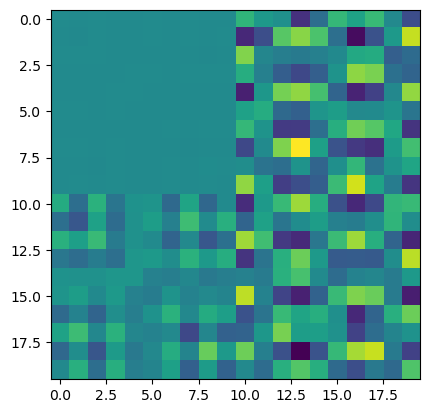

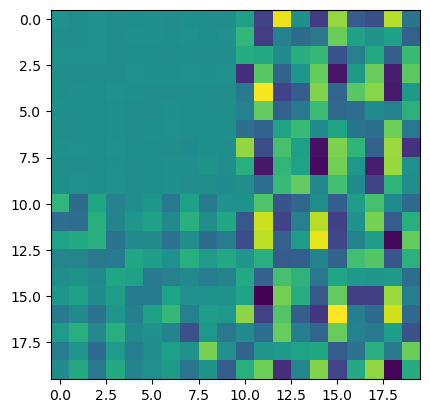

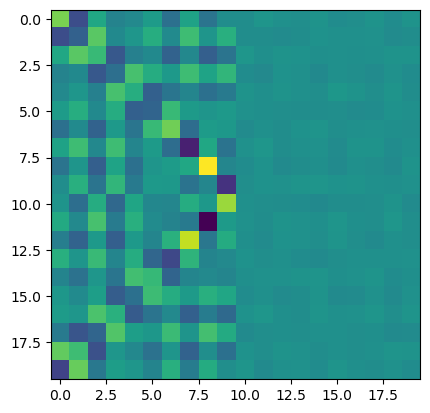

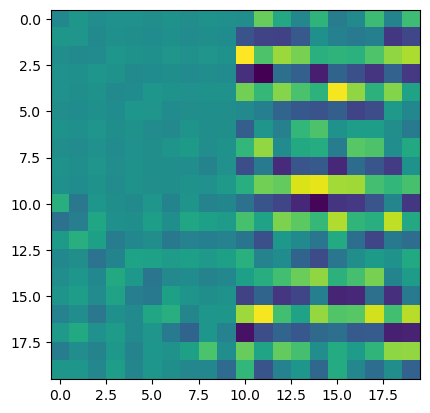

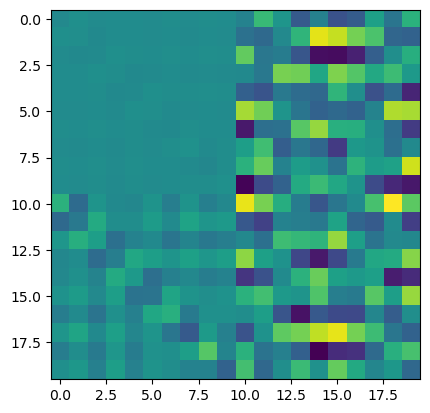

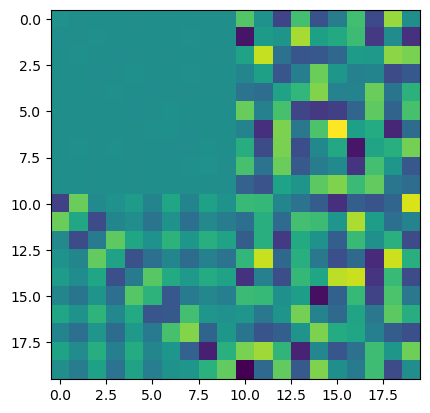

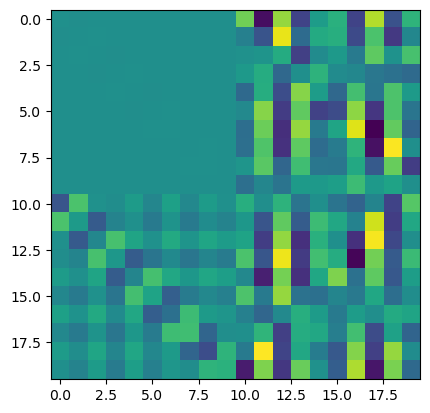

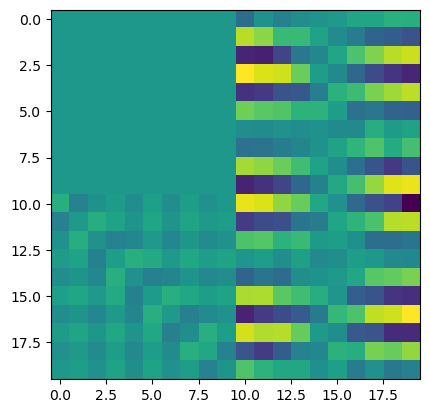

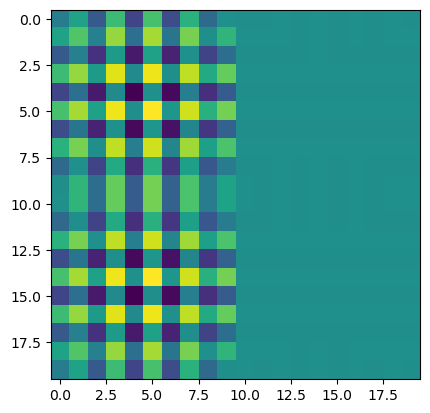

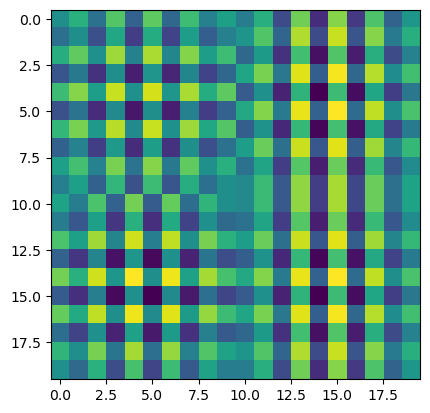

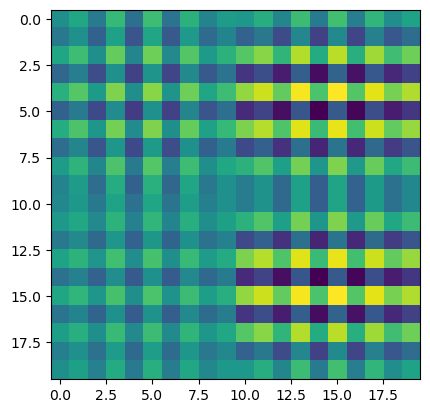

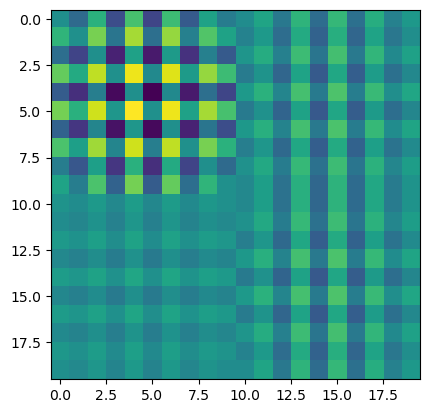

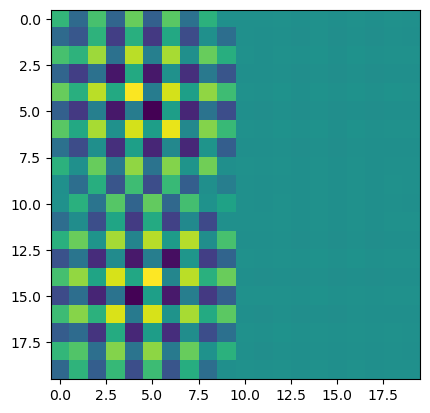

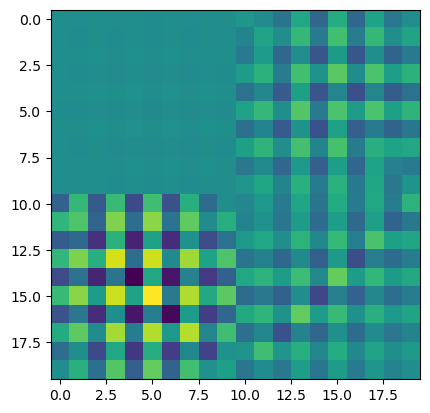

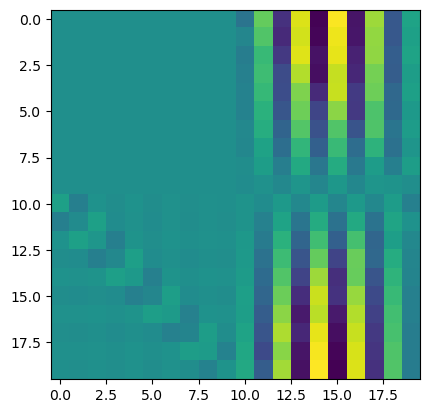

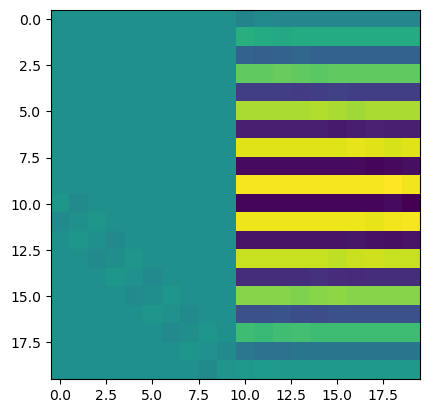

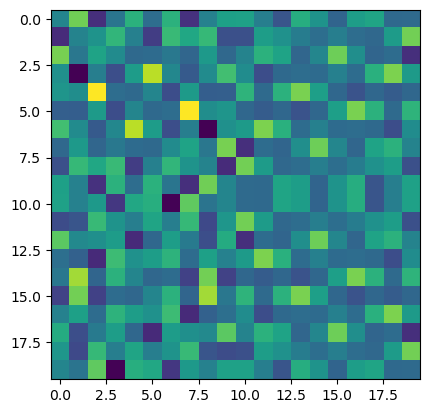

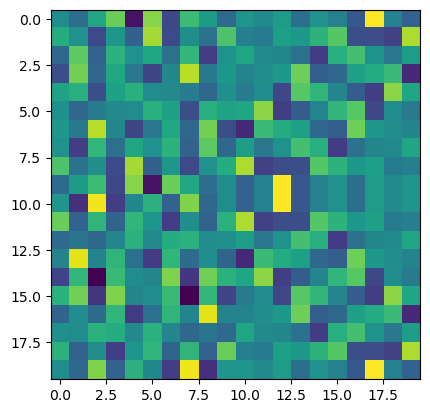

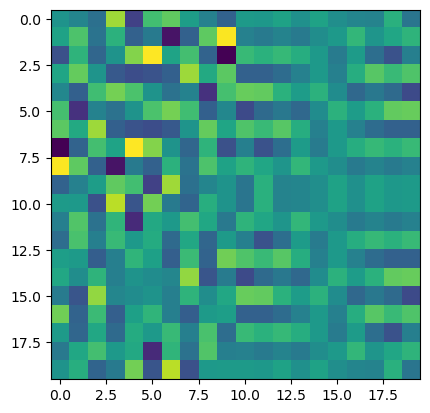

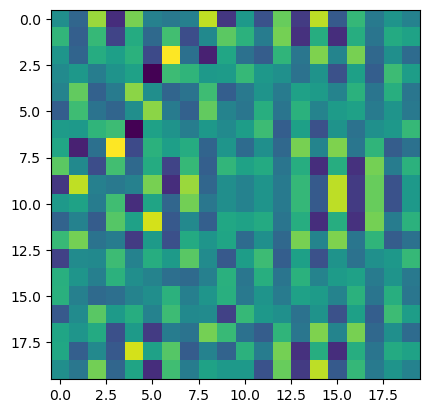

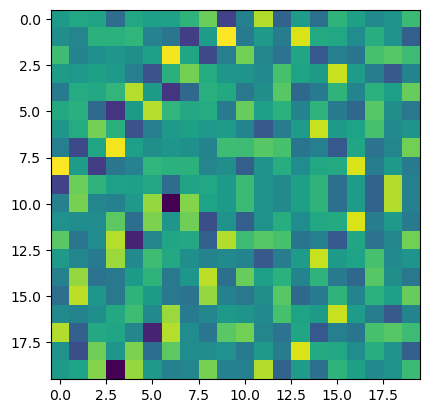

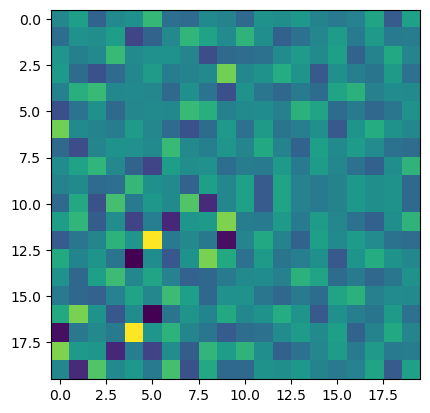

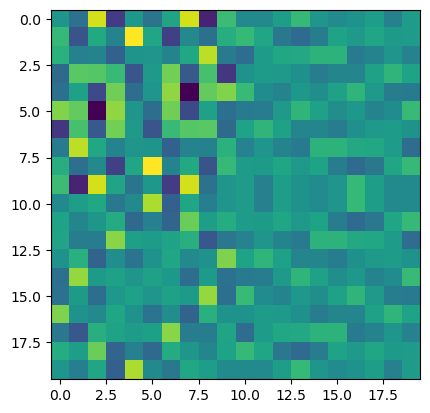

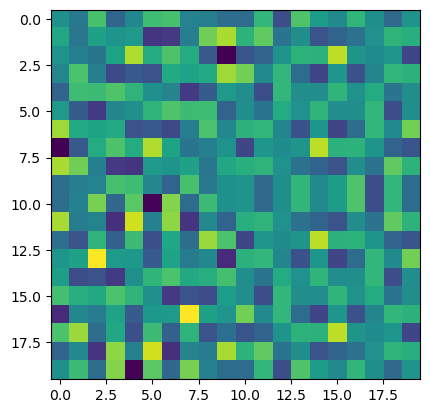

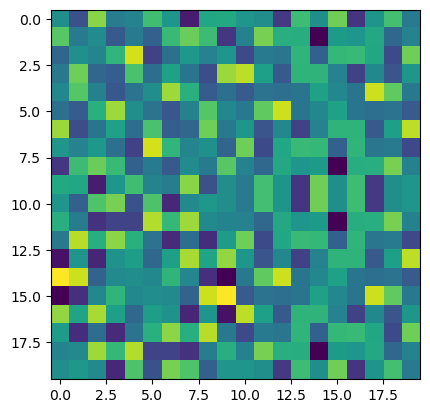

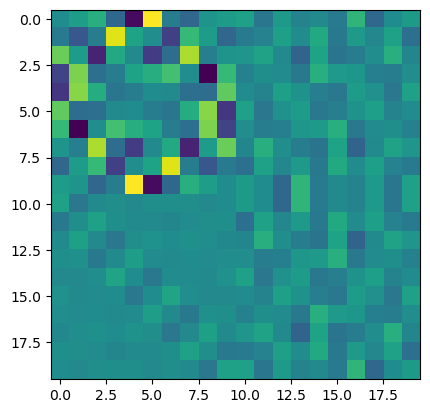

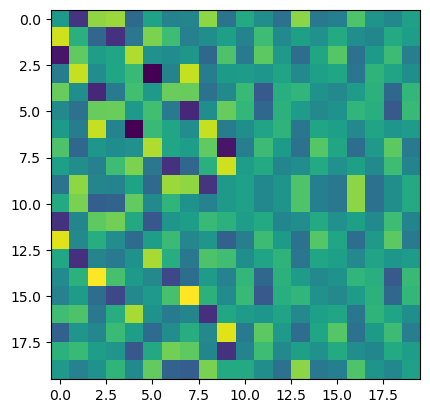

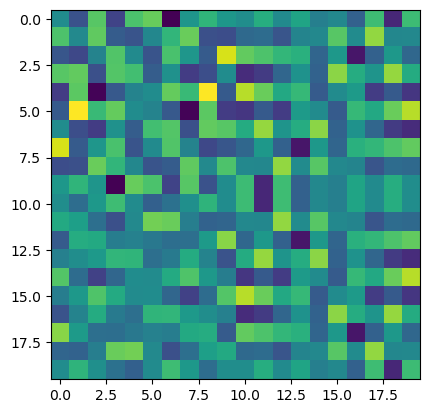

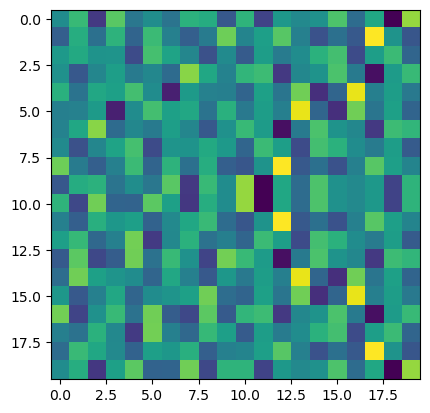

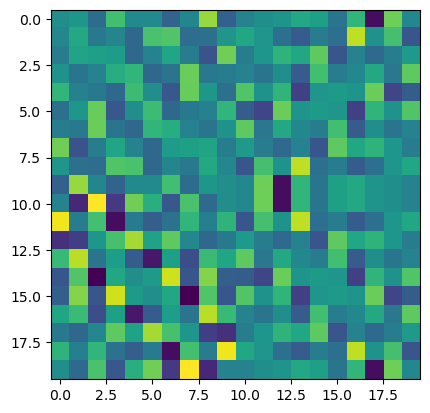

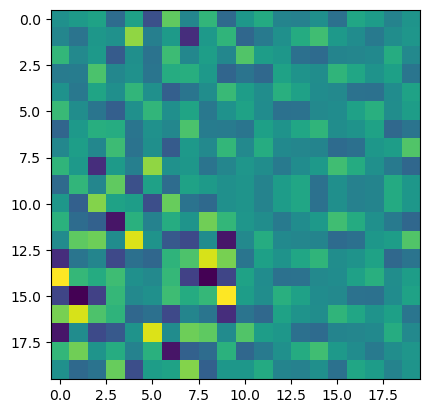

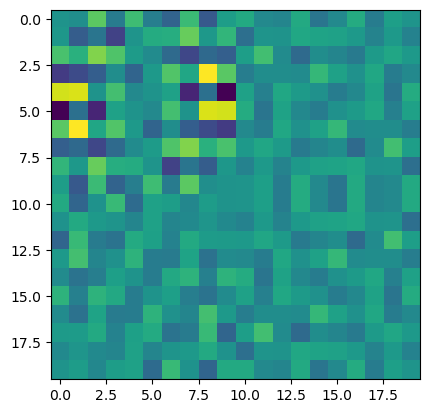

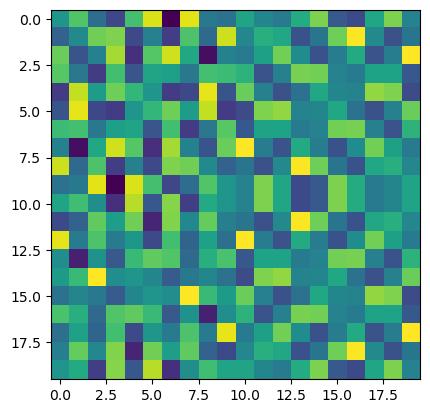

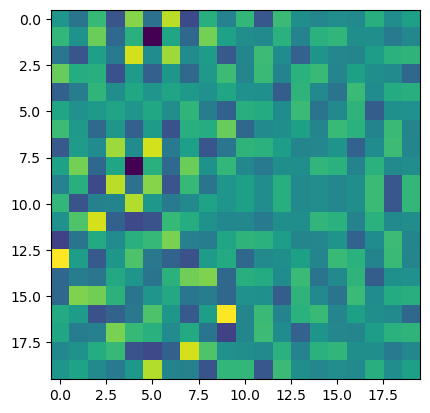

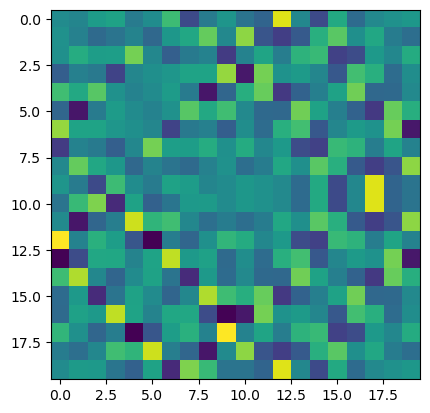

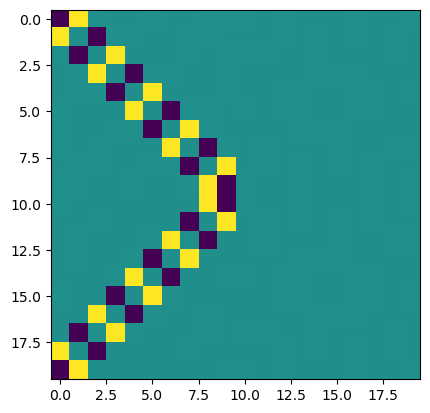

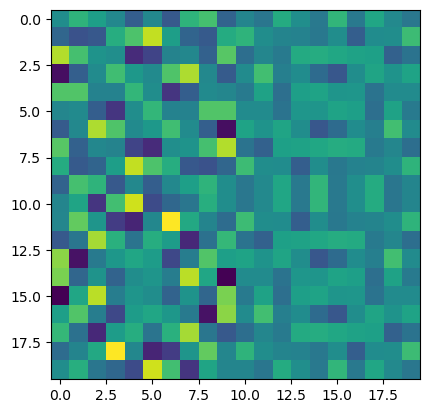

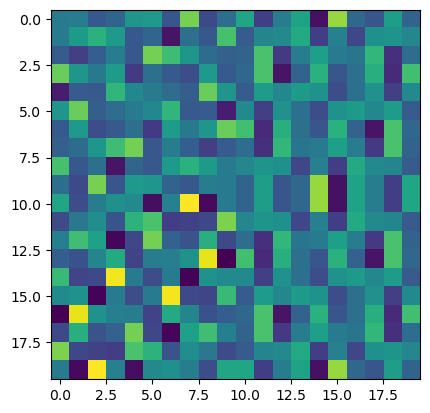

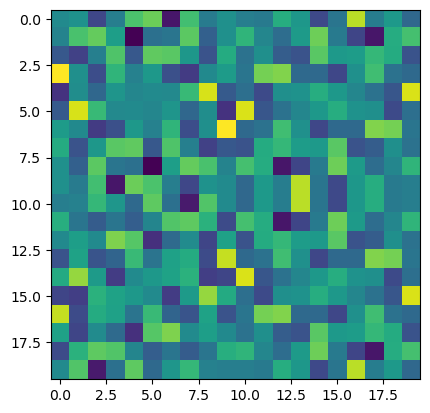

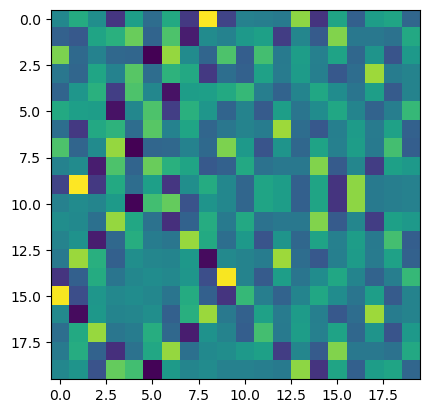

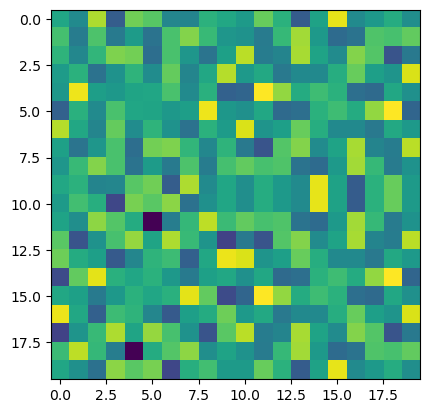

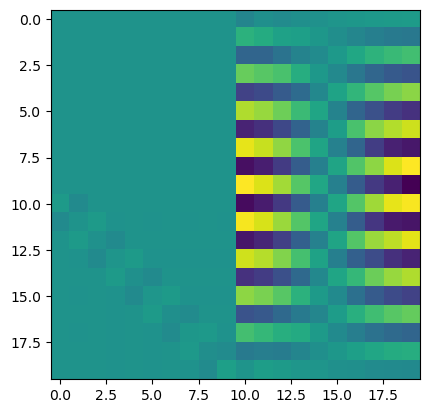

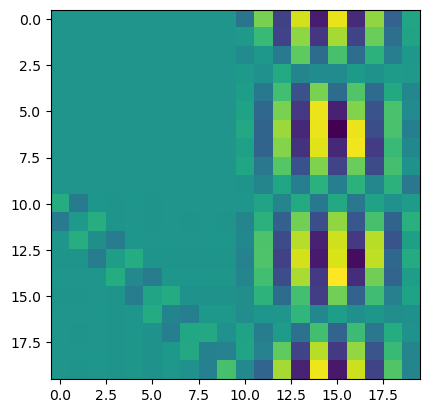

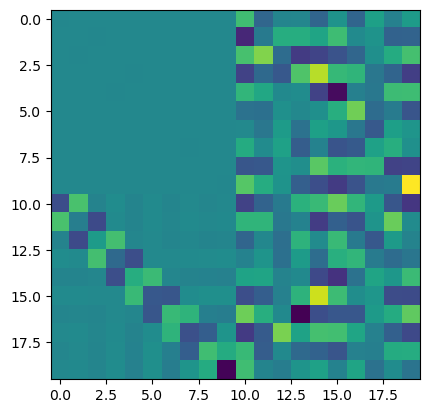

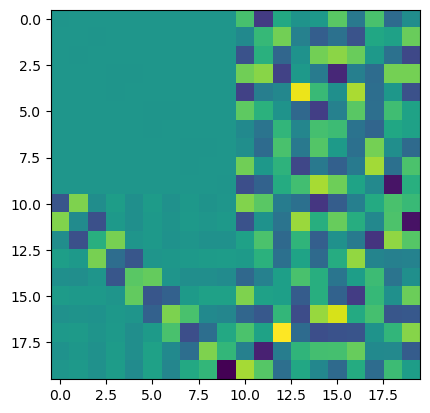

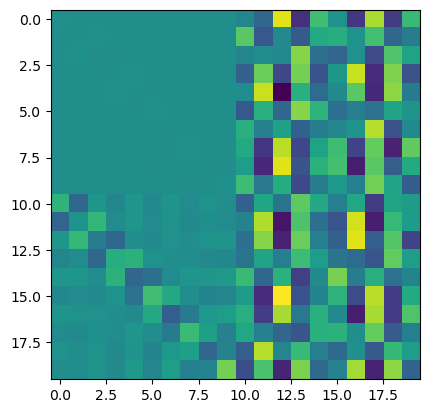

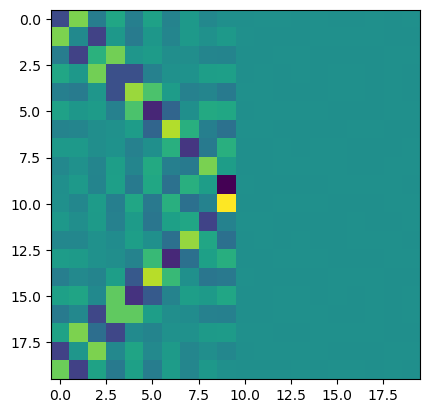

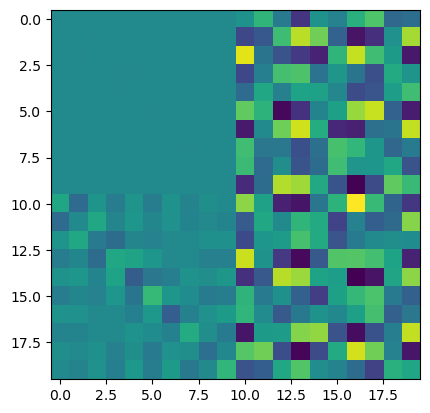

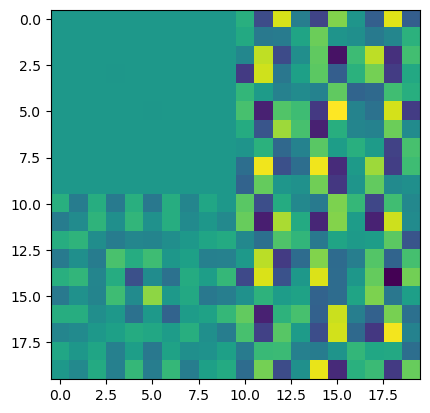

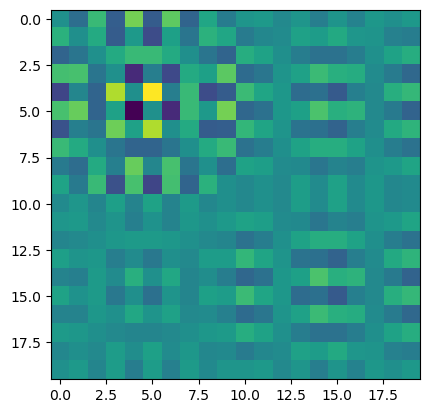

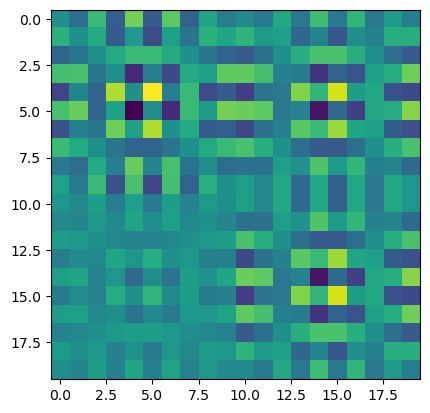

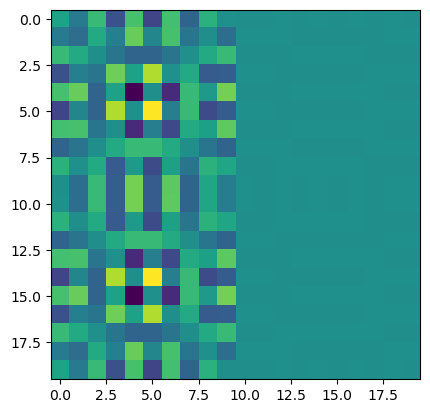

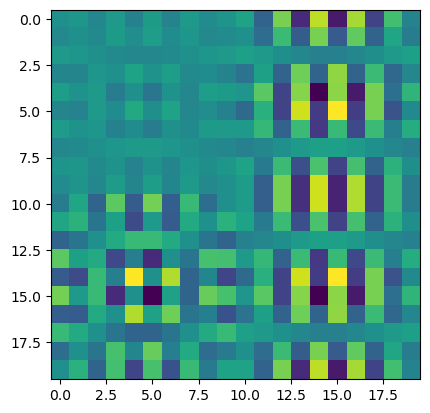

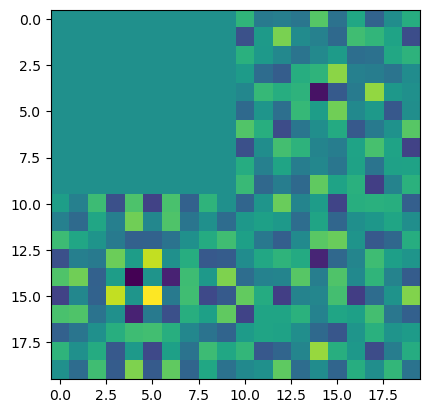

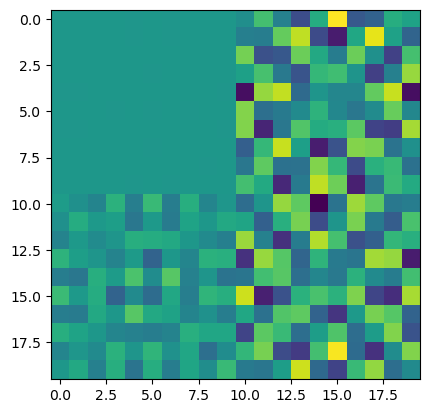

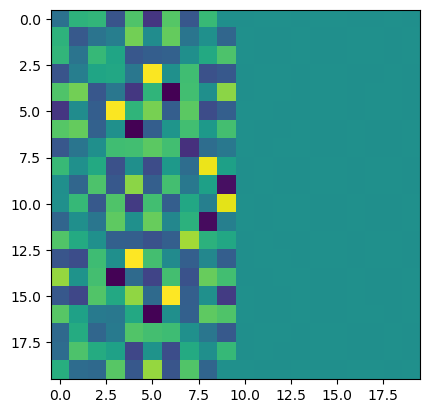

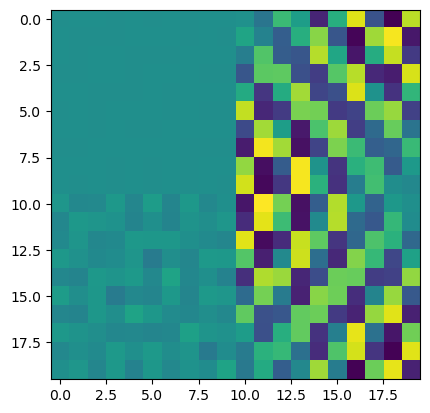

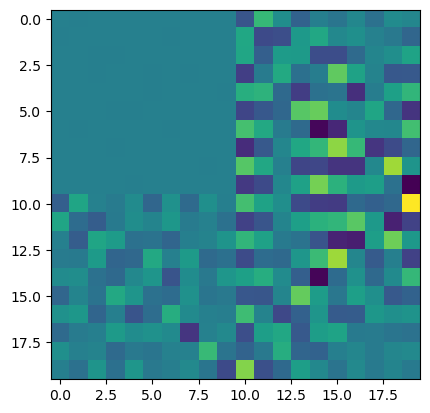

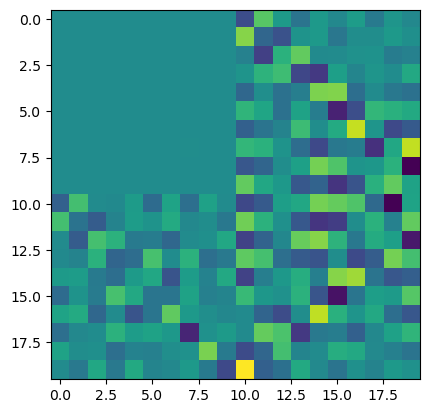

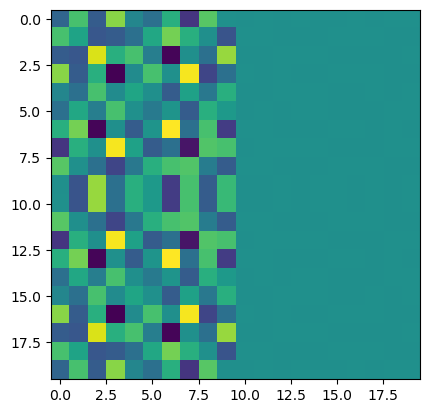

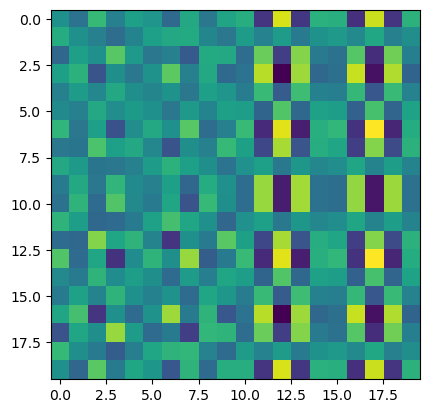

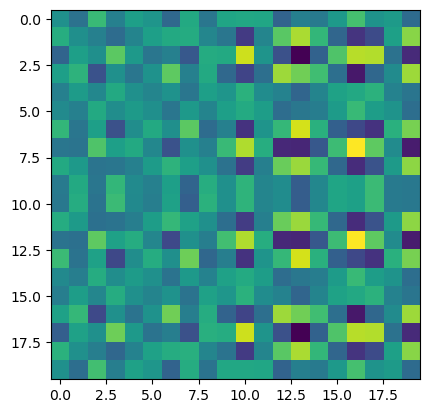

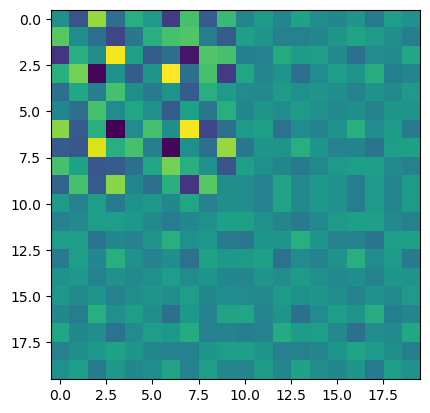

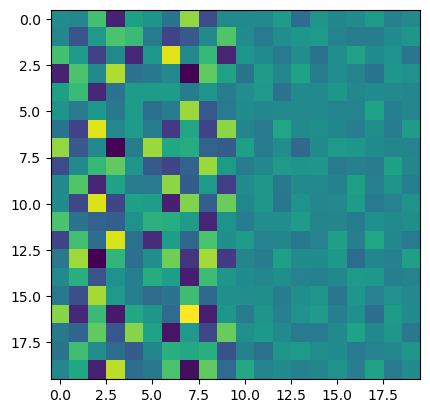

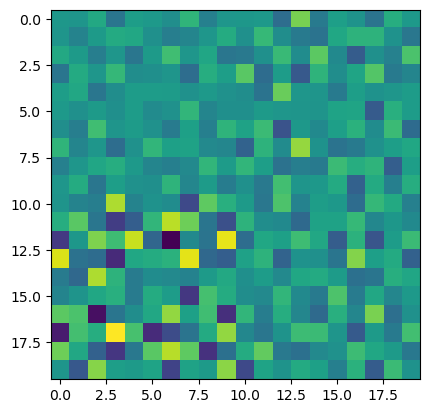

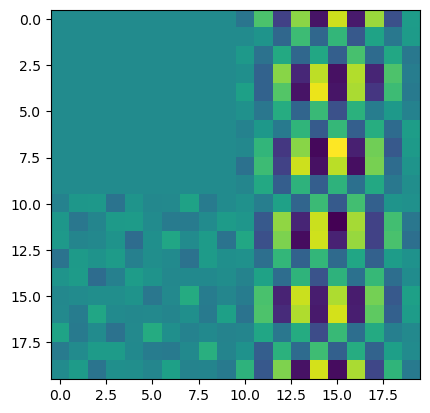

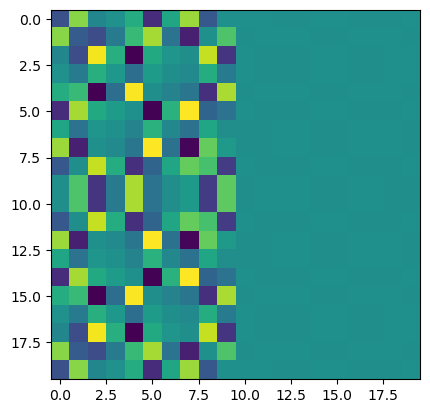

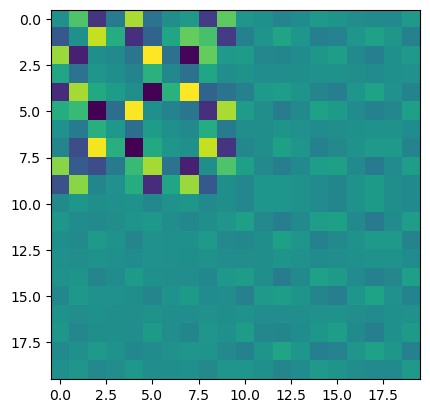

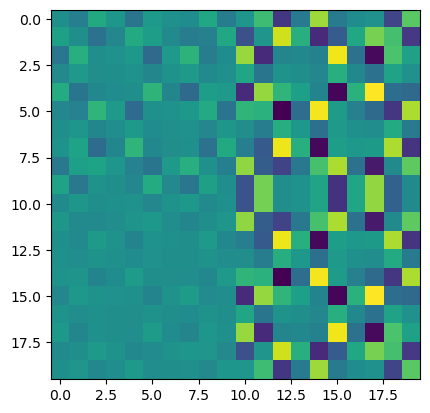

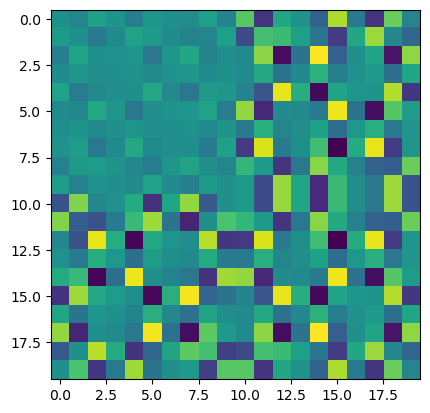

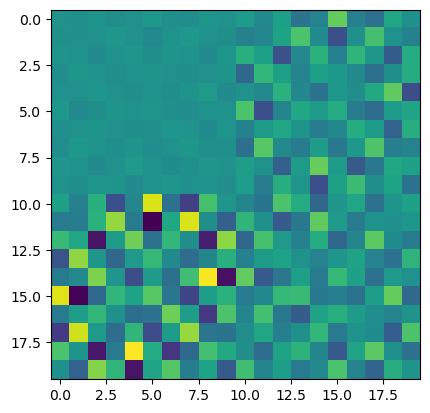

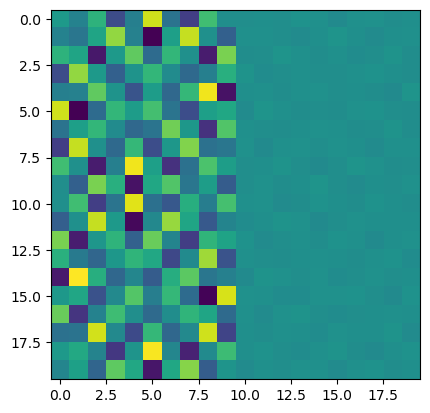

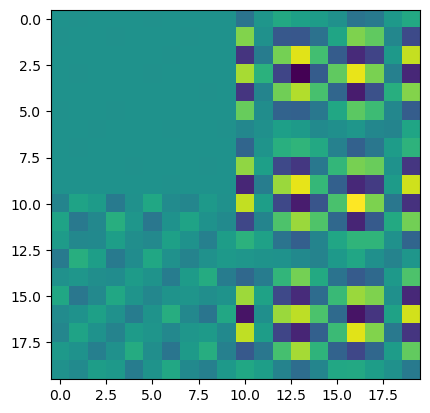

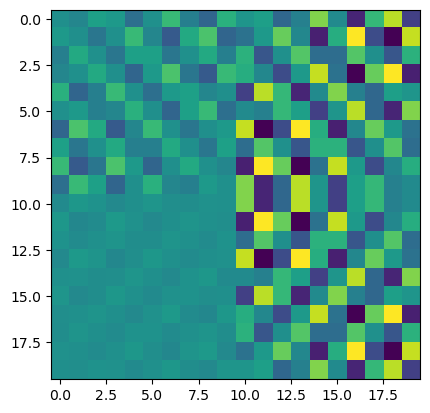

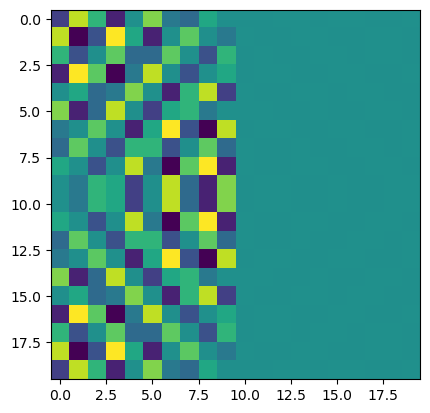

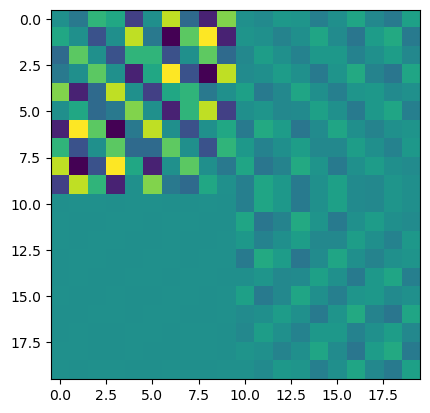

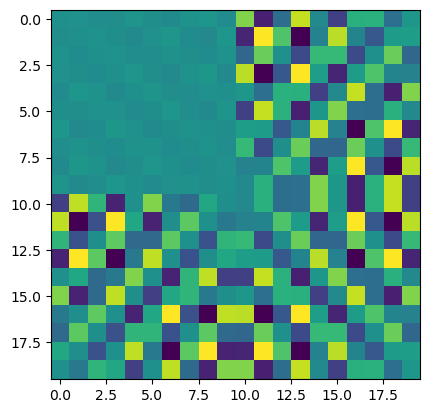

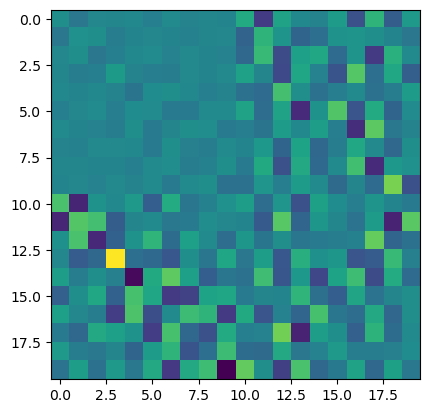

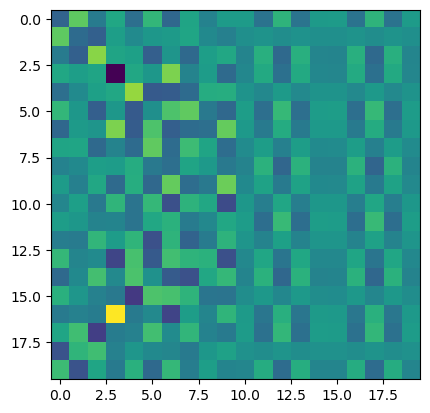

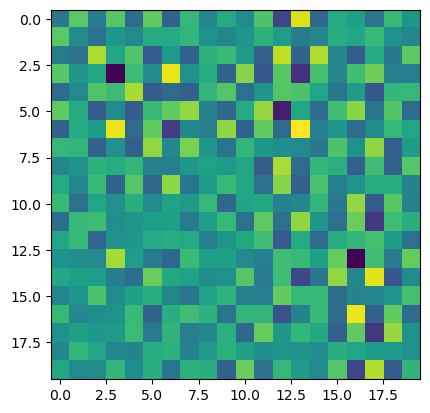

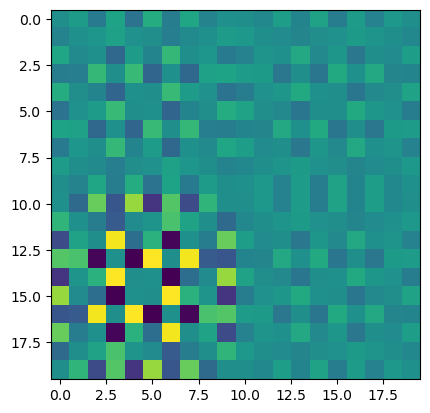

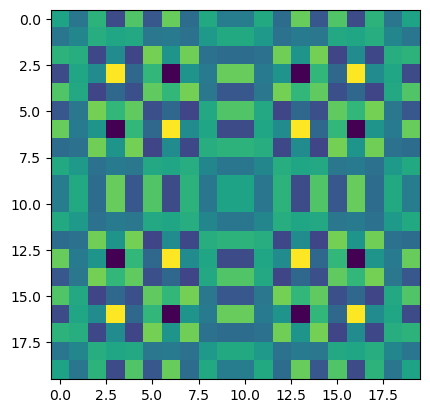

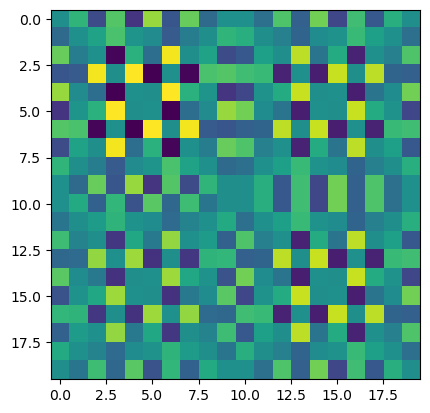

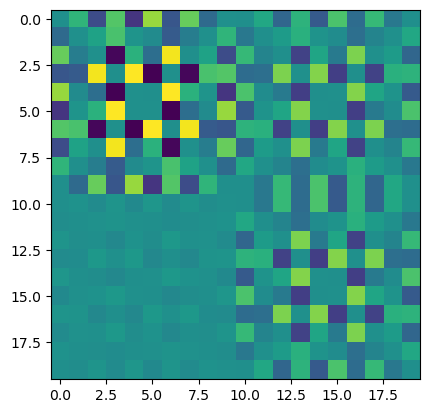

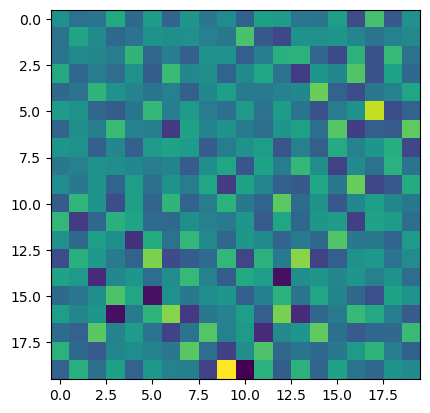

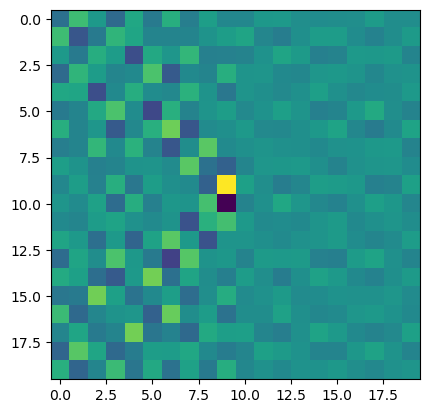

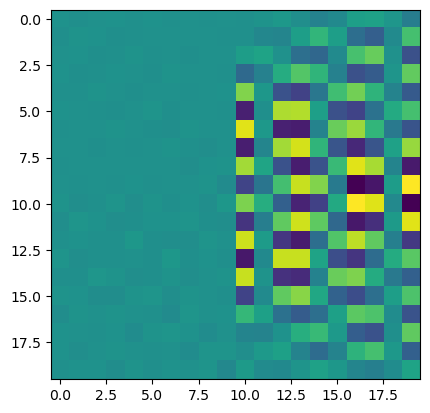

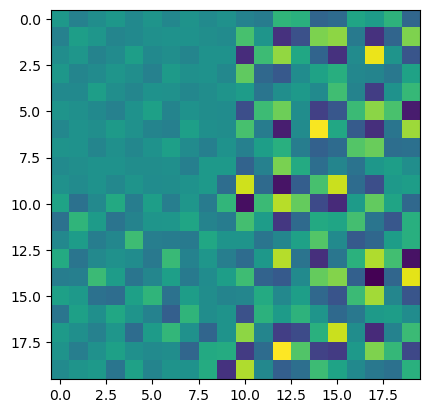

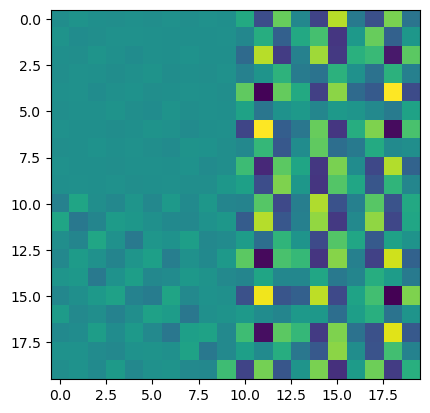

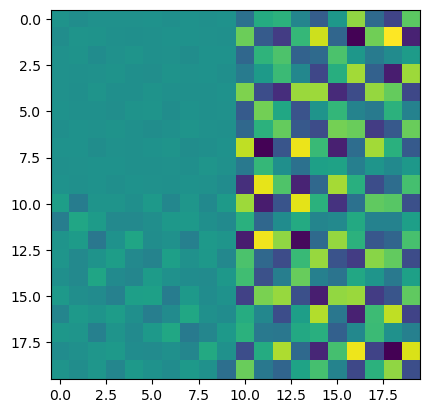

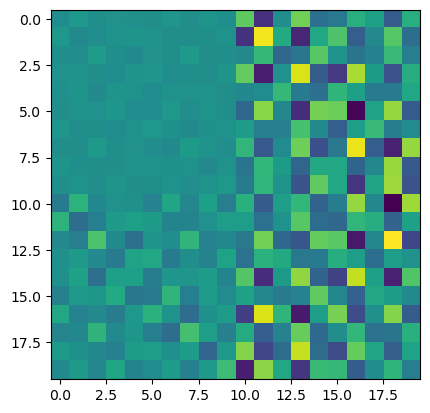

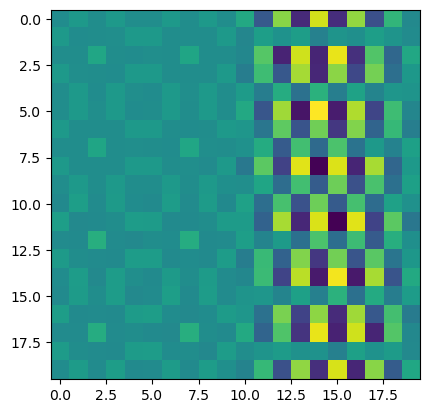

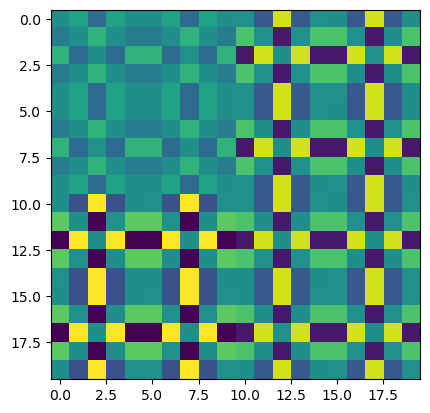

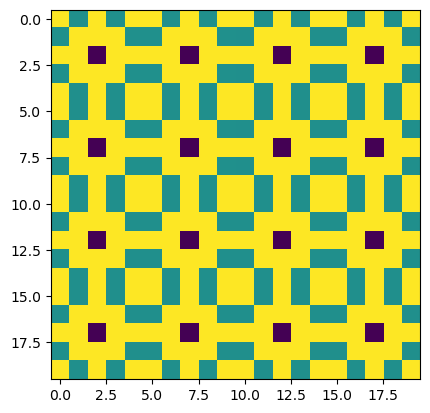

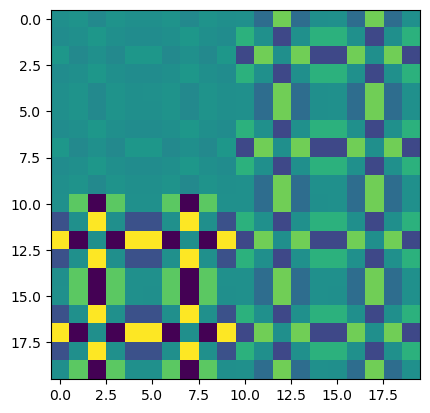

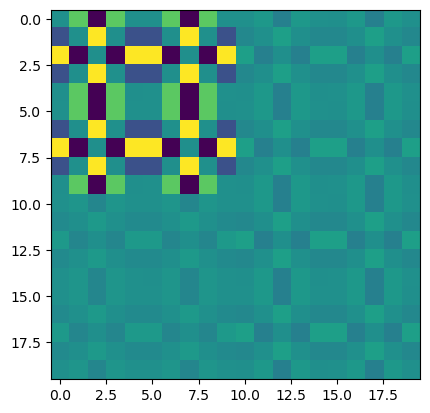

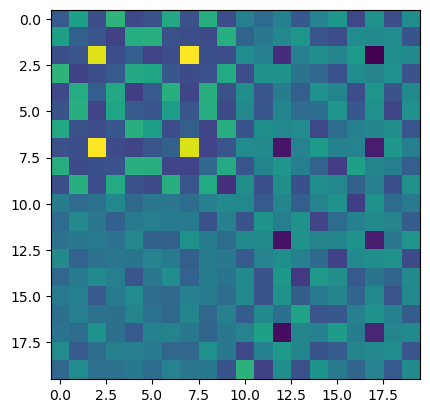

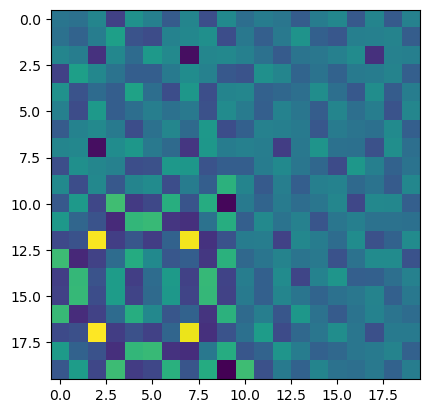

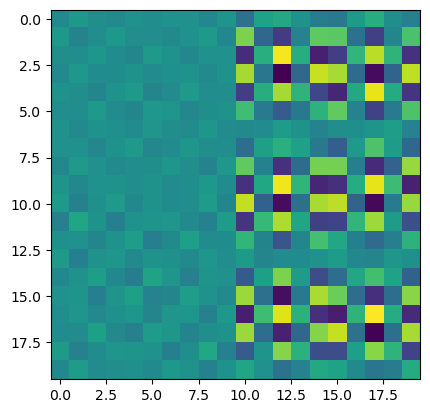

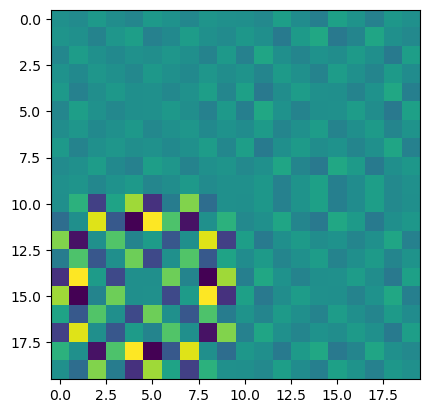

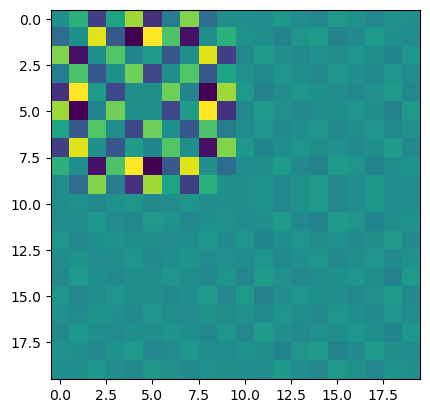

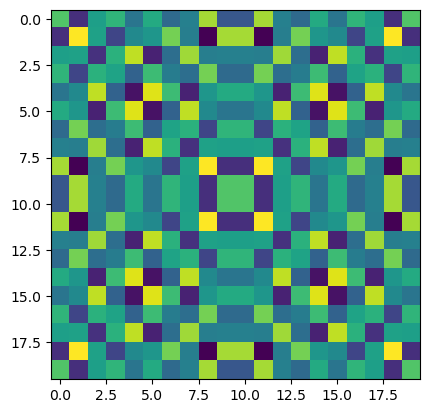

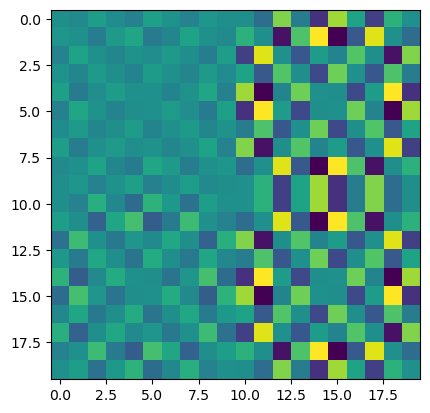

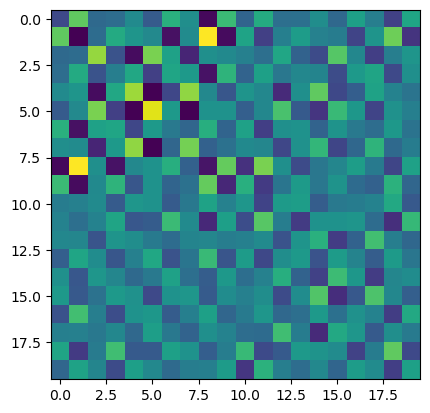

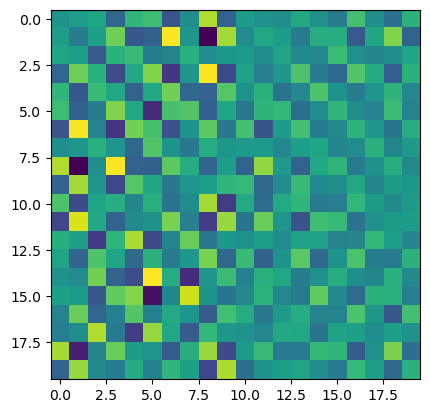

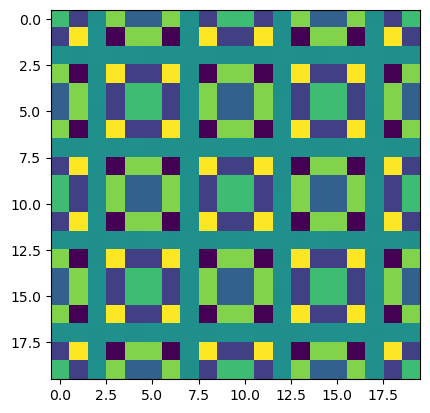

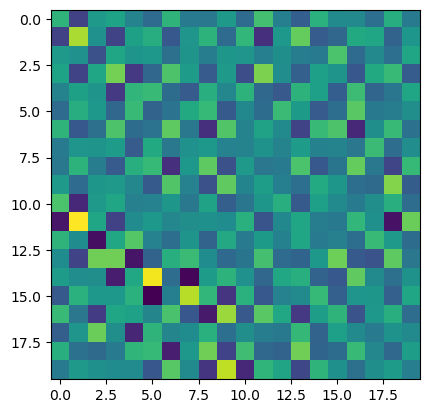

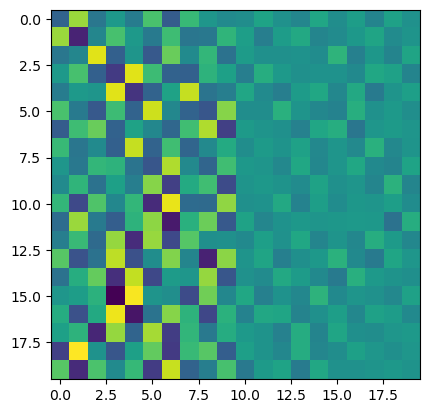

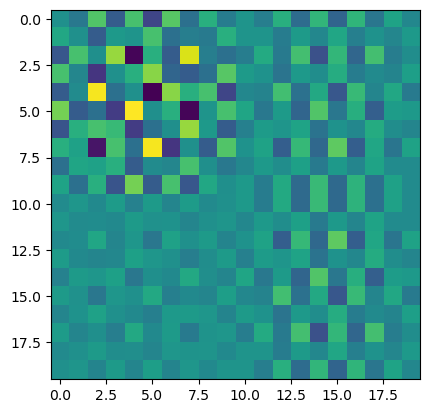

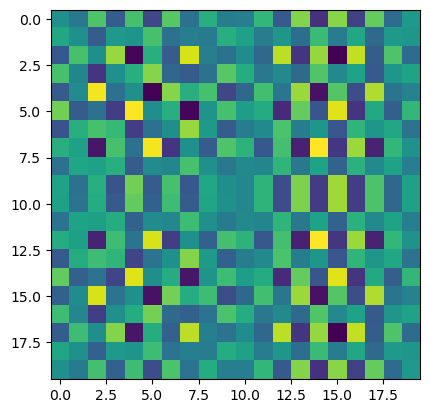

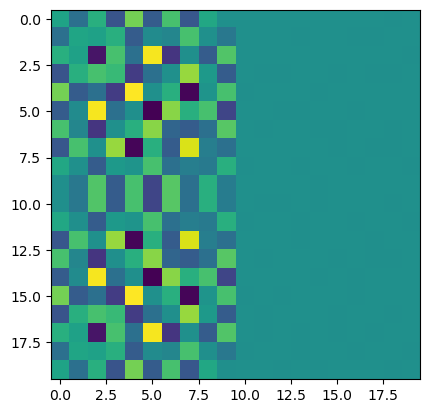

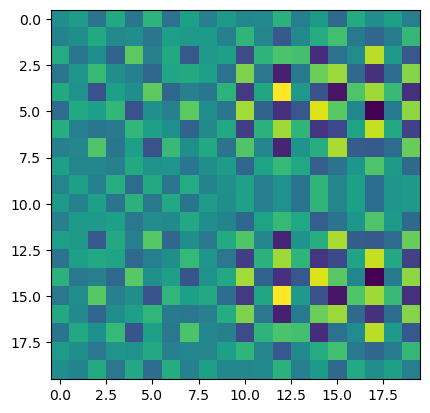

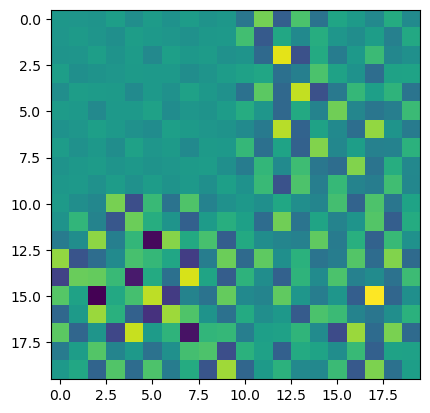

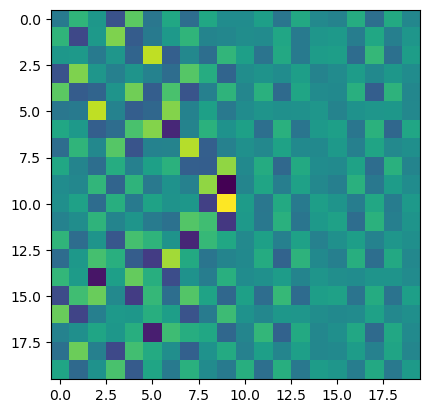

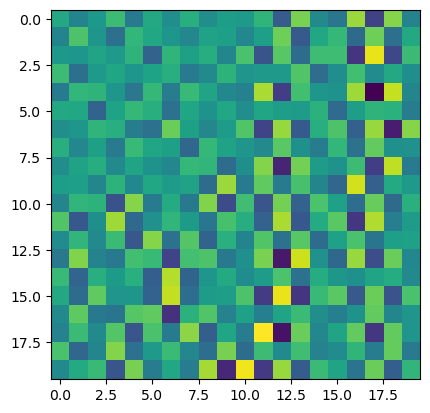

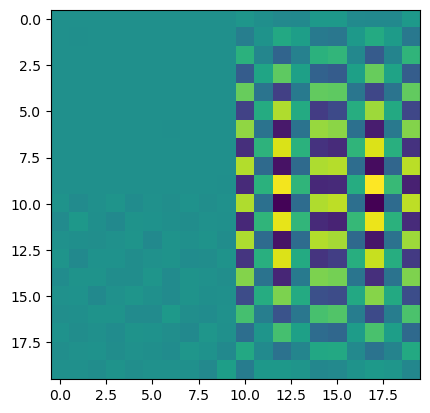

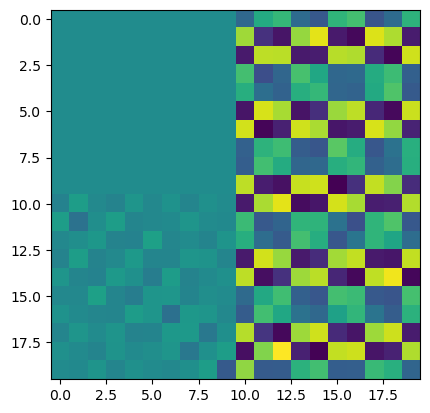

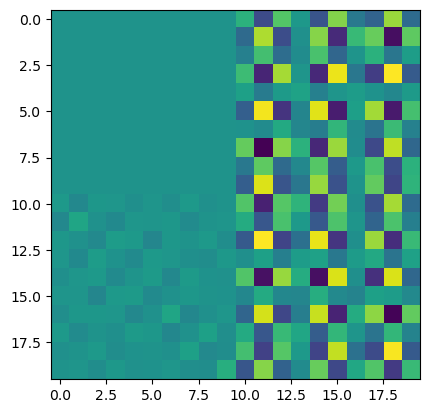

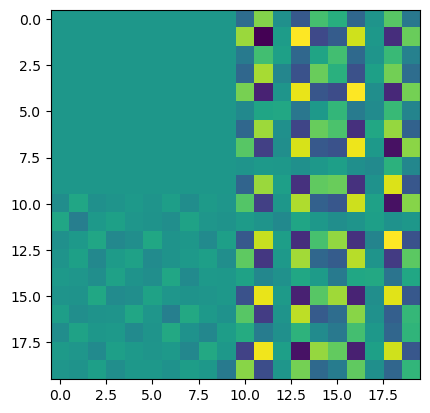

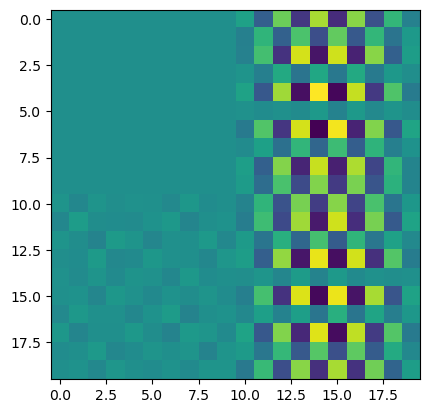

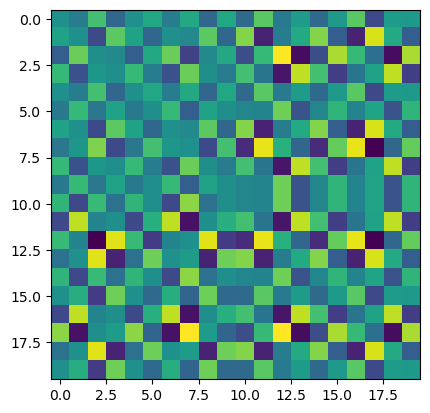

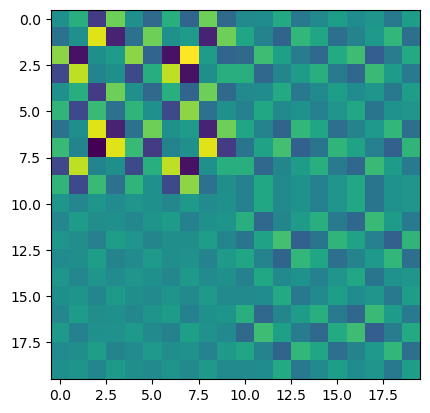

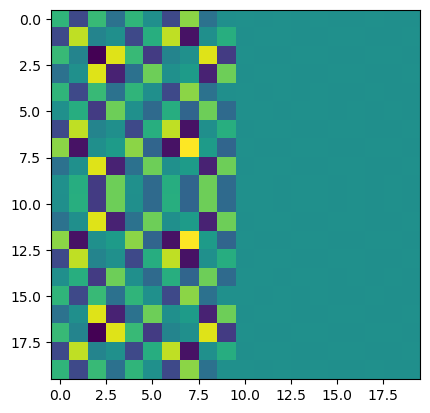

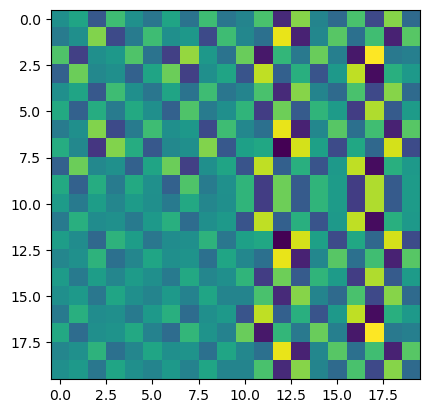

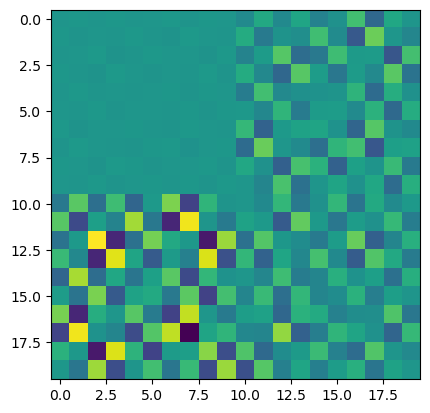

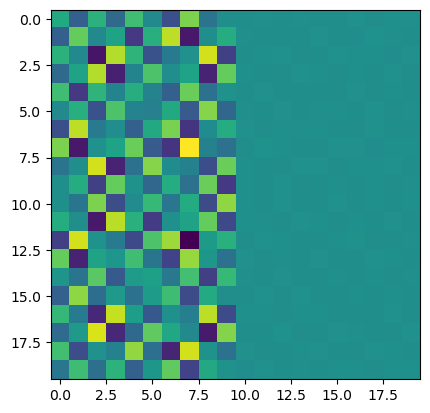

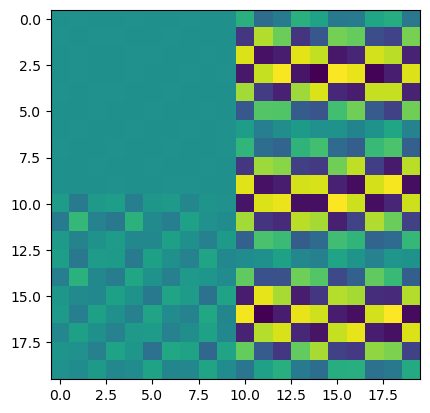

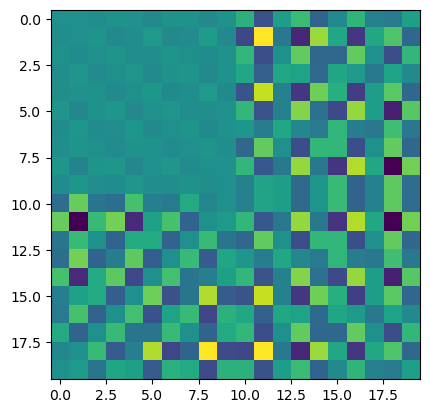

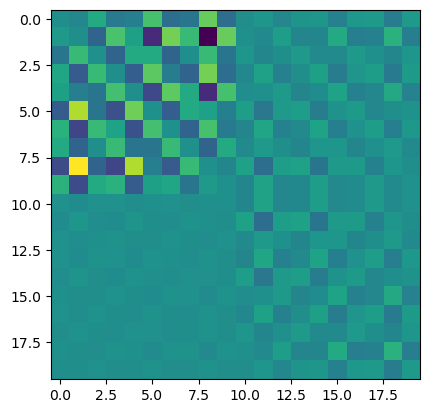

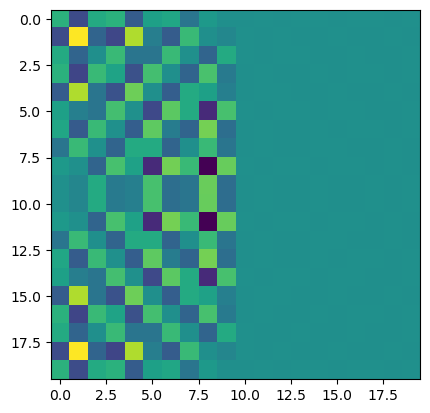

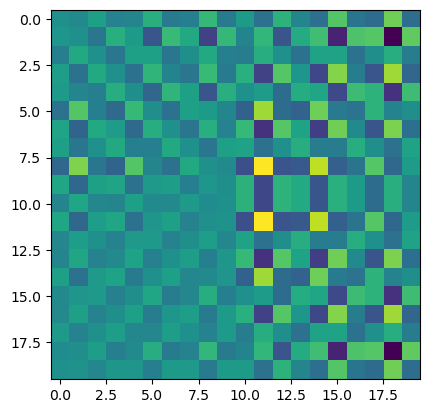

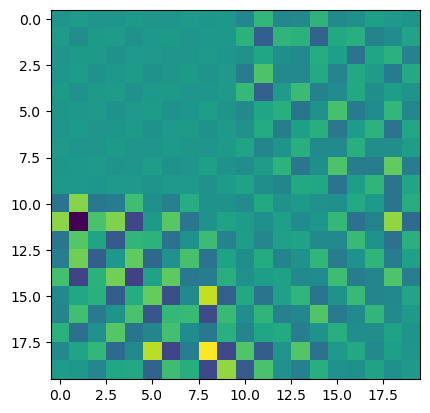

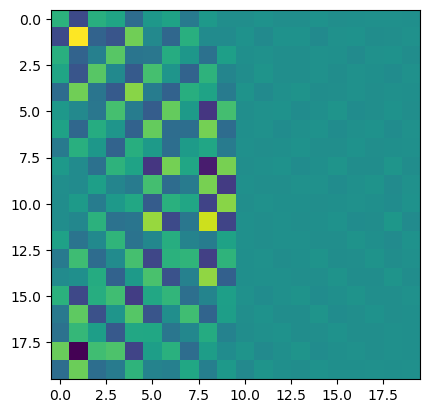

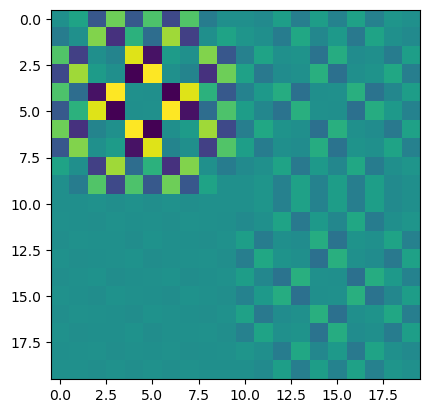

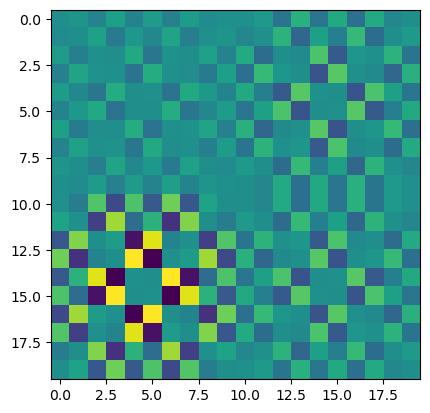

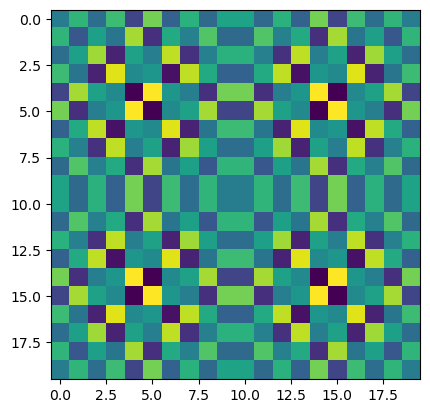

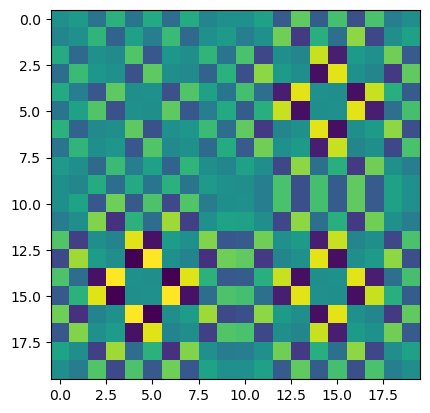

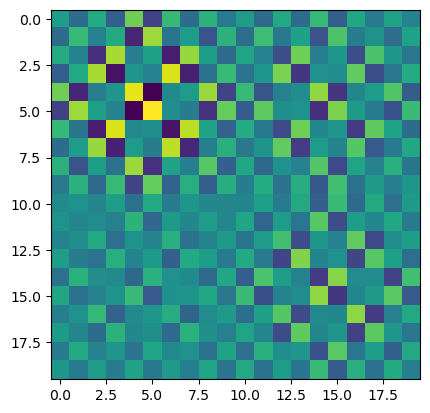

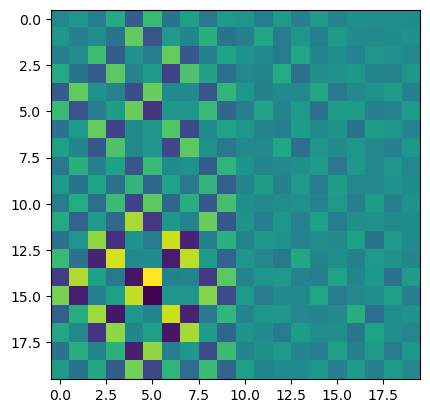

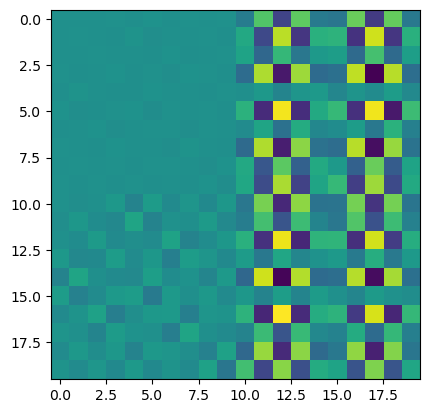

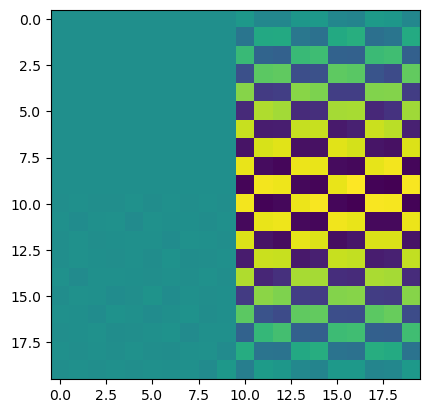

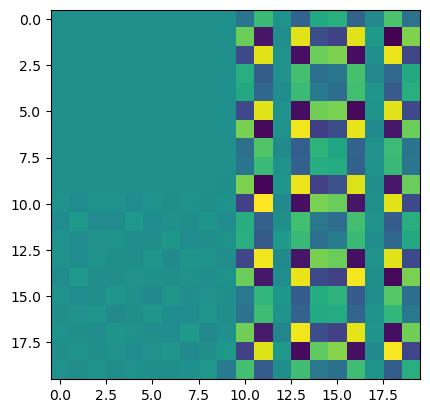

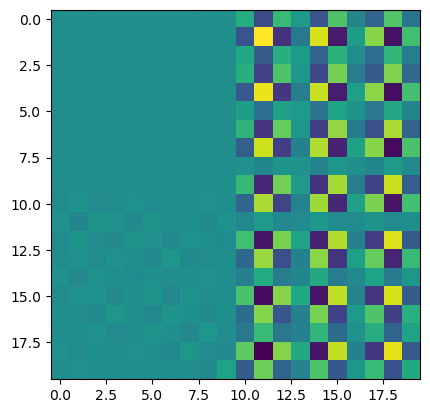

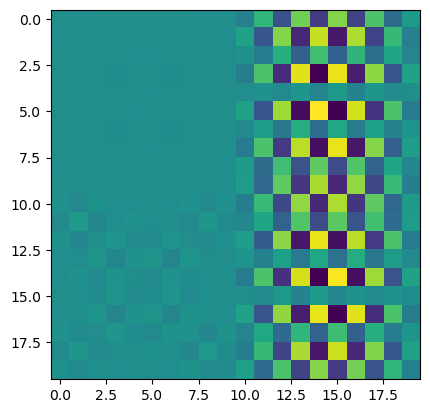

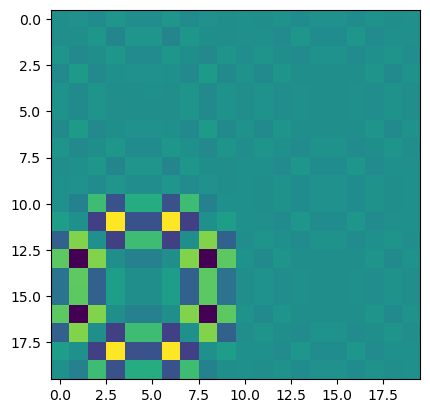

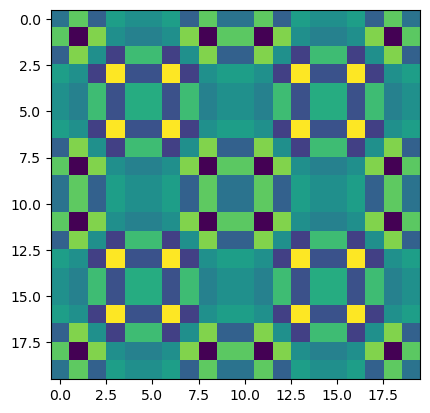

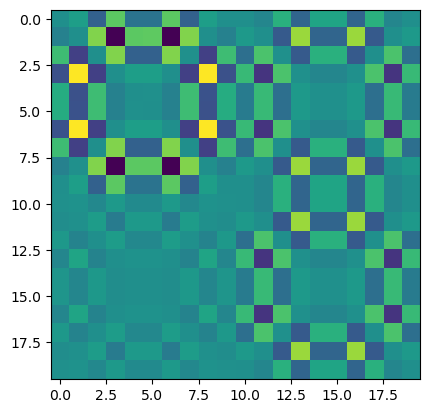

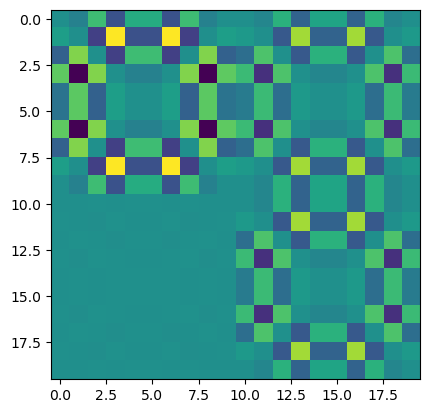

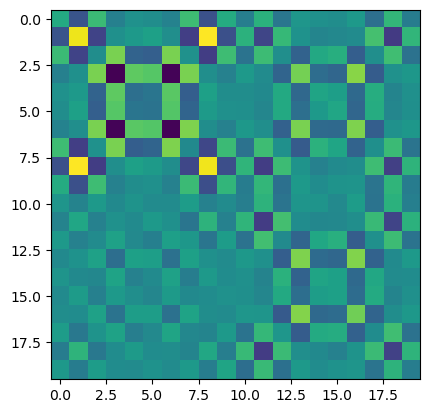

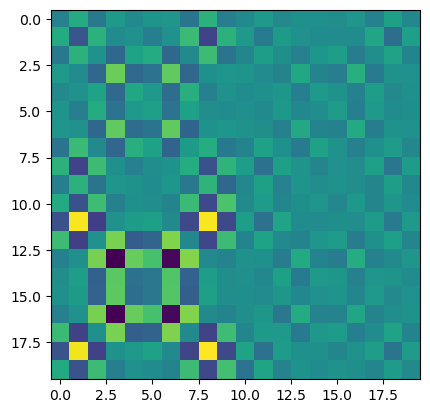

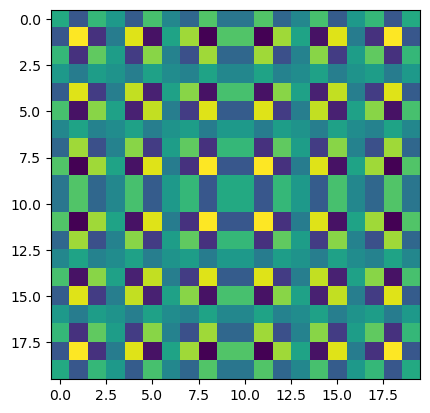

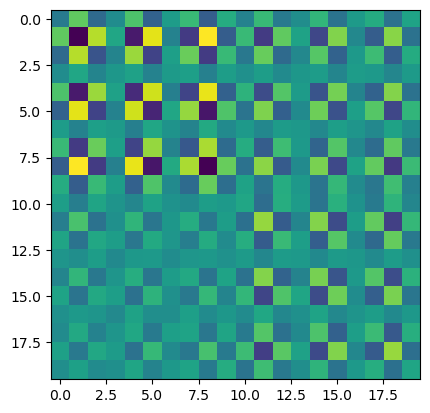

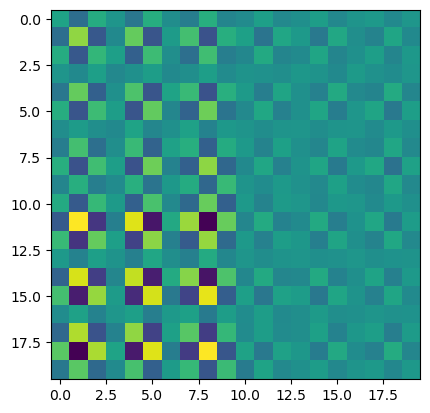

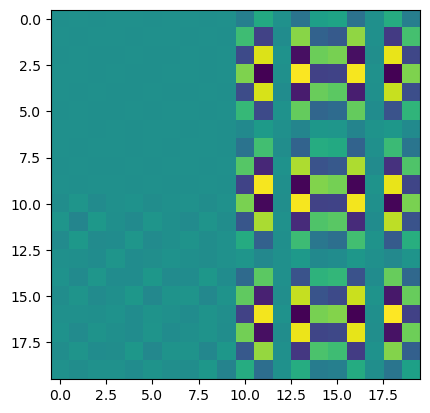

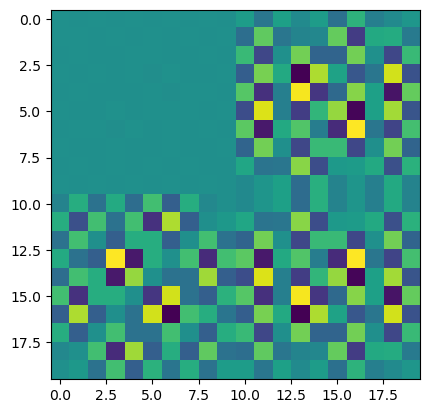

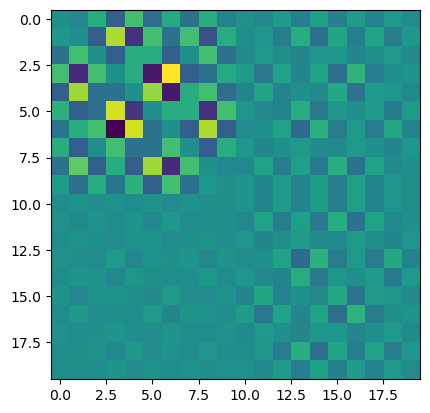

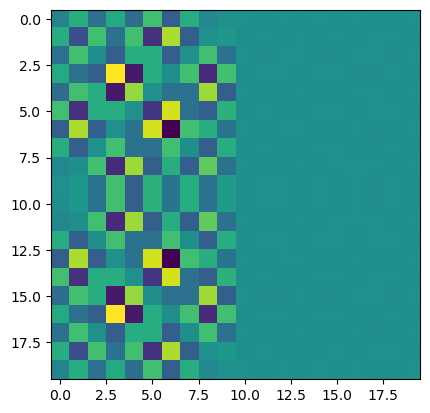

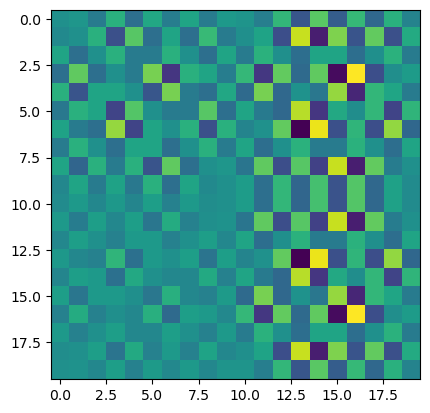

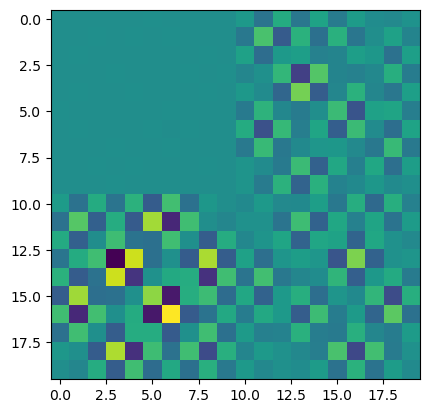

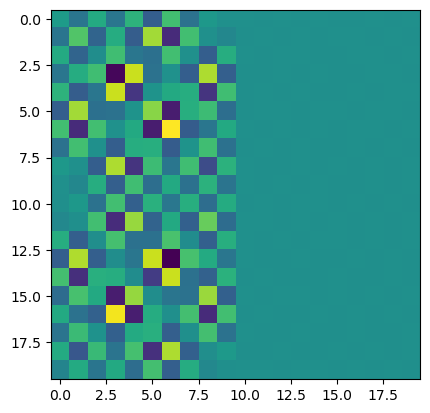

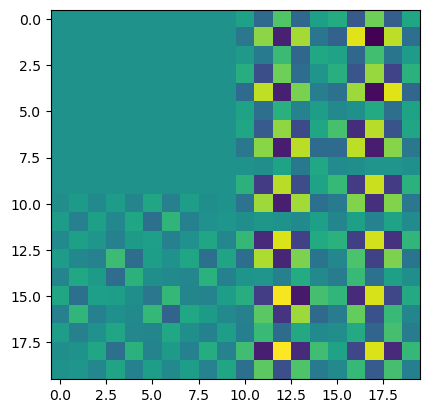

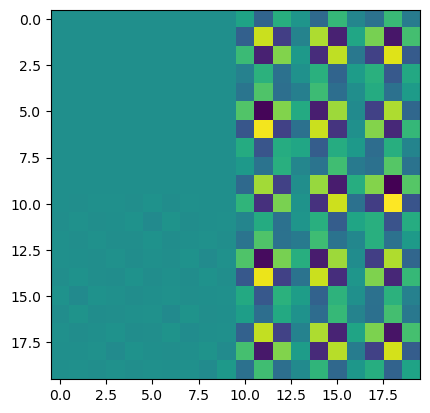

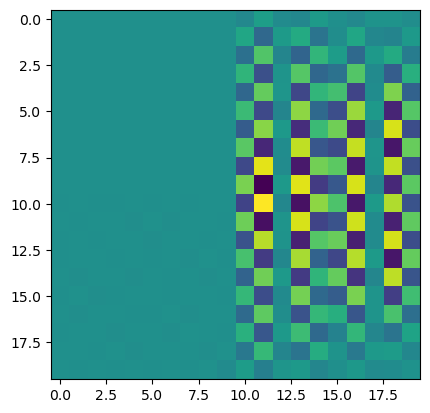

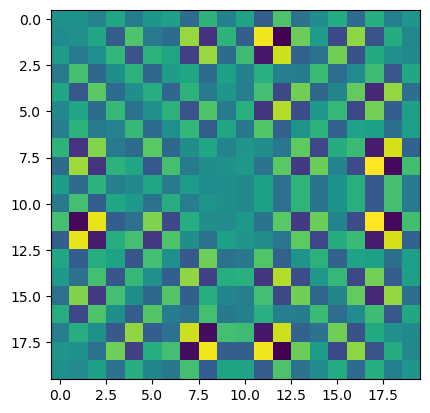

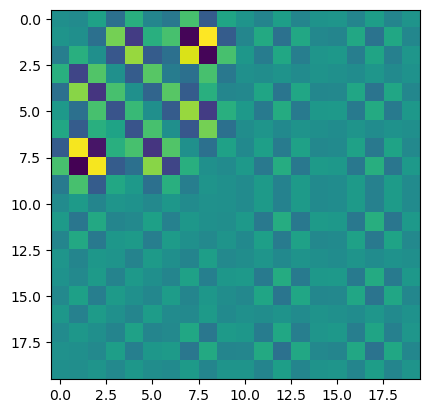

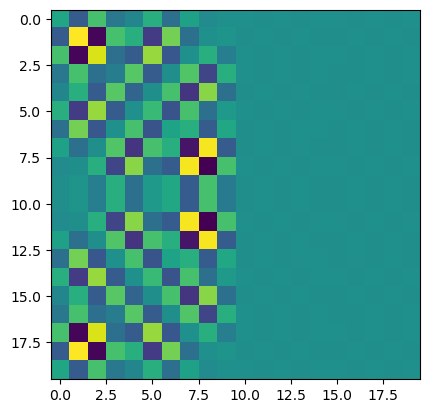

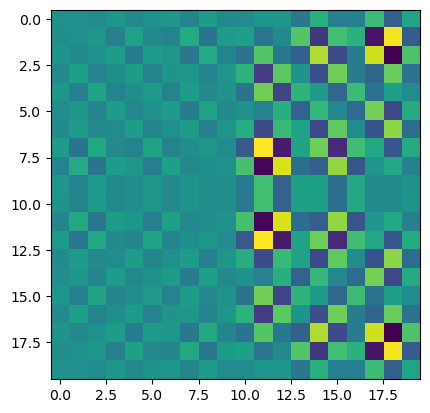

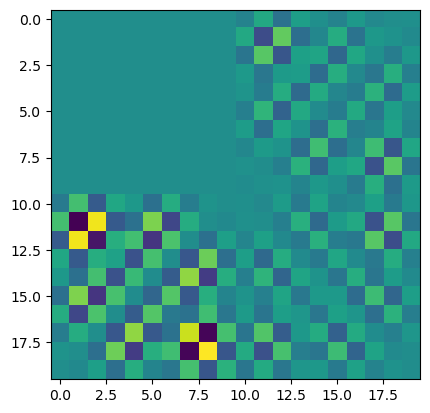

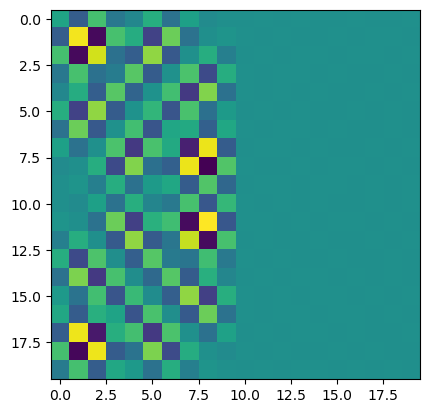

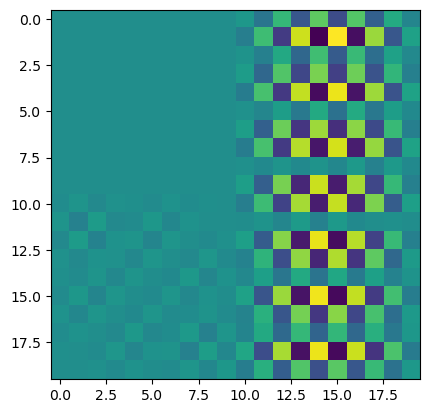

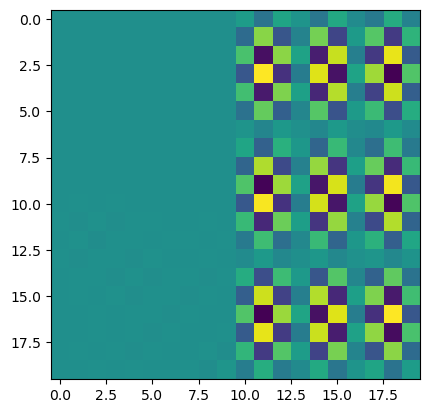

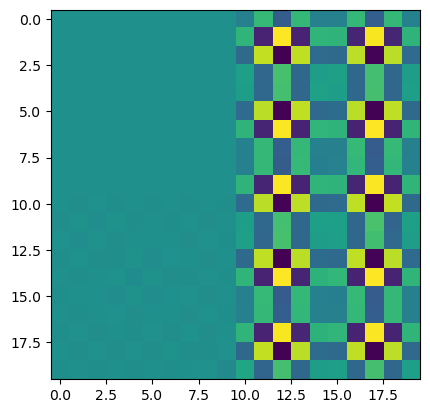

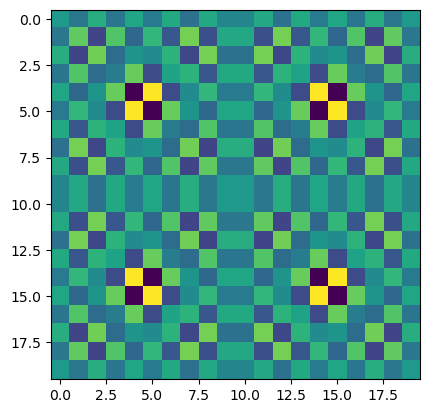

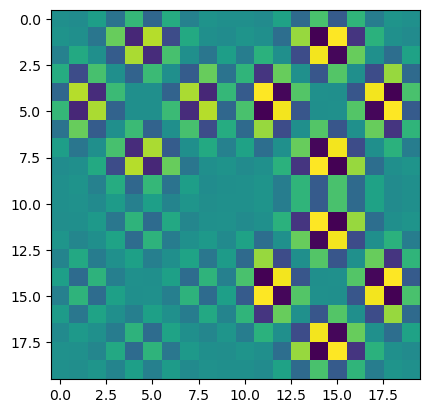

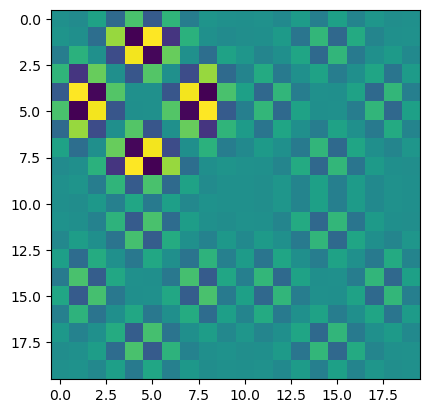

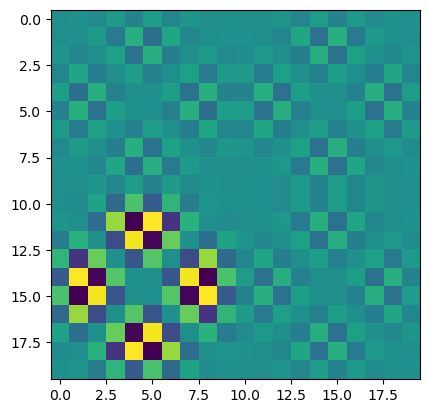

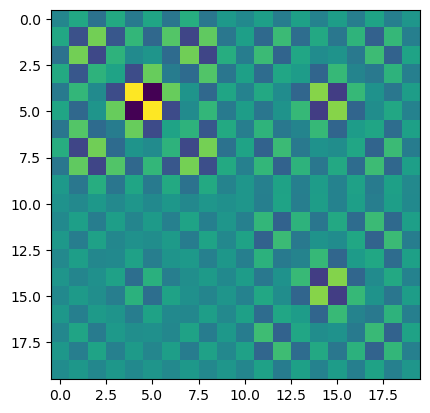

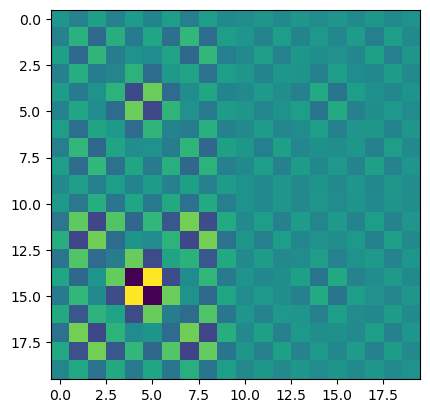

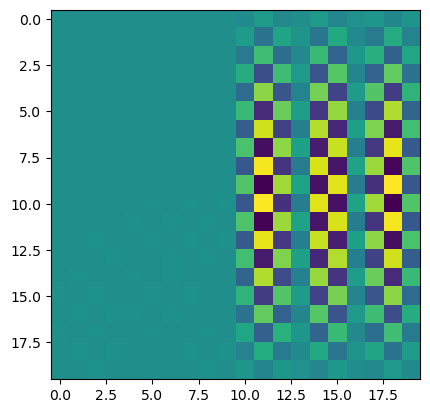

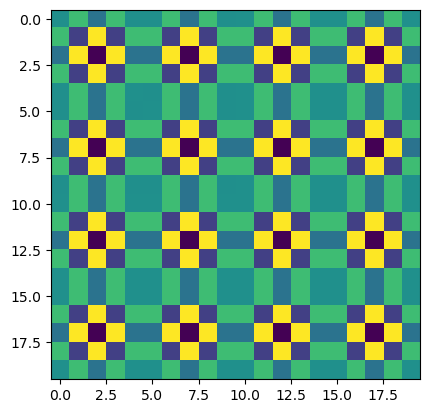

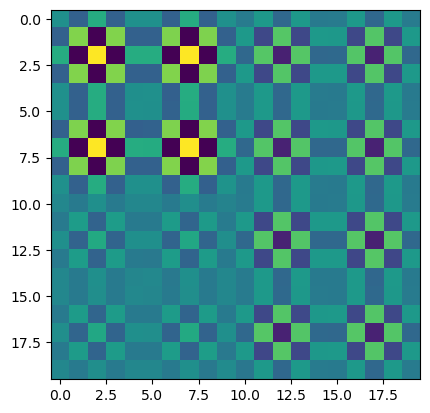

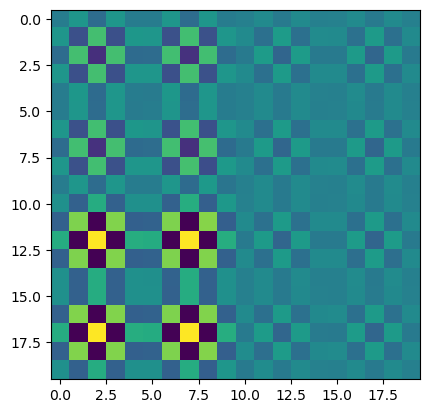

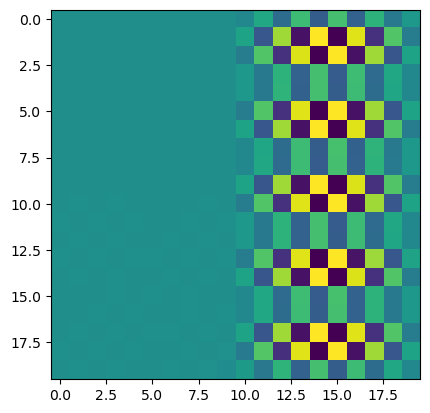

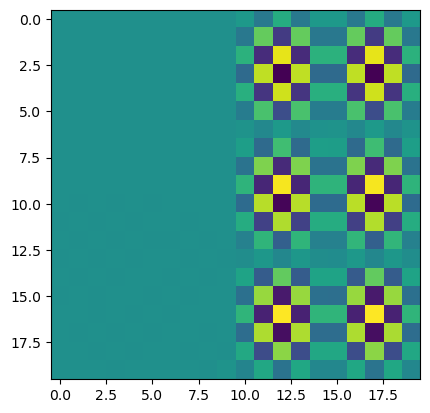

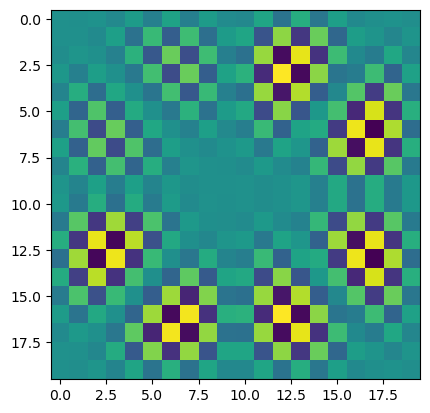

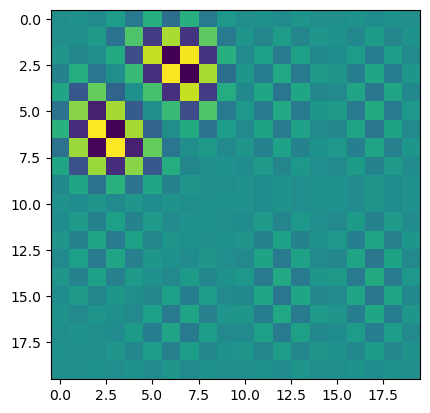

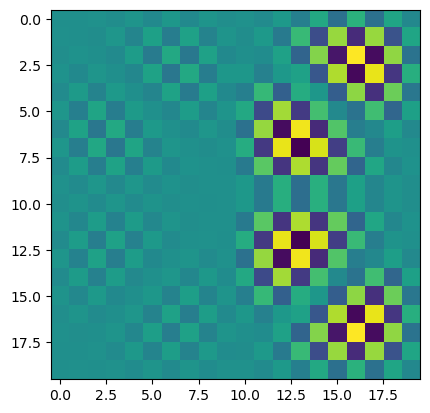

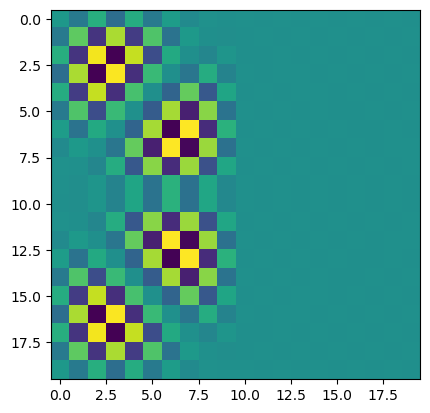

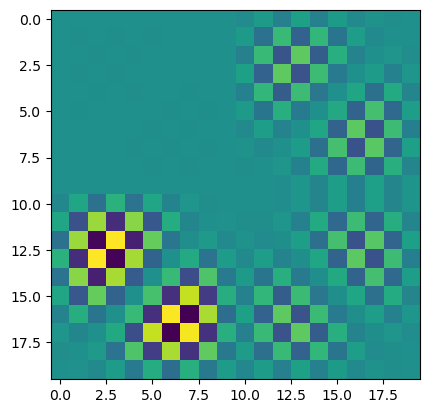

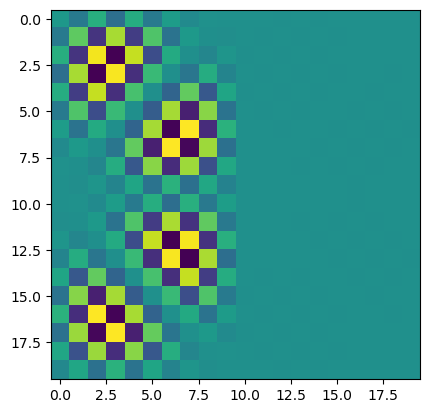

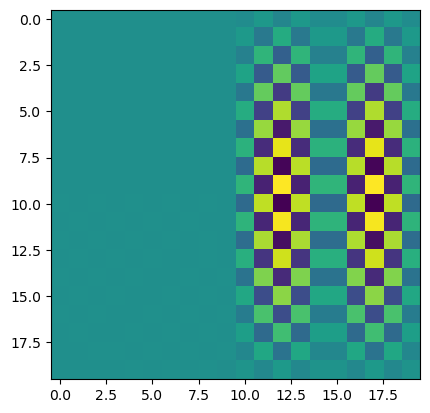

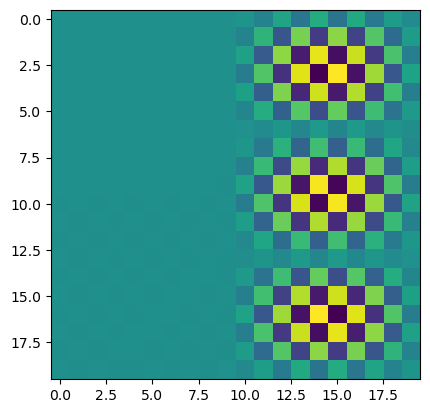

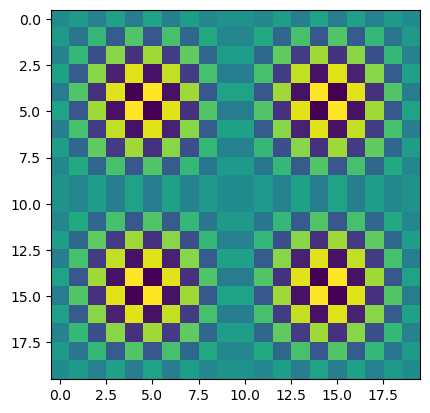

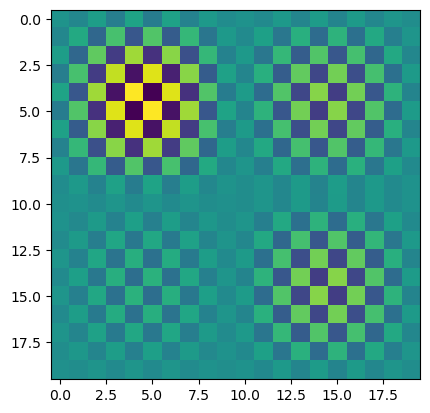

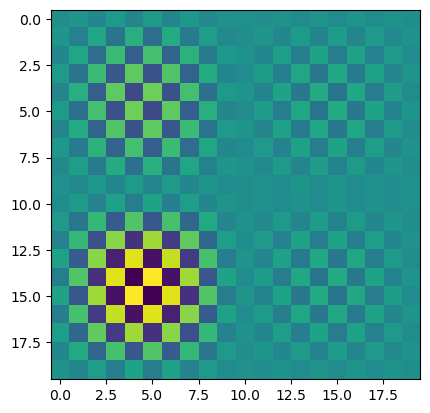

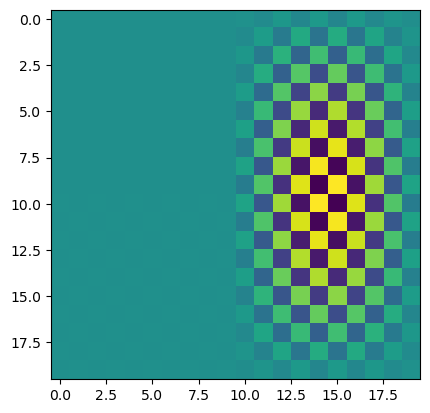

In [105]:
from time import sleep
for ii in range(400):
    plt.imshow(eigenvectors[:, ii].reshape(20,20))
    plt.show()
    sleep(0.1)

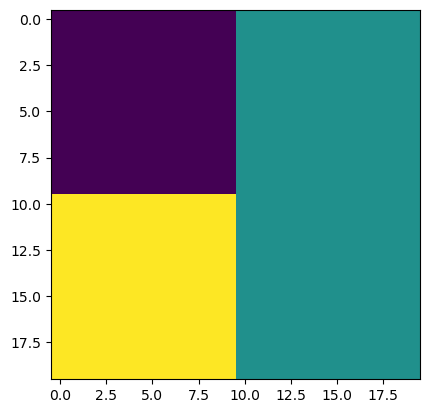

In [109]:
kmeans = KMeans(n_clusters=3,  n_init="auto"
               ).fit(eigenvectors[:, 1].reshape(-1, 1))

plt.imshow(kmeans.labels_.reshape(20, 20))

In [114]:
A = np.array(laplacian < 0, dtype='int')
A

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 1, 0]])

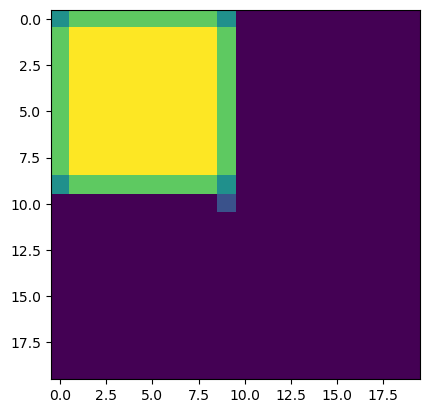

In [125]:
plt.imshow(np.reshape(A @ (kmeans.labels_ == 0), (20,20)))

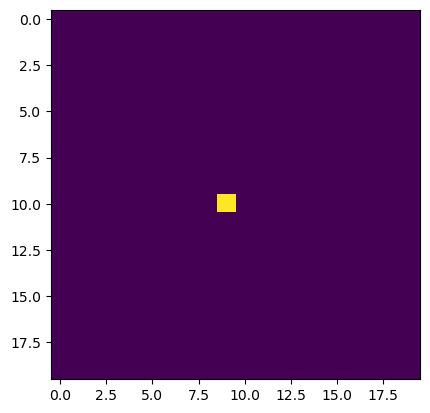

In [126]:
plt.imshow(np.reshape(A @ (kmeans.labels_ == 0) & (kmeans.labels_ != 0), (20,20)))